In [4]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as mlp
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy.stats
import pylab
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA 
import itertools
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 300)

In [5]:
df3  =  pd.read_excel("./Downloads/import share of consumption.xlsx")
df3
#Clean
df3  =  df3.rename(columns = {"Year": "Industry"})
df3.dropna()

Industry  2008  2009  2010  2011  2012  2013   
0                Manufactured products  19.3  16.7  18.5  21.4  23.7  22.9  \
2   Grain and oilseed milling products  31.8  24.4  31.2  37.4  43.3  48.9   
3                Sugar and confections  31.6  30.3  33.7  38.3  37.3  36.2   
4       Preserved fruit and vegetables  24.3  20.9  22.3  25.9  25.4  25.0   
5                       Dairy products   9.6   7.0   6.7   7.7   9.1   9.8   
6                        Meat products  14.4  12.1  13.8  16.4  18.8  18.4   
7                      Bakery products   8.2   7.8   8.5   9.4  10.4  10.4   
8                          Other foods  12.7  11.9  13.6  16.9  22.2  19.1   
9                            Beverages  27.3  24.7  25.8  27.3  30.6  27.9   
12           Non-manufactured products  10.9   9.9  10.8  10.5   9.6  10.6   
14                               Crops  15.7  13.9  15.8  16.1  13.7  15.7   
15                         Food grains  28.3  14.6  18.4  28.9  14.6  29.0   
16                         Feed grains   2.0   1.3   1.1   1.1   1.6   2.4   
17                            Oilseeds   7.2   3.1   3.4   4.7   4.2   5.3   
18               Vegetables and melons  26.1  24.6  29.2  30.9  31.3  31.8   
19                Fruits and tree nuts  35.8  36.4  37.1  37.2  34.6  36.2   
20                          Sweeteners  38.4  39.1  45.0  49.4  44.1  38.9   
21                           Livestock   3.8   3.1   3.1   2.5   2.7   2.6   
24            Total food and beverages  12.5  11.5  12.3  13.2  13.6  13.6   
26                        Animal foods   6.4   5.9   5.8   5.8   6.4   6.2   
27                         Plant foods  18.8  16.3  18.6  20.5  18.9  20.2   

    2014  2015  2016  2017  2018  2019  2020  2021  
0   23.5  23.0  22.1  23.8  24.5  24.3  24.8  26.3  
2   51.2  47.2  45.2  58.1  57.0  49.9  58.0  58.4  
3   37.7  35.9  36.1  36.6  36.7  36.2  38.4  37.7  
4   26.1  25.8  26.5  27.4  28.2  28.2  28.1  31.3  
5   10.7   9.9   9.0   8.4   8.3   8.4   8.1  10.0  
6   22.5  21.8  18.0  18.7  18.6  19.1  18.3  18.7  
7   10.6  10.7  11.4  12.6  13.7  13.8  14.3  15.4  
8   17.4  17.3  16.0  16.1  20.2  20.3  20.9  23.1  
9   28.1  28.1  28.1  33.5  32.1  32.5  34.1  34.4  
12  11.3  12.4  13.6  14.0  14.4  14.9  16.0  14.3  
14  18.2  20.3  21.0  22.2  22.7  23.5  24.6  22.1  
15  22.4  24.1  22.1  29.3  25.9  30.8  32.1  18.1  
16   1.7   1.9   1.7   1.7   1.4   1.3   1.4   1.2  
17   9.8   6.4   4.2   4.7   4.0   4.5   4.8   4.2  
18  32.8  31.6  35.8  34.4  38.1  40.1  41.0  45.0  
19  36.7  44.4  44.0  46.5  49.6  51.3  51.5  52.2  
20  45.7  46.9  44.8  47.1  45.0  45.3  48.2  43.1  
21   3.0   3.0   3.0   2.9   2.8   3.1   3.2   3.0  
24  13.9  14.8  15.2  15.9  16.6  16.8  17.4  17.4  
26   6.8   7.3   7.1   7.0   7.2   7.4   7.8   8.1  
27  22.2  23.1  23.5  25.3  25.9  25.8  27.1  26.7

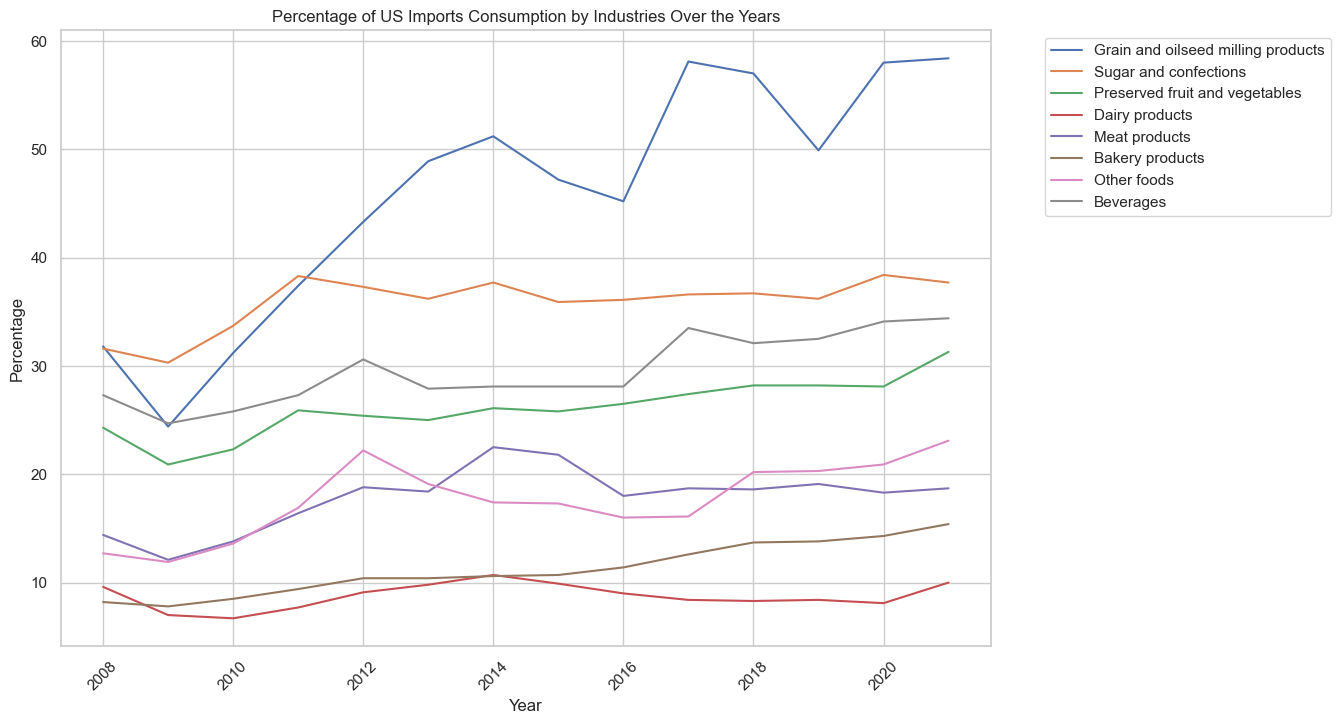

In [6]:
#Select the specified rows from df3
subset_df  =  df3[df3['Industry'].isin(['Grain and oilseed milling products', 'Sugar and confections', 'Preserved fruit and vegetables', 'Dairy products', 'Meat products', 'Bakery products', 'Other foods', 'Beverages'])]

# Create new DataFrame
melted_df  =  subset_df.melt(id_vars = 'Industry', var_name = 'Year', value_name = 'Percentage')

# Plot the data using seaborn
sns.set(style = "whitegrid")
plt.figure(figsize = (12, 8))
sns.lineplot(data = melted_df, x = 'Year', y = 'Percentage', hue = 'Industry')
plt.title('Percentage of US Imports Consumption by Industries Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

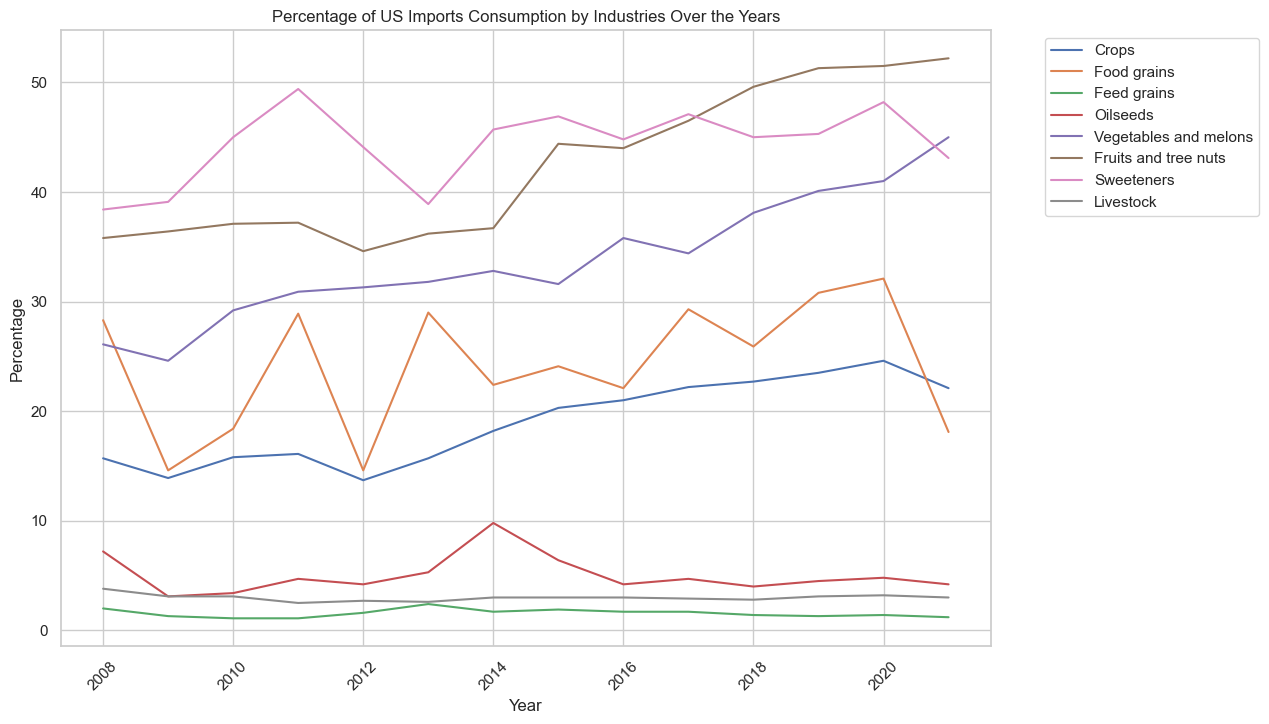

In [7]:
# Select the specified rows from df3
subset_df  =  df3[df3['Industry'].isin(['Crops','Food grains','Feed grains','Oilseeds','Vegetables and melons','Fruits and tree nuts','Sweeteners', 'Livestock'])]
#Create new dataframe
melted_df  =  subset_df.melt(id_vars = 'Industry', var_name = 'Year', value_name = 'Percentage')

# Plot the data using seaborn
sns.set(style = "whitegrid")
plt.figure(figsize = (12, 8))
sns.lineplot(data = melted_df, x = 'Year', y = 'Percentage', hue = 'Industry')
plt.title('Percentage of US Imports Consumption by Industries Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()


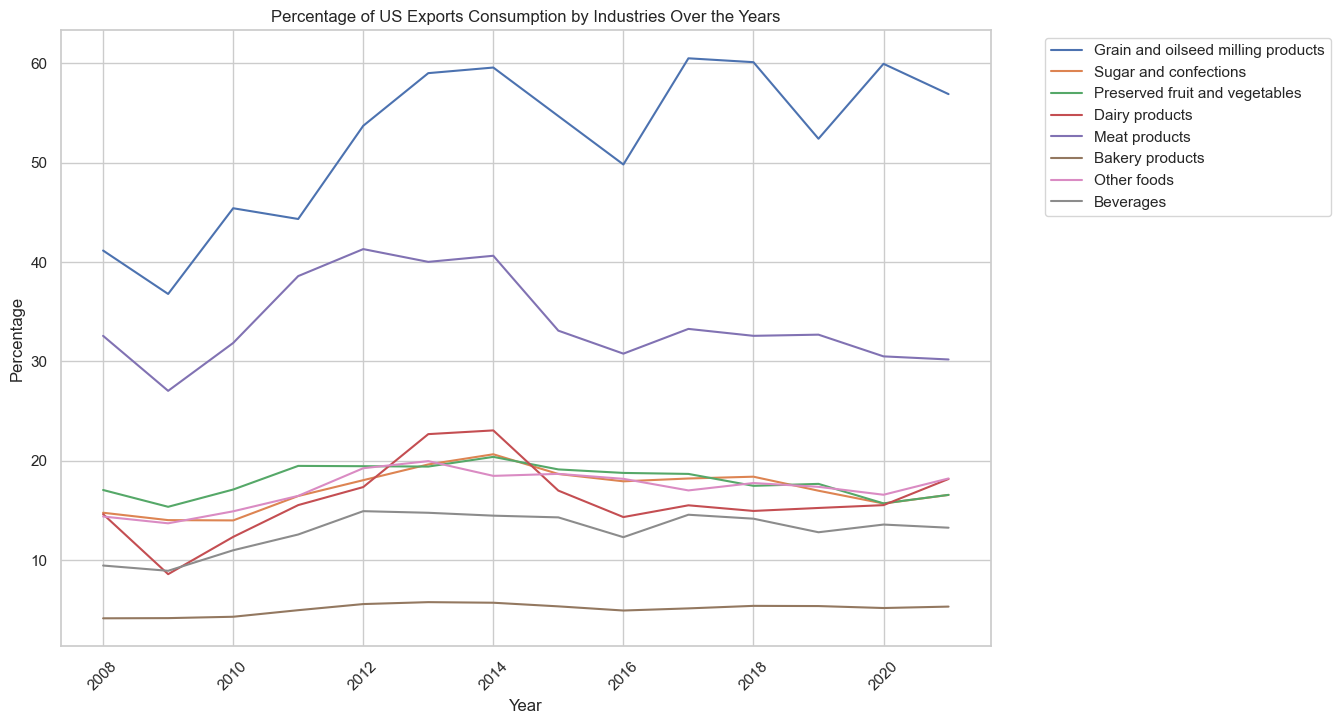

In [8]:
df4  =  pd.read_excel("./Downloads/export share of production.xlsx")
df4.dropna()
df4  =  df4.rename(columns = {"Year": "Industry"})
# Select the specified rows from df3
subset_df  =  df4[df4['Industry'].isin(['Grain and oilseed milling products', 'Sugar and confections', 'Preserved fruit and vegetables', 'Dairy products', 'Meat products', 'Bakery products', 'Other foods', 'Beverages'])]

# Melt the DataFrame
melted_df  =  subset_df.melt(id_vars = 'Industry', var_name = 'Year', value_name = 'Percentage')

# Plot the data using seaborn
sns.set(style = "whitegrid")
plt.figure(figsize = (12, 8))
sns.lineplot(data = melted_df, x = 'Year', y = 'Percentage', hue = 'Industry')
plt.title('Percentage of US Exports Consumption by Industries Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()


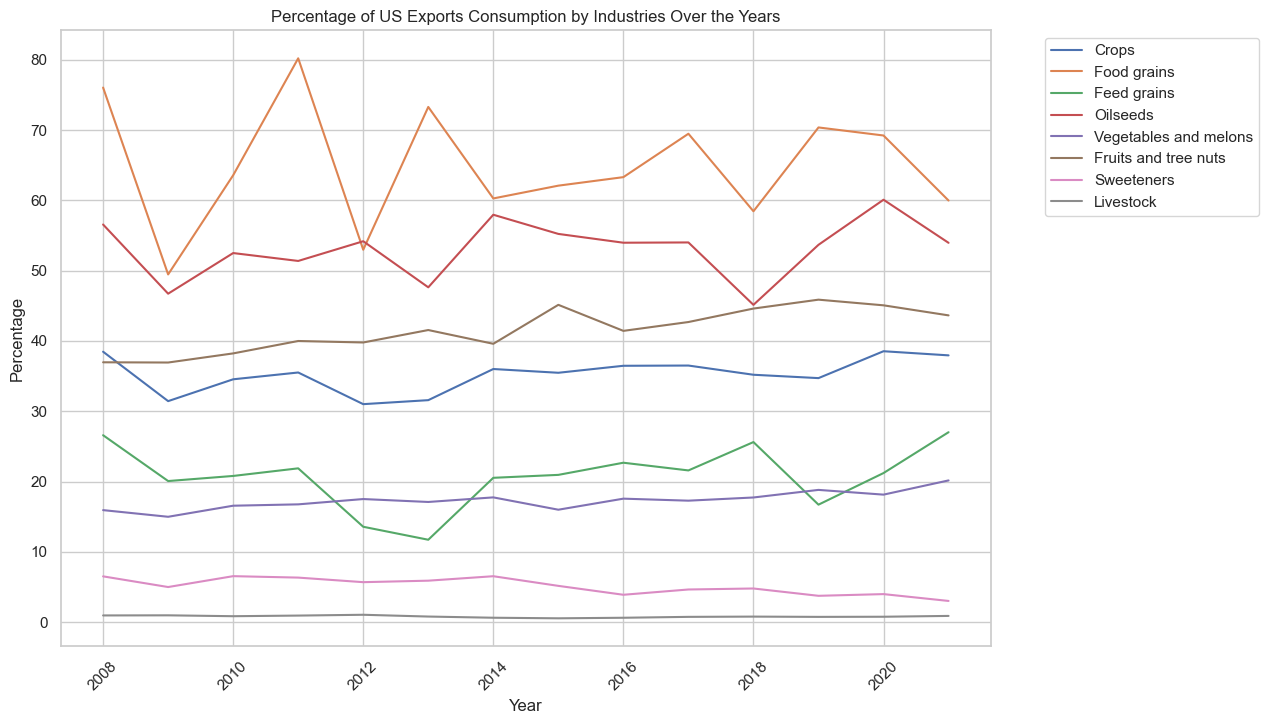

In [9]:
# Select the specified rows from df3
subset_df  =  df4[df4['Industry'].isin(['Crops','Food grains','Feed grains','Oilseeds','Vegetables and melons','Fruits and tree nuts','Sweeteners', 'Livestock'])]

# Melt the DataFrame
melted_df  =  subset_df.melt(id_vars = 'Industry', var_name = 'Year', value_name = 'Percentage')

# Plot the data using seaborn
sns.set(style = "whitegrid")
plt.figure(figsize = (12, 8))
sns.lineplot(data = melted_df, x = 'Year', y = 'Percentage', hue = 'Industry')
plt.title('Percentage of US Exports Consumption by Industries Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()


In [10]:
df5  =  pd.read_excel("./Downloads/exports_bls_ffb.xlsx")
df5

Import/Export Price Indexes   
0          Original Data Value  \
1                          NaN   
2                   Series Id:   
3                Series Title:   
4                  Index Type:   
5                        Item:   
6                 Base Period:   
7                       Years:   
8                          NaN   
9                         Year   
10                        1990   
11                        1991   
12                        1992   
13                        1993   
14                        1994   
15                        1995   
16                        1996   
17                        1997   
18                        1998   
19                        1999   
20                        2000   
21                        2001   
22                        2002   
23                        2003   
24                        2004   
25                        2005   
26                        2006   
27                        2007   
28                        2008   
29                        2009   
30                        2010   
31                        2011   
32                        2012   
33                        2013   
34                        2014   
35                        2015   
36                        2016   
37                        2017   
38                        2018   
39                        2019   
40                        2020   
41                        2021   
42                        2022   
43                        2023   

                                           Unnamed: 1 Unnamed: 2 Unnamed: 3   
0                                                 NaN        NaN        NaN  \
1                                                 NaN        NaN        NaN   
2                                              EIUIQ0        NaN        NaN   
3   Monthly export price index for BEA End Use 0, ...        NaN        NaN   
4                          BEA End Use Export Indexes        NaN        NaN   
5                           Foods, feeds, & beverages        NaN        NaN   
6                                            2000=100        NaN        NaN   
7                                        1990 to 2023        NaN        NaN   
8                                                 NaN        NaN        NaN   
9                                                 Jan        Feb        Mar   
10                                              105.6      102.2      103.1   
11                                               98.8       99.4      100.2   
12                                              100.9      104.8      105.4   
13                                              100.4       99.7       99.6   
14                                                112      108.8      109.8   
15                                              105.2      105.9      107.4   
16                                              129.7      129.8      131.8   
17                                              118.5      120.7      122.7   
18                                              112.2        110      109.3   
19                                                106      103.5      101.1   
20                                               99.9      100.9      100.8   
21                                              102.1      100.2        101   
22                                                102       98.9       99.7   
23                                              108.7      108.3      108.2   
24                                              123.1      125.6      130.5   
25                                              117.1      116.4      120.9   
26                                              122.8      121.9      121.7   
27                                                139      143.5      146.9   
28                                              180.5      188.7      196.9   
29                                              165.4      162.1      156.7   
30                     

In [11]:
# CLean 
# Drop the first 9 rows
df5  =  df5.iloc[9:]

# Set the 10th row as the header
new_header  =  df5.iloc[0]
df5  =  df5[1:]
df5.columns  =  new_header

# Reset the index
df5  =  df5.reset_index(drop = True)
# Rename the "Period" column to "Month"
df5  =  df5.rename(columns = {"Period": "Month"})

# Remove the number 9 from column headers
df5  =  df5.rename(columns = lambda x: str(x).replace("9", ""))

In [13]:
# Find the index of the baseline year (1990)
baseline_index  =  df5[df5['Year']  ==  1990].index[0]

# Calculate the percentage change for each year using the baseline year
df5i  =  df5.copy()
columns  =  df5i.columns[1:]  # Exclude the 'Year' column
for column in columns:
    df5i[column]  =  ((df5i[column] - df5i.loc[baseline_index, column]) / df5i.loc[baseline_index, column]) * 100

# Set the column names of df5i
df5i.columns  =  ['Year'] + list(columns)

# Display the new DataFrame
df5i

Year         Jan         Feb         Mar         Apr         May   
0   1990         0.0         0.0         0.0         0.0         0.0  \
1   1991   -6.439394   -2.739726   -2.812803   -3.339695   -5.756732   
2   1992   -4.450758    2.544031    2.230844   -1.622137   -4.363974   
3   1993   -4.924242   -2.446184   -3.394762   -4.484733   -5.756732   
4   1994    6.060606    6.457926    6.498545    2.671756    1.392758   
5   1995   -0.378788    3.620352    4.170708    5.057252    3.156917   
6   1996    22.82197   27.005871   27.837051   32.442748   33.240483   
7   1997   12.215909   18.101761   19.010669   16.793893   12.441968   
8   1998        6.25    7.632094    6.013579    2.671756    0.835655   
9   1999    0.378788    1.272016   -1.939864   -2.576336   -4.363974   
10  2000   -5.397727   -1.272016   -2.230844   -3.053435   -5.106778   
11  2001   -3.314394   -1.956947   -2.036857   -4.389313    -7.33519   
12  2002   -3.409091   -3.228963   -3.297769   -4.293893   -6.778087   
13  2003    2.935606    5.968689    4.946654    3.530534    3.806871   
14  2004    16.57197   22.896282    26.57614   28.625954   25.905292   
15  2005   10.890152   13.894325   17.264791   15.458015   14.763231   
16  2006   16.287879    19.27593   18.040737   15.458015   13.277623   
17  2007   31.628788   40.410959   42.483026   38.645038   34.726091   
18  2008    70.92803   84.637965   90.979631   83.969466   79.480037   
19  2009   56.628788   58.610568   51.988361   55.343511   55.338904   
20  2010   58.712121   57.338552   58.486906   55.152672   53.296193   
21  2011   87.026515   99.119374  100.678952   98.664122   92.571959   
22  2012   90.909091   96.183953   99.806014  101.145038   97.028784   
23  2013  113.920455  124.951076   118.71969  110.209924  106.128134   
24  2014  101.136364  110.469667  114.258002  114.694656  109.749304   
25  2015   89.867424   91.780822   87.778855   82.633588   75.394615   
26  2016   65.435606   72.504892   67.410281   66.221374   66.666667   
27  2017   68.087121   76.027397   76.527643   74.618321   66.388115   
28  2018   70.549242   77.299413    81.57129   76.431298   73.537604   
29  2019   71.969697   77.886497   78.467507   72.519084   66.016713   
30  2020   78.693182   79.158513   74.878758   66.698473   61.467038   
31  2021   94.318182  105.870841  109.796314  108.015267  114.856082   
32  2022  127.935606  142.270059  151.891368   150.28626  148.653668   
33  2023  140.246212  150.391389  143.452958  140.648855         NaN   

           Jun         Jul         Aug         Sep         Oct         Nov   
0          0.0         0.0         0.0         0.0         0.0         0.0  \
1     -2.77512   -7.706946    1.590457    0.199203    7.267144    8.410256   
2    -1.148325   -3.330162   -3.479125   -0.398406   -0.307062    1.128205   
3    -5.550239    -1.52236    3.379722    3.087649    5.629478    8.512821   
4     1.339713   -1.617507    1.888668    2.290837    5.322416    6.974359   
5     7.942584   12.749762   17.097416   21.215139   27.328557   30.051282   
6    34.641148   31.874405   37.176938   25.796813   25.486182   23.384615   
7    13.301435   11.417697   17.097416   17.330677   18.219038   18.871795   
8     3.157895    3.996194    4.572565    1.494024    5.015353    7.589744   
9      -1.5311   -4.567079    1.093439    0.996016    3.582395    2.871795   
10    -3.54067   -6.279734   -4.771372   -1.693227    1.637666    2.871795   
11   -3.923445   -3.235014    1.988072    2.191235    3.582395     2.25641   
12   -2.870813   -1.046622    5.467197     9.36255    10.13306   12.410256   
13    6.507177    5.423406    8.747515   14.840637   19.959058   24.512821   
14    23.54067   21.788773   15.805169   18.227092   20.266121   21.333333   
15   19.808612   19.314938    24.15507   22.310757   25.895599   25.641026   
16   20.191388    22.26451   28.727634   28.286853   33.265097   39.282051   
17   42.200957   41.960038   50.497018   57.171315   67.963153   70.153846   
1

In [14]:
# Set the 'Year' column as the index
df5i.set_index('Year', inplace = True)

# Calculate the average value for each year
df5_avg  =  df5i.mean(axis = 1).to_frame()

# Reset the index to make the year a column
df5_avg.reset_index(inplace = True)

# Rename the columns
df5_avg.columns  =  ['Year', 'Percent_Change_Export']

# Display the new DataFrame
print(df5_avg)


    Year Percent_Change_Export
0   1990                   0.0
1   1991             -0.807381
2   1992             -0.911512
3   1993              0.370006
4   1994              4.017693
5   1995             13.550555
6   1996             28.648512
7   1997             16.072673
8   1998              4.795423
9   1999             -0.218987
10  2000             -2.077909
11  2001             -1.065413
12  2002              2.004122
13  2003             10.570527
14  2004             21.796444
15  2005             19.545877
16  2006             24.730015
17  2007             49.458965
18  2008             82.183499
19  2009             59.917911
20  2010             67.824611
21  2011            100.819878
22  2012            112.805591
23  2013            115.064976
24  2014            110.327698
25  2015             82.748565
26  2016             73.464162
27  2017             76.574257
28  2018             77.280013
29  2019             78.227672
30  2020             78.383245
31  2021

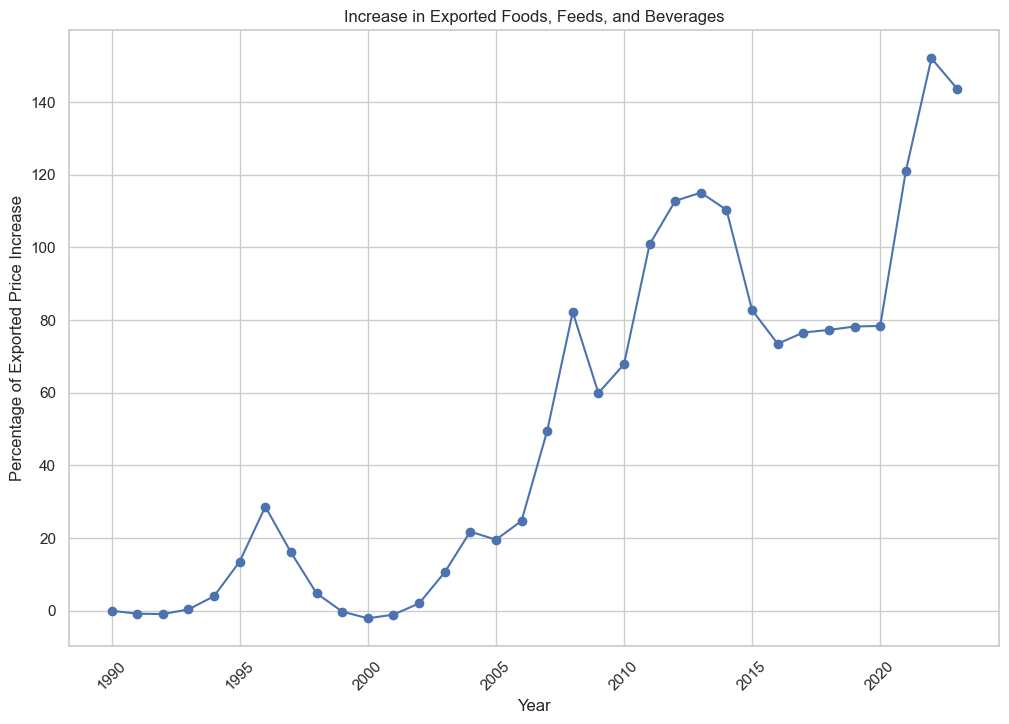

In [15]:
# Plot the average values
plt.figure(figsize = (12, 8))
plt.plot(df5_avg['Year'], df5_avg['Percent_Change_Export'], marker = 'o')
plt.title('Increase in Exported Foods, Feeds, and Beverages')
plt.xlabel('Year')
plt.ylabel('Percentage of Exported Price Increase')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

In [16]:
df6  =  pd.read_excel("./Downloads/import_bls_ffb.xlsx")
df6

Import/Export Price Indexes   
0          Original Data Value  \
1                          NaN   
2                   Series Id:   
3                Series Title:   
4                  Index Type:   
5                        Item:   
6                 Base Period:   
7                       Years:   
8                          NaN   
9                         Year   
10                        1990   
11                        1991   
12                        1992   
13                        1993   
14                        1994   
15                        1995   
16                        1996   
17                        1997   
18                        1998   
19                        1999   
20                        2000   
21                        2001   
22                        2002   
23                        2003   
24                        2004   
25                        2005   
26                        2006   
27                        2007   
28                        2008   
29                        2009   
30                        2010   
31                        2011   
32                        2012   
33                        2013   
34                        2014   
35                        2015   
36                        2016   
37                        2017   
38                        2018   
39                        2019   
40                        2020   
41                        2021   
42                        2022   
43                        2023   

                                           Unnamed: 1 Unnamed: 2 Unnamed: 3   
0                                                 NaN        NaN        NaN  \
1                                                 NaN        NaN        NaN   
2                                              EIUIR0        NaN        NaN   
3   Monthly import price index for BEA End Use 0, ...        NaN        NaN   
4                          BEA End Use Import Indexes        NaN        NaN   
5                           Foods, feeds, & beverages        NaN        NaN   
6                                            2000=100        NaN        NaN   
7                                        1990 to 2023        NaN        NaN   
8                                                 NaN        NaN        NaN   
9                                                 Jan        Feb        Mar   
10                                               90.5       91.3         90   
11                                               94.3       93.3       94.4   
12                                               96.8       96.7       97.6   
13                                               93.2       91.8       91.3   
14                                               96.4       95.8       96.7   
15                                              110.8      108.6      111.5   
16                                              104.6      107.6      106.2   
17                                              105.5      107.4      110.6   
18                                              106.6      105.5      105.4   
19                                              104.6      101.7      101.5   
20                                              102.1      101.7        101   
21                                               99.1         98       98.9   
22                                               95.7       93.8         95   
23                                              101.3      101.4      102.6   
24                                              103.7      105.3      105.9   
25                                              111.1      112.2      115.9   
26                                              119.2      116.7        117   
27                                              124.5      124.8      124.6   
28                                              138.1      137.8      141.8   
29                                              142.3      137.8        137   
30                     

In [17]:
# CLean 
# Drop the first 9 rows
df6  =  df6.iloc[9:]

# Set the 10th row as the header
new_header  =  df6.iloc[0]
df6  =  df6[1:]
df6.columns  =  new_header

# Reset the index
df6  =  df6.reset_index(drop = True)
# Rename the "Period" column to "Month"
df6  =  df6.rename(columns = {"Period": "Month"})

# Remove the number 9 from column headers
df6  =  df6.rename(columns = lambda x: str(x).replace("9", ""))

In [19]:
# Find the index of the baseline year (1990)
baseline_index  =  df6[df6['Year']  ==  1990].index[0]

# Calculate the percentage change for each year using the baseline year
df6i  =  df6.copy()
columns  =  df6i.columns[1:]  # Exclude the 'Year' column
for column in columns:
    df6i[column]  =  ((df6i[column] - df6i.loc[baseline_index, column]) / df6i.loc[baseline_index, column]) * 100

# Set the column names of df6i
df6i.columns  =  ['Year'] + list(columns)

# Display the new DataFrame
df6i


Year         Jan         Feb         Mar         Apr         May   
0   1990         0.0         0.0         0.0         0.0         0.0  \
1   1991    4.198895    2.190581    4.888889    5.921788    7.231638   
2   1992    6.961326    5.914567    8.444444    5.698324    4.293785   
3   1993    2.983425    0.547645    1.444444    3.128492    4.745763   
4   1994    6.519337    4.928806    7.444444    9.497207   12.655367   
5   1995   22.430939   18.948521   23.888889   21.452514   24.180791   
6   1996    15.58011   17.853231        18.0   22.569832   24.632768   
7   1997   16.574586   17.634173   22.888889   21.340782   24.293785   
8   1998   17.790055   15.553122   17.111111    18.77095   18.757062   
9   1999    15.58011   11.391019   12.777778    14.52514   16.836158   
10  2000    12.81768   11.391019   12.222222   13.743017   13.333333   
11  2001    9.502762    7.338445    9.888889    8.379888    9.152542   
12  2002    5.745856    2.738226    5.555556     7.26257    9.830508   
13  2003   11.933702   11.062432        14.0    14.52514   14.463277   
14  2004   14.585635   15.334064   17.666667   19.776536   20.677966   
15  2005   22.762431   22.891566   28.777778   29.162011   30.508475   
16  2006   31.712707   27.820372        30.0   29.832402   33.446328   
17  2007   37.569061   36.692223   38.444444   41.117318   43.954802   
18  2008   52.596685   50.930997   57.555556   60.558659   63.841808   
19  2009   57.237569   50.930997   52.222222   55.195531   57.288136   
20  2010   60.883978   59.145674   63.777778   66.480447   70.734463   
21  2011   84.198895   83.680175   94.333333  100.223464  101.016949   
22  2012    94.80663   87.732749   93.777778   94.972067    95.59322   
23  2013   86.519337   87.185104        93.0   93.519553   96.723164   
24  2014    95.58011   92.552026  102.333333  102.011173  102.824859   
25  2015   97.790055   96.276013   97.777778   97.094972   99.548023   
26  2016   92.044199   87.294633   89.333333   92.960894   95.819209   
27  2017    95.58011   95.180723   97.666667   99.441341  103.615819   
28  2018  101.436464  101.971522       103.0  103.575419  106.666667   
29  2019   98.453039   96.714129   98.888889  105.698324  106.327684   
30  2020   97.348066   97.918949   98.777778   96.759777  102.485876   
31  2021   98.232044   99.123768  106.333333  112.402235  114.350282   
32  2022  128.729282   130.33954  134.333333  137.653631  138.983051   
33  2023  134.033149  135.049288  136.333333  138.212291         NaN   

           Jun         Jul         Aug         Sep         Oct         Nov   
0          0.0         0.0         0.0         0.0         0.0         0.0  \
1      4.41989    3.986711    2.963776    2.176279    1.948052    3.850385   
2     2.320442    2.768549    1.646542    0.979325    0.757576    3.410341   
3      3.20442    3.543743     4.28101    4.134929    4.761905    5.280528   
4    12.707182   17.829457   19.538968   19.477693   20.562771   20.792079   
5    20.441989   21.483942   20.856202   18.171926   15.909091    18.70187   
6    18.674033   17.386489   15.367728   16.539717   16.125541   17.491749   
7    22.872928   20.044297   18.770582    18.28074   16.666667   17.491749   
8    17.016575    16.27907   12.513721   13.166485   13.744589   14.191419   
9    12.928177   12.070875   10.757409    9.575626    8.225108   11.551155   
10    9.834254    9.966777    9.330406    7.616975    7.034632    7.370737   
11    5.414365    4.540421    3.732162    3.373232    2.272727    4.730473   
12    6.298343     7.30897     6.36663    8.487486    8.225108     9.90099   
13   11.270718   12.403101   11.196487   10.772579   10.281385   12.651265   
14   18.121547   19.047619   17.782656    18.28074   19.047619   21.342134   
15   26.077348   25.913621   25.246981   24.265506     24.5671   27.172717   
16    30.38674   30.786268   32.381998   31.556039   31.060606   33.773377   
17    41.21547   43.300111   42.810099   43.416757   44.155844   46.754675   
1

In [20]:
# Set the 'Year' column as the index
df6i.set_index('Year', inplace = True)

# Calculate the average value for each year
df6_avg  =  df6i.mean(axis = 1).to_frame()

# Reset the index to make the year a column
df6_avg.reset_index(inplace = True)

# Rename the columns
df6_avg.columns  =  ['Year', 'Percent_Change_Import']

# Display the new DataFrame
print(df6_avg)

    Year Percent_Change_Import
0   1990                   0.0
1   1991              3.835239
2   1992              3.555039
3   1993              3.385262
4   1994             14.133364
5   1995             20.075431
6   1996             17.763531
7   1997             19.274807
8   1998             15.483604
9   1999             12.233899
10  2000             10.072022
11  2001              5.791865
12  2002              7.073835
13  2003             12.077868
14  2004             18.409543
15  2005             26.084499
16  2006             31.156653
17  2007             41.931177
18  2008             58.680373
19  2009              54.20367
20  2010             67.059988
21  2011             91.311264
22  2012             89.215106
23  2013             90.946495
24  2014              97.69193
25  2015             93.434883
26  2016             93.784537
27  2017             99.186445
28  2018             98.795208
29  2019             97.102614
30  2020             96.204277
31  2021

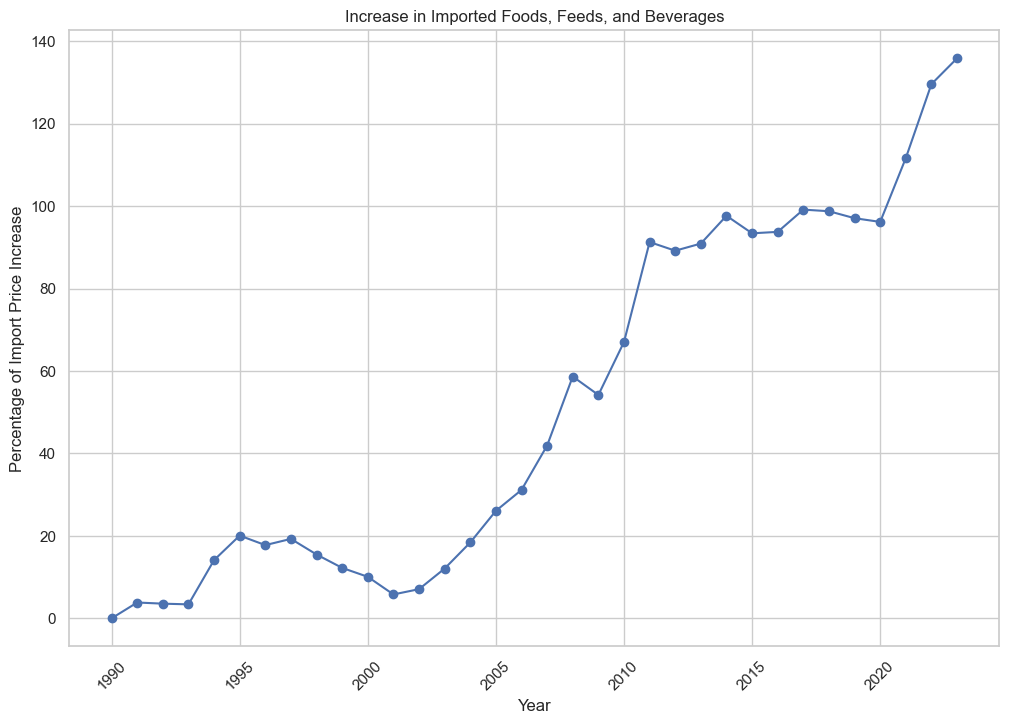

In [21]:
# Plot the average values
plt.figure(figsize = (12, 8))
plt.plot(df6_avg['Year'], df6_avg['Percent_Change_Import'], marker = 'o')
plt.title('Increase in Imported Foods, Feeds, and Beverages')
plt.xlabel('Year')
plt.ylabel('Percentage of Import Price Increase')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()


# Fruits

In [22]:
oranges  =  pd.read_excel("./Downloads/CPI_AVG_PRICE_ORANGES.xlsx")
oranges
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
oranges  =  oranges.iloc[8:]

# Set the 10th row as the header
new_header  =  oranges.iloc[0]
oranges  =  oranges[1:]
oranges.columns  =  new_header

# Reset the index
oranges  =  oranges.reset_index(drop = True)

# Remove the number 9 from column headers
oranges  =  oranges.rename(columns = lambda x: str(x).replace("9", ""))
oranges
# Set the 'Year' column as the index
oranges.set_index('Year', inplace = True)

# Calculate the average value for each year
oranges_avg  =  oranges.mean(axis = 1).to_frame()

# Reset the index to make the year a column
oranges_avg.reset_index(inplace = True)

# Rename the columns
oranges_avg.columns  =  ['Year', 'Oranges_Average']

# Display the new DataFrame
oranges_avg

Year Oranges_Average
0   1990         0.56975
1   1991           0.784
2   1992        0.574143
3   1993        0.549429
4   1994        0.545429
5   1995        0.624571
6   1996        0.617286
7   1997        0.597714
8   1998        0.564667
9   1999        0.842833
10  2000           0.628
11  2001        0.721714
12  2002        0.835875
13  2003        0.838111
14  2004        0.858556
15  2005          0.9958
16  2006        1.087182
17  2007        1.284455
18  2008        1.116333
19  2009        1.050417
20  2010         1.06175
21  2011         1.09575
22  2012        1.053167
23  2013         1.15075
24  2014        1.318917
25  2015        1.304417
26  2016        1.245917
27  2017         1.34075
28  2018        1.412833
29  2019        1.366667
30  2020           1.245
31  2021        1.362111
32  2022           1.572
33  2023          1.5255

In [23]:
bananas  =  pd.read_excel("./Downloads/CPI_AVG_PRICE_BANANAS.xlsx")
bananas
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
bananas  =  bananas.iloc[8:]

# Set the 10th row as the header
new_header  =  bananas.iloc[0]
bananas  =  bananas[1:]
bananas.columns  =  new_header

# Reset the index
bananas  =  bananas.reset_index(drop = True)

# Remove the number 9 from column headers
bananas  =  bananas.rename(columns = lambda x: str(x).replace("9", ""))
bananas
# Set the 'Year' column as the index
bananas.set_index('Year', inplace = True)

# Calculate the average value for each year
bananas_avg  =  bananas.mean(axis = 1).to_frame()

# Reset the index to make the year a column
bananas_avg.reset_index(inplace = True)

# Rename the columns
bananas_avg.columns  =  ['Year', 'Bananas_Average']

# Display the new DataFrame
print(bananas_avg)

    Year Bananas_Average
0   1990         0.46325
1   1991           0.481
2   1992        0.458083
3   1993         0.43875
4   1994        0.462167
5   1995        0.489667
6   1996        0.489583
7   1997        0.486583
8   1998        0.493917
9   1999        0.490833
10  2000           0.501
11  2001        0.506667
12  2002          0.5075
13  2003        0.508667
14  2004         0.49525
15  2005        0.492167
16  2006        0.500333
17  2007        0.510167
18  2008        0.609333
19  2009        0.611167
20  2010        0.579667
21  2011        0.610167
22  2012        0.602083
23  2013        0.599583
24  2014        0.598083
25  2015         0.58275
26  2016           0.573
27  2017        0.562583
28  2018        0.573833
29  2019        0.573583
30  2020        0.577917
31  2021        0.600083
32  2022          0.6365
33  2023         0.63675


In [24]:
lemons  =  pd.read_excel("./Downloads/BLS CPI Lemons, per lb.xlsx")
lemons
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
lemons  =  lemons.iloc[8:]

# Set the 10th row as the header
new_header  =  lemons.iloc[0]
lemons  =  lemons[1:]
lemons.columns  =  new_header

# Reset the index
lemons  =  lemons.reset_index(drop = True)

# Remove the number 9 from column headers
lemons  =  lemons.rename(columns = lambda x: str(x).replace("9", ""))
lemons
# Set the 'Year' column as the index
lemons.set_index('Year', inplace = True)

# Calculate the average value for each year
lemons_avg  =  lemons.mean(axis = 1).to_frame()

# Reset the index to make the year a column
lemons_avg.reset_index(inplace = True)

# Rename the columns
lemons_avg.columns  =  ['Year', 'Lemons_Average']

# Display the new DataFrame
print(lemons_avg)

    Year Lemons_Average
0   1993        1.08375
1   1994       1.108833
2   1995        1.13625
3   1996       1.114417
4   1997       1.252583
5   1998       1.197917
6   1999         1.3335
7   2000       1.289417
8   2001          1.265
9   2002       1.390667
10  2003       1.317417
11  2004       1.234833
12  2005       1.410833
13  2006          1.529
14  2007       1.856917
15  2008       2.005583
16  2009           1.52
17  2010        1.63425
18  2011       1.580667
19  2012         1.5645
20  2013        1.58175
21  2014       1.967667
22  2015       1.981417
23  2016       2.037417
24  2017       2.006833
25  2018          2.249
26  2019       2.129333
27  2020       1.934667
28  2021        1.98275
29  2022       2.127636
30  2023         2.1912


In [25]:
strawberry  =  pd.read_excel("./Downloads/BLS CPI Strawberries, dry pint, per 12 oz.xlsx")
strawberry
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
strawberry  =  strawberry.iloc[8:]

# Set the 10th row as the header
new_header  =  strawberry.iloc[0]
strawberry  =  strawberry[1:]
strawberry.columns  =  new_header

# Reset the index
strawberry  =  strawberry.reset_index(drop = True)

# Remove the number 9 from column headers
strawberry  =  strawberry.rename(columns = lambda x: str(x).replace("9", ""))
strawberry
# Set the 'Year' column as the index
strawberry.set_index('Year', inplace = True)

# Calculate the average value for each year
strawberry_avg  =  strawberry.mean(axis = 1).to_frame()

# Reset the index to make the year a column
strawberry_avg.reset_index(inplace = True)

# Rename the columns
strawberry_avg.columns  =  ['Year', 'Strawberry_Average_per_12oz']

# Display the new DataFrame
print(strawberry_avg)

    Year Strawberry_Average_per_12oz
0   1993                    1.118778
1   1994                    1.134222
2   1995                    1.318333
3   1996                      1.2938
4   1997                    1.355111
5   1998                      1.6426
6   1999                      1.6945
7   2000                      1.5326
8   2001                    1.865727
9   2002                       1.857
10  2003                       1.929
11  2004                     2.23275
12  2005                       2.111
13  2006                    2.041583
14  2007                      2.2025
15  2008                    2.287667
16  2009                       2.098
17  2010                      2.1855
18  2011                    2.075333
19  2012                      1.9925
20  2013                    2.023636
21  2014                     2.28875
22  2015                    2.215727
23  2016                     2.43525
24  2017                     2.33925
25  2018                     2.34375
2

In [26]:
fruits = lemons_avg.merge(oranges_avg,on = 'Year',how = 'left')
fruits = fruits.merge(bananas_avg, on = 'Year',how = 'left')
fruits = fruits.merge(strawberry_avg, on = 'Year',how = 'left')
fruits

Year Lemons_Average Oranges_Average Bananas_Average   
0   1993        1.08375        0.549429         0.43875  \
1   1994       1.108833        0.545429        0.462167   
2   1995        1.13625        0.624571        0.489667   
3   1996       1.114417        0.617286        0.489583   
4   1997       1.252583        0.597714        0.486583   
5   1998       1.197917        0.564667        0.493917   
6   1999         1.3335        0.842833        0.490833   
7   2000       1.289417           0.628           0.501   
8   2001          1.265        0.721714        0.506667   
9   2002       1.390667        0.835875          0.5075   
10  2003       1.317417        0.838111        0.508667   
11  2004       1.234833        0.858556         0.49525   
12  2005       1.410833          0.9958        0.492167   
13  2006          1.529        1.087182        0.500333   
14  2007       1.856917        1.284455        0.510167   
15  2008       2.005583        1.116333        0.609333   
16  2009           1.52        1.050417        0.611167   
17  2010        1.63425         1.06175        0.579667   
18  2011       1.580667         1.09575        0.610167   
19  2012         1.5645        1.053167        0.602083   
20  2013        1.58175         1.15075        0.599583   
21  2014       1.967667        1.318917        0.598083   
22  2015       1.981417        1.304417         0.58275   
23  2016       2.037417        1.245917           0.573   
24  2017       2.006833         1.34075        0.562583   
25  2018          2.249        1.412833        0.573833   
26  2019       2.129333        1.366667        0.573583   
27  2020       1.934667           1.245        0.577917   
28  2021        1.98275        1.362111        0.600083   
29  2022       2.127636           1.572          0.6365   
30  2023         2.1912          1.5255         0.63675   

   Strawberry_Average_per_12oz  
0                     1.118778  
1                     1.134222  
2                     1.318333  
3                       1.2938  
4                     1.355111  
5                       1.6426  
6                       1.6945  
7                       1.5326  
8                     1.865727  
9                        1.857  
10                       1.929  
11                     2.23275  
12                       2.111  
13                    2.041583  
14                      2.2025  
15                    2.287667  
16                       2.098  
17                      2.1855  
18                    2.075333  
19                      1.9925  
20                    2.023636  
21                     2.28875  
22                    2.215727  
23                     2.43525  
24                     2.33925  
25                     2.34375  
26                       2.462  
27                    2.494545  
28                    2.665091  
29                    2.878083  
30                      2.9694

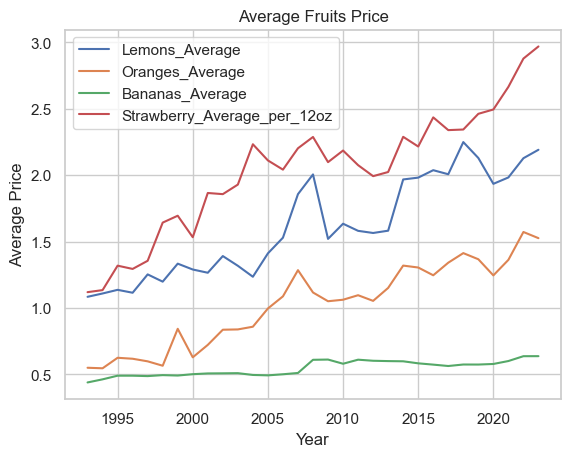

In [27]:
# Plotting the data
fruits.plot(x = 'Year', y = ['Lemons_Average', 'Oranges_Average', 'Bananas_Average', 'Strawberry_Average_per_12oz'])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Fruits Price')

# Adding a legend
plt.legend()

# Displaying the graph
plt.show()

# Vegetables

In [28]:
lettuce  =  pd.read_excel("./Downloads/BLS CPS Lettuce, iceberg, per lb.xlsx")
lettuce
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
lettuce  =  lettuce.iloc[8:]

# Set the 10th row as the header
new_header  =  lettuce.iloc[0]
lettuce  =  lettuce[1:]
lettuce.columns  =  new_header

# Reset the index
lettuce  =  lettuce.reset_index(drop = True)

# Remove the number 9 from column headers
lettuce  =  lettuce.rename(columns = lambda x: str(x).replace("9", ""))
lettuce
# Set the 'Year' column as the index
lettuce.set_index('Year', inplace = True)

# Calculate the average value for each year
lettuce_avg  =  lettuce.mean(axis = 1).to_frame()

# Reset the index to make the year a column
lettuce_avg.reset_index(inplace = True)

# Rename the columns
lettuce_avg.columns  =  ['Year', 'Lettuce_Average']

# Display the new DataFrame
print(lettuce_avg)

    Year Lettuce_Average
0   1993        0.655917
1   1994        0.607667
2   1995         0.80125
3   1996         0.64775
4   1997           0.694
5   1998        0.756667
6   1999        0.674417
7   2000        0.735917
8   2001        0.792833
9   2002        0.861167
10  2003           0.823
11  2004        0.797833
12  2005        0.870167
13  2006          0.8655
14  2007        0.928333
15  2008        0.905333
16  2009        0.913333
17  2010        0.874667
18  2011        0.988833
19  2012           0.857
20  2013        1.014636
21  2014         1.05275
22  2015          1.1615
23  2016        1.063583
24  2017        1.029333
25  2018           0.944
26  2019        1.184333
27  2020          1.2945
28  2023             1.7


In [29]:
tomatoes  =  pd.read_excel("./Downloads/CPI_AVG_PRICE_TOMATOES.xlsx")
tomatoes
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
tomatoes  =  tomatoes.iloc[8:]

# Set the 10th row as the header
new_header  =  tomatoes.iloc[0]
tomatoes  =  tomatoes[1:]
tomatoes.columns  =  new_header

# Reset the index
tomatoes  =  tomatoes.reset_index(drop = True)

# Remove the number 9 from column headers
tomatoes  =  tomatoes.rename(columns = lambda x: str(x).replace("9", ""))
tomatoes
# Set the 'Year' column as the index
tomatoes.set_index('Year', inplace = True)

# Calculate the average value for each year
tomatoes_avg  =  tomatoes.mean(axis = 1).to_frame()

# Reset the index to make the year a column
tomatoes_avg.reset_index(inplace = True)

# Rename the columns
tomatoes_avg.columns  =  ['Year', 'Tomatoes_Average']

# Display the new DataFrame
print(tomatoes_avg)

    Year Tomatoes_Average
0   1990          1.08025
1   1991         1.006583
2   1992          1.09425
3   1993          1.08375
4   1994         1.085833
5   1995          1.15625
6   1996             1.21
7   1997         1.292917
8   1998         1.476167
9   1999         1.369667
10  2000            1.382
11  2001         1.320333
12  2002           1.3245
13  2003         1.509083
14  2004         1.606333
15  2005         1.611083
16  2006         1.731667
17  2007         1.646583
18  2008         1.744083
19  2009          1.62275
20  2010         1.692417
21  2011         1.667333
22  2012         1.456583
23  2013         1.531909
24  2014          1.70725
25  2015         1.841167
26  2016         1.925583
27  2017            1.931
28  2018         1.916333
29  2019           1.9305
30  2020           1.9628
31  2021         1.849083
32  2022         1.911833
33  2023           1.9765


In [30]:
potatoes  =  pd.read_excel("./Downloads/BLS CPI Potatoes, white, per lb.xlsx")
potatoes
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
potatoes  =  potatoes.iloc[8:]

# Set the 10th row as the header
new_header  =  potatoes.iloc[0]
potatoes  =  potatoes[1:]
potatoes.columns  =  new_header

# Reset the index
potatoes  =  potatoes.reset_index(drop = True)

# Remove the number 9 from column headers
potatoes  =  potatoes.rename(columns = lambda x: str(x).replace("9", ""))
potatoes
# Set the 'Year' column as the index
potatoes.set_index('Year', inplace = True)

# Calculate the average value for each year
potatoes_avg  =  potatoes.mean(axis = 1).to_frame()

# Reset the index to make the year a column
potatoes_avg.reset_index(inplace = True)

# Rename the columns
potatoes_avg.columns  =  ['Year', 'Potatoes_Average']

# Display the new DataFrame
print(potatoes_avg)

    Year Potatoes_Average
0   1993         0.348417
1   1994            0.374
2   1995         0.379333
3   1996            0.381
4   1997         0.355583
5   1998           0.3755
6   1999          0.39425
7   2000         0.379833
8   2001             0.39
9   2002          0.49325
10  2003           0.4585
11  2004         0.453583
12  2005          0.47125
13  2006         0.533667
14  2007          0.52475
15  2008         0.630917
16  2009         0.621833
17  2010            0.577
18  2011         0.676917
19  2012         0.659167
20  2013         0.667583
21  2014         0.673917
22  2015         0.649583
23  2016          0.68125
24  2017         0.723667
25  2018         0.739667
26  2019         0.767333
27  2020           0.8112
28  2021         0.780083
29  2022         0.906333
30  2023           0.9774


In [31]:
vegs = lettuce_avg.merge(tomatoes_avg,on = 'Year',how = 'left')
vegs = vegs.merge(potatoes_avg, on = 'Year',how = 'left')
vegs

Year Lettuce_Average Tomatoes_Average Potatoes_Average
0   1993        0.655917          1.08375         0.348417
1   1994        0.607667         1.085833            0.374
2   1995         0.80125          1.15625         0.379333
3   1996         0.64775             1.21            0.381
4   1997           0.694         1.292917         0.355583
5   1998        0.756667         1.476167           0.3755
6   1999        0.674417         1.369667          0.39425
7   2000        0.735917            1.382         0.379833
8   2001        0.792833         1.320333             0.39
9   2002        0.861167           1.3245          0.49325
10  2003           0.823         1.509083           0.4585
11  2004        0.797833         1.606333         0.453583
12  2005        0.870167         1.611083          0.47125
13  2006          0.8655         1.731667         0.533667
14  2007        0.928333         1.646583          0.52475
15  2008        0.905333         1.744083         0.630917
16  2009        0.913333          1.62275         0.621833
17  2010        0.874667         1.692417            0.577
18  2011        0.988833         1.667333         0.676917
19  2012           0.857         1.456583         0.659167
20  2013        1.014636         1.531909         0.667583
21  2014         1.05275          1.70725         0.673917
22  2015          1.1615         1.841167         0.649583
23  2016        1.063583         1.925583          0.68125
24  2017        1.029333            1.931         0.723667
25  2018           0.944         1.916333         0.739667
26  2019        1.184333           1.9305         0.767333
27  2020          1.2945           1.9628           0.8112
28  2023             1.7           1.9765           0.9774

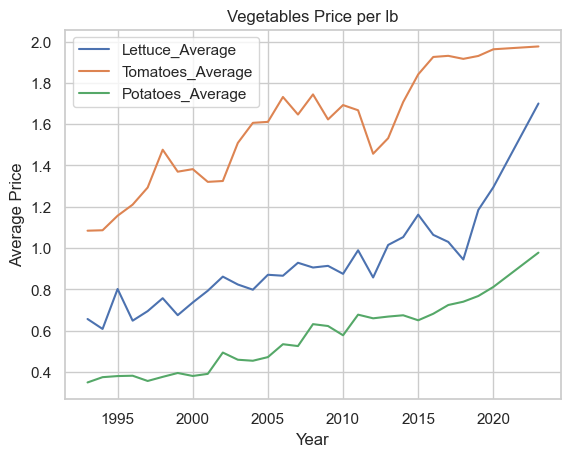

In [32]:
vegs = vegs.dropna()
# Plotting the data
vegs.plot(x = 'Year', y = ['Lettuce_Average', 'Tomatoes_Average', 'Potatoes_Average'])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Vegetables Price per lb')

# Adding a legend
plt.legend()

# Displaying the graph
plt.show()

# Grains/ Grain Products

In [33]:
flour  =  pd.read_excel("./Downloads/CPI_AVG_PRICE_FLOUR.xlsx")
flour
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
flour  =  flour.iloc[8:]

# Set the 10th row as the header
new_header  =  flour.iloc[0]
flour  =  flour[1:]
flour.columns  =  new_header

# Reset the index
flour  =  flour.reset_index(drop = True)

# Remove the number 9 from column headers
flour  =  flour.rename(columns = lambda x: str(x).replace("9", ""))
flour
# Set the 'Year' column as the index
flour.set_index('Year', inplace = True)

# Calculate the average value for each year
flour_avg  =  flour.mean(axis = 1).to_frame()

# Reset the index to make the year a column
flour_avg.reset_index(inplace = True)

# Rename the columns
flour_avg.columns  =  ['Year', 'Flour_Average_per_lb']

# Display the new DataFrame
print(flour_avg)

    Year Flour_Average_per_lb
0   1990              0.24975
1   1991             0.233583
2   1992                0.243
3   1993             0.234417
4   1994             0.231083
5   1995             0.245417
6   1996             0.287667
7   1997             0.301917
8   1998             0.299833
9   1999             0.293917
10  2000              0.29025
11  2001             0.302333
12  2002               0.3115
13  2003             0.311667
14  2004             0.302583
15  2005             0.323917
16  2006             0.328667
17  2007              0.36025
18  2008             0.506667
19  2009             0.501083
20  2010             0.476917
21  2011             0.518083
22  2012             0.516917
23  2013             0.521583
24  2014             0.529833
25  2015             0.516667
26  2016                0.525
27  2017              0.50725
28  2018              0.46175
29  2019             0.441167
30  2020             0.451364
31  2021              0.40375
32  2022  

In [34]:
rice  =  pd.read_excel("./Downloads/BLS CPI Rice, white, long grain, uncooked, per lb.xlsx")
rice
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
rice  =  rice.iloc[8:]

# Set the 10th row as the header
new_header  =  rice.iloc[0]
rice  =  rice[1:]
rice.columns  =  new_header

# Reset the index
rice  =  rice.reset_index(drop = True)

# Remove the number 9 from column headers
rice  =  rice.rename(columns = lambda x: str(x).replace("9", ""))
rice
# Set the 'Year' column as the index
rice.set_index('Year', inplace = True)

# Calculate the average value for each year
rice_avg  =  rice.mean(axis = 1).to_frame()

# Reset the index to make the year a column
rice_avg.reset_index(inplace = True)

# Rename the columns
rice_avg.columns  =  ['Year', 'Rice_Average_per_lb']

# Display the new DataFrame
print(rice_avg)

    Year Rice_Average_per_lb
0   1993             0.51225
1   1994             0.54675
2   1995              0.5245
3   1996            0.546167
4   1997               0.565
5   1998            0.541917
6   1999            0.536833
7   2000              0.4905
8   2002            0.469375
9   2003            0.452167
10  2004            0.536333
11  2005            0.554083
12  2006            0.549167
13  2007               0.549
14  2008            0.732583
15  2009            0.765667
16  2010            0.740667
17  2011            0.740667
18  2012            0.696833
19  2013            0.723583
20  2014               0.734
21  2015            0.685417
22  2016            0.716167
23  2017             0.72125
24  2018            0.693583
25  2019              0.7645
26  2020            0.758545
27  2021             0.79375
28  2022               0.913
29  2023              0.9776


In [35]:
pasta  =  pd.read_excel("./Downloads/BLS CPI Spaghetti and macaroni, per lb..xlsx")
pasta
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
pasta  =  pasta.iloc[8:]

# Set the 10th row as the header
new_header  =  pasta.iloc[0]
pasta  =  pasta[1:]
pasta.columns  =  new_header

# Reset the index
pasta  =  pasta.reset_index(drop = True)

# Remove the number 9 from column headers
pasta  =  pasta.rename(columns = lambda x: str(x).replace("9", ""))
pasta
# Set the 'Year' column as the index
pasta.set_index('Year', inplace = True)

# Calculate the average value for each year
pasta_avg  =  pasta.mean(axis = 1).to_frame()

# Reset the index to make the year a column
pasta_avg.reset_index(inplace = True)

# Rename the columns
pasta_avg.columns  =  ['Year', 'Pasta_Average_per_lb']

# Display the new DataFrame
print(pasta_avg)

    Year Pasta_Average_per_lb
0   1993             0.825917
1   1994             0.865083
2   1995             0.860667
3   1996             0.864583
4   1997             0.872667
5   1998             0.880083
6   1999             0.878583
7   2000             0.862167
8   2001               0.9075
9   2002             0.918417
10  2003             0.932667
11  2004               0.9465
12  2005             0.898667
13  2006               0.8585
14  2007                0.875
15  2008                 1.12
16  2009             1.164333
17  2010               1.1375
18  2011             1.242083
19  2012             1.321583
20  2013             1.304833
21  2014             1.282917
22  2015             1.318333
23  2016              1.30025
24  2017             1.276917
25  2018             1.185583
26  2019             1.205583
27  2020             1.262667
28  2021              1.17925
29  2022              1.29625
30  2023                1.469


In [36]:
bread  =  pd.read_excel("./Downloads/CPI_AVG_PRICE_BREAD.xlsx")
bread
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
bread  =  bread.iloc[8:]

# Set the 10th row as the header
new_header  =  bread.iloc[0]
bread  =  bread[1:]
bread.columns  =  new_header

# Reset the index
bread  =  bread.reset_index(drop = True)

# Remove the number 9 from column headers
bread  =  bread.rename(columns = lambda x: str(x).replace("9", ""))
bread
# Set the 'Year' column as the index
bread.set_index('Year', inplace = True)

# Calculate the average value for each year
bread_avg  =  bread.mean(axis = 1).to_frame()

# Reset the index to make the year a column
bread_avg.reset_index(inplace = True)

# Rename the columns
bread_avg.columns  =  ['Year', 'Bread_Average_per_lb']

# Display the new DataFrame
print(bread_avg)

    Year Bread_Average_per_lb
0   1990             0.694583
1   1991             0.709833
2   1992             0.749833
3   1993             0.752083
4   1994             0.760667
5   1995              0.79125
6   1996             0.875667
7   1997              0.87225
8   1998             0.860167
9   1999             0.887083
10  2000             0.930167
11  2001             0.999083
12  2002             1.015583
13  2003              1.00075
14  2004             0.969417
15  2005             1.040333
16  2006               1.0805
17  2007             1.207333
18  2008             1.366417
19  2009             1.387417
20  2010             1.373333
21  2011             1.444667
22  2012             1.417667
23  2013             1.406667
24  2014              1.40125
25  2015                1.441
26  2016              1.37125
27  2017             1.332583
28  2018                1.286
29  2019             1.297667
30  2020             1.451667
31  2021             1.523583
32  2022  

In [37]:
grains = bread_avg.merge(flour_avg,on = 'Year',how = 'left')
grains = grains.merge(rice_avg, on = 'Year',how = 'left')
grains = grains.merge(pasta_avg, on = 'Year',how = 'left')
grains

Year Bread_Average_per_lb Flour_Average_per_lb Rice_Average_per_lb   
0   1990             0.694583              0.24975                 NaN  \
1   1991             0.709833             0.233583                 NaN   
2   1992             0.749833                0.243                 NaN   
3   1993             0.752083             0.234417             0.51225   
4   1994             0.760667             0.231083             0.54675   
5   1995              0.79125             0.245417              0.5245   
6   1996             0.875667             0.287667            0.546167   
7   1997              0.87225             0.301917               0.565   
8   1998             0.860167             0.299833            0.541917   
9   1999             0.887083             0.293917            0.536833   
10  2000             0.930167              0.29025              0.4905   
11  2001             0.999083             0.302333                 NaN   
12  2002             1.015583               0.3115            0.469375   
13  2003              1.00075             0.311667            0.452167   
14  2004             0.969417             0.302583            0.536333   
15  2005             1.040333             0.323917            0.554083   
16  2006               1.0805             0.328667            0.549167   
17  2007             1.207333              0.36025               0.549   
18  2008             1.366417             0.506667            0.732583   
19  2009             1.387417             0.501083            0.765667   
20  2010             1.373333             0.476917            0.740667   
21  2011             1.444667             0.518083            0.740667   
22  2012             1.417667             0.516917            0.696833   
23  2013             1.406667             0.521583            0.723583   
24  2014              1.40125             0.529833               0.734   
25  2015                1.441             0.516667            0.685417   
26  2016              1.37125                0.525            0.716167   
27  2017             1.332583              0.50725             0.72125   
28  2018                1.286              0.46175            0.693583   
29  2019             1.297667             0.441167              0.7645   
30  2020             1.451667             0.451364            0.758545   
31  2021             1.523583              0.40375             0.79375   
32  2022              1.70025             0.493917               0.913   
33  2023              1.92725               0.5445              0.9776   

   Pasta_Average_per_lb  
0                   NaN  
1                   NaN  
2                   NaN  
3              0.825917  
4              0.865083  
5              0.860667  
6              0.864583  
7              0.872667  
8              0.880083  
9              0.878583  
10             0.862167  
11               0.9075  
12             0.918417  
13             0.932667  
14               0.9465  
15             0.898667  
16               0.8585  
17                0.875  
18                 1.12  
19             1.164333  
20               1.1375  
21             1.242083  
22             1.321583  
23             1.304833  
24             1.282917  
25             1.318333  
26              1.30025  
27             1.276917  
28             1.185583  
29             1.205583  
30             1.262667  
31              1.17925  
32              1.29625  
33                1.469

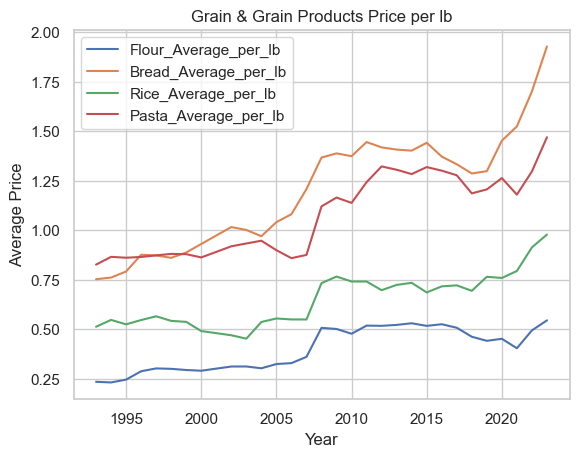

In [38]:
grains = grains.dropna()
# Plotting the data
grains.plot(x = 'Year', y = ['Flour_Average_per_lb', 'Bread_Average_per_lb', 'Rice_Average_per_lb', 'Pasta_Average_per_lb'])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Grain & Grain Products Price per lb')

# Adding a legend
plt.legend()

# Displaying the graph
plt.show()

# Dairy, Sugar,  etc.

In [39]:
milk  =  pd.read_excel("./Downloads/CPI_AVG_PRICE_MILK.xlsx")
milk
#CPI Average Price Data, U.S. city average

# CLean 
# Drop the first 8 rows
milk  =  milk.iloc[8:]

# Set the 10th row as the header
new_header  =  milk.iloc[0]
milk  =  milk[1:]
milk.columns  =  new_header

# Reset the index
milk  =  milk.reset_index(drop = True)

# Remove the number 9 from column headers
milk  =  milk.rename(columns = lambda x: str(x).replace("9", ""))
milk

# Set the 'Year' column as the index
milk.set_index('Year', inplace = True)

# Calculate the average value for each year
milk_avg  =  milk.mean(axis = 1).to_frame()

# Reset the index to make the year a column
milk_avg.reset_index(inplace = True)

# Rename the columns
milk_avg.columns  =  ['Year', 'Milk_Average_per_gal']

# Display the new DataFrame
print(milk_avg)

    Year Milk_Average_per_gal
0   1995             2.483667
1   1996             2.623167
2   1997                2.614
3   1998              2.70375
4   1999              2.84275
5   2000             2.780667
6   2001              2.88425
7   2002              2.75725
8   2003             2.761083
9   2004             3.155917
10  2005             3.186833
11  2006             3.081333
12  2007              3.50325
13  2008             3.795333
14  2009                3.109
15  2010               3.2585
16  2011             3.571583
17  2012               3.4925
18  2013             3.461917
19  2014             3.693667
20  2015              3.41875
21  2016              3.20425
22  2017               3.2255
23  2018             2.895833
24  2019             3.035667
25  2020             3.318417
26  2021               3.5445
27  2022                4.091
28  2023              4.12675


In [40]:
eggs  =  pd.read_excel("./Downloads/CPI_AVG_PRICE_EGGS.xlsx")
eggs
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
eggs  =  eggs.iloc[8:]

# Set the 10th row as the header
new_header  =  eggs.iloc[0]
eggs  =  eggs[1:]
eggs.columns  =  new_header

# Reset the index
eggs  =  eggs.reset_index(drop = True)

# Remove the number 9 from column headers
eggs  =  eggs.rename(columns = lambda x: str(x).replace("9", ""))
eggs
# Set the 'Year' column as the index
eggs.set_index('Year', inplace = True)

# Calculate the average value for each year
eggs_avg  =  eggs.mean(axis = 1).to_frame()

# Reset the index to make the year a column
eggs_avg.reset_index(inplace = True)

# Rename the columns
eggs_avg.columns  =  ['Year', 'Eggs_Average_per_doz']

# Display the new DataFrame
print(eggs_avg)

    Year Eggs_Average_per_doz
0   1990             1.013917
1   1991              0.98925
2   1992             0.860167
3   1993             0.911417
4   1994             0.862833
5   1995               0.9245
6   1996             1.106333
7   1997             1.058333
8   1998             1.037417
9   1999              0.95925
10  2000               0.9135
11  2001             0.929333
12  2002                1.032
13  2003             1.244417
14  2004               1.3395
15  2005             1.218167
16  2006              1.30625
17  2007              1.67625
18  2008               1.9865
19  2009                1.664
20  2010             1.659667
21  2011               1.7695
22  2012             1.837667
23  2013               1.9095
24  2014               2.0185
25  2015             2.469417
26  2016             1.684167
27  2017             1.467083
28  2018             1.741667
29  2019             1.395833
30  2020              1.50575
31  2021                1.674
32  2022  

In [41]:
cheese  =  pd.read_excel("./Downloads/BLS CPI American processed cheese.xlsx")
cheese
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
cheese  =  cheese.iloc[8:]

# Set the 10th row as the header
new_header  =  cheese.iloc[0]
cheese  =  cheese[1:]
cheese.columns  =  new_header

# Reset the index
cheese  =  cheese.reset_index(drop = True)

# Remove the number 9 from column headers
cheese  =  cheese.rename(columns = lambda x: str(x).replace("9", ""))
cheese
# Set the 'Year' column as the index
cheese.set_index('Year', inplace = True)

# Calculate the average value for each year
cheese_avg  =  cheese.mean(axis = 1).to_frame()

# Reset the index to make the year a column
cheese_avg.reset_index(inplace = True)

# Rename the columns
cheese_avg.columns  =  ['Year', 'Cheese_Average_per_lb']

# Display the new DataFrame
print(cheese_avg)

    Year Cheese_Average_per_lb
0   1993              3.094417
1   1994              3.069417
2   1995                3.0655
3   1996              3.335333
4   1997               3.44925
5   1998              3.589917
6   1999              3.810917
7   2000               3.69825
8   2001              3.871417
9   2002              3.880583
10  2003              3.771417
11  2004              3.984333
12  2005               3.88075
13  2006              3.719917
14  2007              3.839167
15  2008              4.042083
16  2009              3.902833
17  2010              3.910417
18  2011              4.066083
19  2012                 4.188
20  2013              4.174833
21  2014                4.4935
22  2015              4.455917
23  2016              4.366917
24  2017               4.24775
25  2018              4.007364
26  2019              3.876417
27  2020               4.10425
28  2021              4.036167
29  2022              4.401083
30  2023                4.7298


In [42]:
sugar  =  pd.read_excel("./Downloads/BLS CPI Sugar, white, all sizes, per lb.xlsx")
sugar
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
sugar  =  sugar.iloc[8:]

# Set the 10th row as the header
new_header  =  sugar.iloc[0]
sugar  =  sugar[1:]
sugar.columns  =  new_header

# Reset the index
sugar  =  sugar.reset_index(drop = True)

# Remove the number 9 from column headers
sugar  =  sugar.rename(columns = lambda x: str(x).replace("9", ""))
sugar
# Set the 'Year' column as the index
sugar.set_index('Year', inplace = True)

# Calculate the average value for each year
sugar_avg  =  sugar.mean(axis = 1).to_frame()

# Reset the index to make the year a column
sugar_avg.reset_index(inplace = True)

# Rename the columns
sugar_avg.columns  =  ['Year', 'Sugar_Average']

# Display the new DataFrame
print(sugar_avg)

    Year Sugar_Average
0   1993      0.405417
1   1994      0.399917
2   1995      0.398333
3   1996      0.417917
4   1997      0.432583
5   1998       0.42975
6   1999      0.432667
7   2000      0.424083
8   2001      0.434167
9   2002         0.431
10  2003       0.42675
11  2004      0.426417
12  2005      0.435417
13  2006      0.495833
14  2007       0.51475
15  2008         0.529
16  2009      0.570333
17  2010      0.628583
18  2011         0.683
19  2012      0.694083
20  2013      0.643167
21  2014         0.609
22  2015      0.653583
23  2016      0.641917
24  2017      0.647583
25  2018       0.61625
26  2019      0.590083
27  2020      0.633583
28  2021         0.684
29  2022      0.783167
30  2023        0.8816


In [43]:
coffee  =  pd.read_excel("./Downloads/BLS CPI Coffee, 100%, ground roast, all sizes, per lb.xlsx")
coffee
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
coffee  =  coffee.iloc[8:]

# Set the 10th row as the header
new_header  =  coffee.iloc[0]
coffee  =  coffee[1:]
coffee.columns  =  new_header

# Reset the index
coffee  =  coffee.reset_index(drop = True)

# Remove the number 9 from column headers
coffee  =  coffee.rename(columns = lambda x: str(x).replace("9", ""))
coffee
# Set the 'Year' column as the index
coffee.set_index('Year', inplace = True)

# Calculate the average value for each year
coffee_avg  =  coffee.mean(axis = 1).to_frame()

# Reset the index to make the year a column
coffee_avg.reset_index(inplace = True)

# Rename the columns
coffee_avg.columns  =  ['Year', 'Coffee_Average']

# Display the new DataFrame
print(coffee_avg)

    Year Coffee_Average
0   1993       2.471583
1   1994       3.401333
2   1995       4.037917
3   1996        3.43025
4   1997        4.11075
5   1998          3.765
6   1999       3.427333
7   2000        3.44975
8   2001       3.092583
9   2002        2.92375
10  2003        2.91625
11  2004       2.849417
12  2005         3.2625
13  2006       3.203167
14  2007         3.4689
15  2009          3.669
16  2010       3.905667
17  2011        5.19075
18  2012          5.676
19  2013       5.452833
20  2014       4.989583
21  2015           4.72
22  2016       4.392833
23  2017       4.452667
24  2018       4.302333
25  2019       4.141333
26  2020       4.432583
27  2021          4.705
28  2022        5.89125
29  2023         6.2054


In [44]:
icecream  =  pd.read_excel("./Downloads/BLS CPI Ice cream.xlsx")
icecream
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
icecream  =  icecream.iloc[8:]

# Set the 10th row as the header
new_header  =  icecream.iloc[0]
icecream  =  icecream[1:]
icecream.columns  =  new_header

# Reset the index
icecream  =  icecream.reset_index(drop = True)

# Remove the number 9 from column headers
icecream  =  icecream.rename(columns = lambda x: str(x).replace("9", ""))
icecream
# Set the 'Year' column as the index
icecream.set_index('Year', inplace = True)

# Calculate the average value for each year
icecream_avg  =  icecream.mean(axis = 1).to_frame()

# Reset the index to make the year a column
icecream_avg.reset_index(inplace = True)

# Rename the columns
icecream_avg.columns  =  ['Year', 'Icecream_Average_per_12gal']

# Display the new DataFrame
print(icecream_avg)

    Year Icecream_Average_per_12gal
0   1993                   2.533583
1   1994                    2.62575
2   1995                     2.6535
3   1996                    2.86025
4   1997                      2.916
5   1998                   3.126833
6   1999                   3.296333
7   2000                   3.446583
8   2001                   3.702333
9   2002                   3.733333
10  2003                   3.808333
11  2004                   3.837083
12  2005                    3.74325
13  2006                    3.74875
14  2007                   3.952833
15  2008                   4.211583
16  2009                   4.321583
17  2010                     4.4645
18  2011                   4.927917
19  2012                   5.041167
20  2013                   4.994917
21  2014                    4.89175
22  2015                   4.744083
23  2016                   4.762083
24  2017                   4.693667
25  2018                     4.7385
26  2019                   4

In [45]:
dairy = milk_avg.merge(icecream_avg,on = 'Year',how = 'left')
dairy = dairy.merge(coffee_avg, on = 'Year',how = 'left')
dairy = dairy.merge(sugar_avg, on = 'Year',how = 'left')
dairy = dairy.merge(cheese_avg, on = 'Year',how = 'left')
dairy = dairy.merge(eggs_avg, on = 'Year',how = 'left')
dairy

Year Milk_Average_per_gal Icecream_Average_per_12gal Coffee_Average   
0   1995             2.483667                     2.6535       4.037917  \
1   1996             2.623167                    2.86025        3.43025   
2   1997                2.614                      2.916        4.11075   
3   1998              2.70375                   3.126833          3.765   
4   1999              2.84275                   3.296333       3.427333   
5   2000             2.780667                   3.446583        3.44975   
6   2001              2.88425                   3.702333       3.092583   
7   2002              2.75725                   3.733333        2.92375   
8   2003             2.761083                   3.808333        2.91625   
9   2004             3.155917                   3.837083       2.849417   
10  2005             3.186833                    3.74325         3.2625   
11  2006             3.081333                    3.74875       3.203167   
12  2007              3.50325                   3.952833         3.4689   
13  2008             3.795333                   4.211583            NaN   
14  2009                3.109                   4.321583          3.669   
15  2010               3.2585                     4.4645       3.905667   
16  2011             3.571583                   4.927917        5.19075   
17  2012               3.4925                   5.041167          5.676   
18  2013             3.461917                   4.994917       5.452833   
19  2014             3.693667                    4.89175       4.989583   
20  2015              3.41875                   4.744083           4.72   
21  2016              3.20425                   4.762083       4.392833   
22  2017               3.2255                   4.693667       4.452667   
23  2018             2.895833                     4.7385       4.302333   
24  2019             3.035667                   4.813417       4.141333   
25  2020             3.318417                    4.92325       4.432583   
26  2021               3.5445                     4.8915          4.705   
27  2022                4.091                   5.425583        5.89125   
28  2023              4.12675                     5.8416         6.2054   

   Sugar_Average Cheese_Average_per_lb Eggs_Average_per_doz  
0       0.398333                3.0655               0.9245  
1       0.417917              3.335333             1.106333  
2       0.432583               3.44925             1.058333  
3        0.42975              3.589917             1.037417  
4       0.432667              3.810917              0.95925  
5       0.424083               3.69825               0.9135  
6       0.434167              3.871417             0.929333  
7          0.431              3.880583                1.032  
8        0.42675              3.771417             1.244417  
9       0.426417              3.984333               1.3395  
10      0.435417               3.88075             1.218167  
11      0.495833              3.719917              1.30625  
12       0.51475              3.839167              1.67625  
13         0.529              4.042083               1.9865  
14      0.570333              3.902833                1.664  
15      0.628583              3.910417             1.659667  
16         0.683              4.066083               1.7695  
17      0.694083                 4.188             1.837667  
18      0.643167              4.174833               1.9095  
19         0.609                4.4935               2.0185  
20      0.653583              4.455917             2.469417  
21      0.641917              4.366917             1.684167  
22      0.647583               4.24775             1.467083  
23       0.61625              4.007364             1.741667  
24      0.590083              3.876417             1.395833  
25      0.633583               4.10425              1.50575  
26         0.684              4.036167                1.674  
27      0.783167 

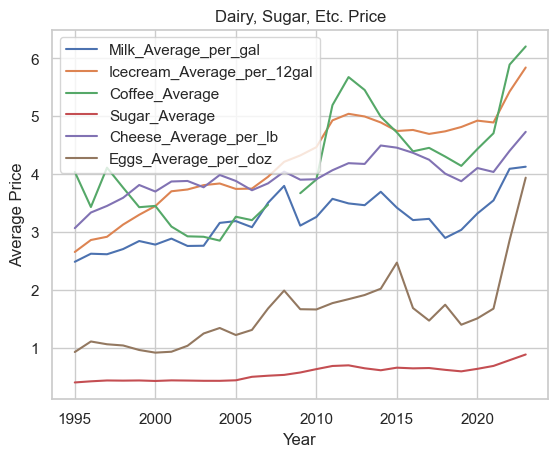

In [46]:
# Plotting the data
dairy.plot(x = 'Year', y = ['Milk_Average_per_gal', 'Icecream_Average_per_12gal', 'Coffee_Average', 'Sugar_Average', 'Cheese_Average_per_lb', 'Eggs_Average_per_doz'])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Dairy, Sugar, Etc. Price')

# Adding a legend
plt.legend()

# Displaying the graph
plt.show()

# Meat

In [47]:
bacon  =  pd.read_excel("./Downloads/CPI_AVG_PRICE_BACON.xlsx")
bacon
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
bacon  =  bacon.iloc[8:]

# Set the 10th row as the header
new_header  =  bacon.iloc[0]
bacon  =  bacon[1:]
bacon.columns  =  new_header

# Reset the index
bacon  =  bacon.reset_index(drop = True)

# Remove the number 9 from column headers
bacon  =  bacon.rename(columns = lambda x: str(x).replace("9", ""))
bacon
# Set the 'Year' column as the index
bacon.set_index('Year', inplace = True)

# Calculate the average value for each year
bacon_avg  =  bacon.mean(axis = 1).to_frame()

# Reset the index to make the year a column
bacon_avg.reset_index(inplace = True)

# Rename the columns
bacon_avg.columns  =  ['Year', 'Bacon_Average']

# Display the new DataFrame
print(bacon_avg)

    Year Bacon_Average
0   1990      2.124833
1   1991       2.21975
2   1992       1.91525
3   1993         1.931
4   1994      1.989583
5   1995      1.985667
6   1996      2.472917
7   1997        2.6815
8   1998      2.543083
9   1999       2.54825
10  2000      3.030583
11  2001      3.254583
12  2002      3.236167
13  2003      3.197917
14  2004       3.37625
15  2005      3.392083
16  2006      3.443917
17  2007      3.656333
18  2008      3.660417
19  2009         3.608
20  2010      4.105167
21  2011        4.6285
22  2012      4.556333
23  2013      5.286167
24  2014      5.776167
25  2015      5.453833
26  2016       5.42075
27  2017      5.768917
28  2018      5.466167
29  2019        5.6125
30  2020      5.582167
31  2021      6.638167
32  2022      7.307333
33  2023       6.64125


In [48]:
chicken  =  pd.read_excel("./Downloads/CPI_AVG_PRICE_CHICKEN.xlsx")
chicken
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
chicken  =  chicken.iloc[8:]

# Set the 10th row as the header
new_header  =  chicken.iloc[0]
chicken  =  chicken[1:]
chicken.columns  =  new_header

# Reset the index
chicken  =  chicken.reset_index(drop = True)

# Remove the number 9 from column headers
chicken  =  chicken.rename(columns = lambda x: str(x).replace("9", ""))
chicken
# Set the 'Year' column as the index
chicken.set_index('Year', inplace = True)

# Calculate the average value for each year
chicken_avg  =  chicken.mean(axis = 1).to_frame()

# Reset the index to make the year a column
chicken_avg.reset_index(inplace = True)

# Rename the columns
chicken_avg.columns  =  ['Year', 'Chicken_Average']

# Display the new DataFrame
print(chicken_avg)

    Year Chicken_Average
0   1990        0.899167
1   1991        0.880333
2   1992        0.869333
3   1993        0.890167
4   1994        0.900917
5   1995        0.916667
6   1996        0.972667
7   1997        1.001917
8   1998        1.043667
9   1999        1.055917
10  2000        1.071167
11  2001        1.105167
12  2002        1.073917
13  2003        1.034417
14  2004        1.069583
15  2005         1.05575
16  2006        1.049333
17  2007        1.115167
18  2008        1.206917
19  2009        1.278167
20  2010        1.263167
21  2011        1.291333
22  2012        1.422167
23  2013        1.496167
24  2014         1.53325
25  2015         1.48825
26  2016        1.463667
27  2017        1.471917
28  2018        1.497083
29  2019           1.495
30  2020        1.562909
31  2021        1.526583
32  2022        1.800667
33  2023          1.8725


In [49]:
groundbeef  =  pd.read_excel("./Downloads/BLS CPI All uncooked ground beef, per lb.xlsx")
groundbeef
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
groundbeef  =  groundbeef.iloc[8:]

# Set the 10th row as the header
new_header  =  groundbeef.iloc[0]
groundbeef  =  groundbeef[1:]
groundbeef.columns  =  new_header

# Reset the index
groundbeef  =  groundbeef.reset_index(drop = True)

# Remove the number 9 from column headers
groundbeef  =  groundbeef.rename(columns = lambda x: str(x).replace("9", ""))
groundbeef
# Set the 'Year' column as the index
groundbeef.set_index('Year', inplace = True)

# Calculate the average value for each year
groundbeef_avg  =  groundbeef.mean(axis = 1).to_frame()

# Reset the index to make the year a column
groundbeef_avg.reset_index(inplace = True)

# Rename the columns
groundbeef_avg.columns  =  ['Year', 'Groundbeef_Average']

# Display the new DataFrame
print(groundbeef_avg)

    Year Groundbeef_Average
0   1998           1.837333
1   1999           1.890833
2   2000           2.010167
3   2001           2.193167
4   2002           2.288667
5   2003           2.452083
6   2004               2.68
7   2005           2.736583
8   2006             2.7165
9   2007             2.8455
10  2008           3.040333
11  2009           3.101083
12  2010           3.177667
13  2011           3.455583
14  2012              3.717
15  2013           3.822583
16  2014           4.298833
17  2015           4.628083
18  2016             4.2525
19  2017            4.11875
20  2018           4.117167
21  2019           4.225417
22  2020           4.625333
23  2021           4.875667
24  2022           5.313583
25  2023             5.2348


In [50]:
beefroast  =  pd.read_excel("./Downloads/BLS CPI All Uncooked Beef Roasts, per lb.xlsx")
beefroast
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
beefroast  =  beefroast.iloc[8:]

# Set the 10th row as the header
new_header  =  beefroast.iloc[0]
beefroast  =  beefroast[1:]
beefroast.columns  =  new_header

# Reset the index
beefroast  =  beefroast.reset_index(drop = True)

# Remove the number 9 from column headers
beefroast  =  beefroast.rename(columns = lambda x: str(x).replace("9", ""))
beefroast
# Set the 'Year' column as the index
beefroast.set_index('Year', inplace = True)

# Calculate the average value for each year
beefroast_avg  =  beefroast.mean(axis = 1).to_frame()

# Reset the index to make the year a column
beefroast_avg.reset_index(inplace = True)

# Rename the columns
beefroast_avg.columns  =  ['Year', 'BeefRoast_Average']

# Display the new DataFrame
print(beefroast_avg)

    Year BeefRoast_Average
0   1998          2.657333
1   1999           2.71225
2   2000          2.878417
3   2001          3.159583
4   2002          3.136583
5   2003          3.467333
6   2004          3.802083
7   2005          3.739667
8   2006          3.640917
9   2007          3.776583
10  2008          3.936667
11  2009          3.966333
12  2010          4.081333
13  2011          4.478833
14  2012            4.6955
15  2013           4.79375
16  2014          5.451833
17  2015           5.81525
18  2016          5.456667
19  2017          5.286167
20  2018          5.312917
21  2019            5.4445
22  2020            6.0625
23  2021          6.629167
24  2022              6.82
25  2023            6.8428


In [51]:
steak  =  pd.read_excel("./Downloads/BlS CPI All Uncooked Beef Steaks, per lb.xlsx")
steak
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
steak  =  steak.iloc[8:]

# Set the 10th row as the header
new_header  =  steak.iloc[0]
steak  =  steak[1:]
steak.columns  =  new_header

# Reset the index
steak  =  steak.reset_index(drop = True)

# Remove the number 9 from column headers
steak  =  steak.rename(columns = lambda x: str(x).replace("9", ""))
steak
# Set the 'Year' column as the index
steak.set_index('Year', inplace = True)

# Calculate the average value for each year
steak_avg  =  steak.mean(axis = 1).to_frame()

# Reset the index to make the year a column
steak_avg.reset_index(inplace = True)

# Rename the columns
steak_avg.columns  =  ['Year', 'Steak_Average']

# Display the new DataFrame
print(steak_avg)

    Year Steak_Average
0   1998      3.663167
1   1999      3.763417
2   2000          4.01
3   2001      4.394417
4   2002      4.407917
5   2003      4.834167
6   2004      5.360333
7   2005      5.139417
8   2006      5.067417
9   2007      5.284833
10  2008       5.40675
11  2009       5.31975
12  2010      5.500417
13  2011       5.90925
14  2012         6.244
15  2013      6.354833
16  2014      7.057417
17  2015      7.752417
18  2016         7.519
19  2017      7.341083
20  2018       7.60025
21  2019      7.675333
22  2020      8.230083
23  2021       9.33675
24  2022      9.677833
25  2023        9.8504


In [52]:
ham  =  pd.read_excel("./Downloads/BLS CPI All Ham.xlsx")
ham
#CPI Average Price Data, U.S. city average
# CLean 
# Drop the first 8 rows
ham  =  ham.iloc[8:]

# Set the 10th row as the header
new_header  =  ham.iloc[0]
ham  =  ham[1:]
ham.columns  =  new_header

# Reset the index
ham  =  ham.reset_index(drop = True)

# Remove the number 9 from column headers
ham  =  ham.rename(columns = lambda x: str(x).replace("9", ""))
ham
# Set the 'Year' column as the index
ham.set_index('Year', inplace = True)

# Calculate the average value for each year
ham_avg  =  ham.mean(axis = 1).to_frame()

# Reset the index to make the year a column
ham_avg.reset_index(inplace = True)

# Rename the columns
ham_avg.columns  =  ['Year', 'Ham_Average']

# Display the new DataFrame
print(ham_avg)

    Year Ham_Average
0   1998     2.07275
1   1999     2.05575
2   2000      2.1395
3   2001    2.219333
4   2002     2.24925
5   2003     2.15825
6   2004    2.111833
7   2005    2.308417
8   2006     2.30625
9   2007    2.297583
10  2008    2.322917
11  2009     2.35075
12  2010    2.379083
13  2011    2.526583
14  2012    2.669083
15  2013      2.7955
16  2014    3.097667
17  2015    3.081083
18  2016    3.002917
19  2017    3.000833
20  2018    3.044333
21  2019    3.146833
22  2020    3.282833
23  2021       3.697
24  2022     4.11525
25  2023      4.3228


In [53]:
meat = bacon_avg.merge(ham_avg,on = 'Year',how = 'left')
meat = meat.merge(chicken_avg, on = 'Year',how = 'left')
meat = meat.merge(steak_avg, on = 'Year',how = 'left')
meat = meat.merge(groundbeef_avg, on = 'Year',how = 'left')
meat = meat.merge(beefroast_avg, on = 'Year',how = 'left')
meat

Year Bacon_Average Ham_Average Chicken_Average Steak_Average   
0   1990      2.124833         NaN        0.899167           NaN  \
1   1991       2.21975         NaN        0.880333           NaN   
2   1992       1.91525         NaN        0.869333           NaN   
3   1993         1.931         NaN        0.890167           NaN   
4   1994      1.989583         NaN        0.900917           NaN   
5   1995      1.985667         NaN        0.916667           NaN   
6   1996      2.472917         NaN        0.972667           NaN   
7   1997        2.6815         NaN        1.001917           NaN   
8   1998      2.543083     2.07275        1.043667      3.663167   
9   1999       2.54825     2.05575        1.055917      3.763417   
10  2000      3.030583      2.1395        1.071167          4.01   
11  2001      3.254583    2.219333        1.105167      4.394417   
12  2002      3.236167     2.24925        1.073917      4.407917   
13  2003      3.197917     2.15825        1.034417      4.834167   
14  2004       3.37625    2.111833        1.069583      5.360333   
15  2005      3.392083    2.308417         1.05575      5.139417   
16  2006      3.443917     2.30625        1.049333      5.067417   
17  2007      3.656333    2.297583        1.115167      5.284833   
18  2008      3.660417    2.322917        1.206917       5.40675   
19  2009         3.608     2.35075        1.278167       5.31975   
20  2010      4.105167    2.379083        1.263167      5.500417   
21  2011        4.6285    2.526583        1.291333       5.90925   
22  2012      4.556333    2.669083        1.422167         6.244   
23  2013      5.286167      2.7955        1.496167      6.354833   
24  2014      5.776167    3.097667         1.53325      7.057417   
25  2015      5.453833    3.081083         1.48825      7.752417   
26  2016       5.42075    3.002917        1.463667         7.519   
27  2017      5.768917    3.000833        1.471917      7.341083   
28  2018      5.466167    3.044333        1.497083       7.60025   
29  2019        5.6125    3.146833           1.495      7.675333   
30  2020      5.582167    3.282833        1.562909      8.230083   
31  2021      6.638167       3.697        1.526583       9.33675   
32  2022      7.307333     4.11525        1.800667      9.677833   
33  2023       6.64125      4.3228          1.8725        9.8504   

   Groundbeef_Average BeefRoast_Average  
0                 NaN               NaN  
1                 NaN               NaN  
2                 NaN               NaN  
3                 NaN               NaN  
4                 NaN               NaN  
5                 NaN               NaN  
6                 NaN               NaN  
7                 NaN               NaN  
8            1.837333          2.657333  
9            1.890833           2.71225  
10           2.010167          2.878417  
11           2.193167          3.159583  
12           2.288667          3.136583  
13           2.452083          3.467333  
14               2.68          3.802083  
15           2.736583          3.739667  
16             2.7165          3.640917  
17             2.8455          3.776583  
18           3.040333          3.936667  
19           3.101083          3.966333  
20           3.177667          4.081333  
21           3.455583          4.478833  
22              3.717            4.6955  
23           3.822583           4.79375  
24           4.298833          5.451833  
25           4.628083           5.81525  
26             4.2525          5.456667  
27            4.11875          5.286167  
28           4.117167          5.312917  
29           4.225417            5.4445  
30           4.625333            6.0625  
31           4.875667          6.629167  
32           5.313583              6.82  
33             5.2348            6.8428

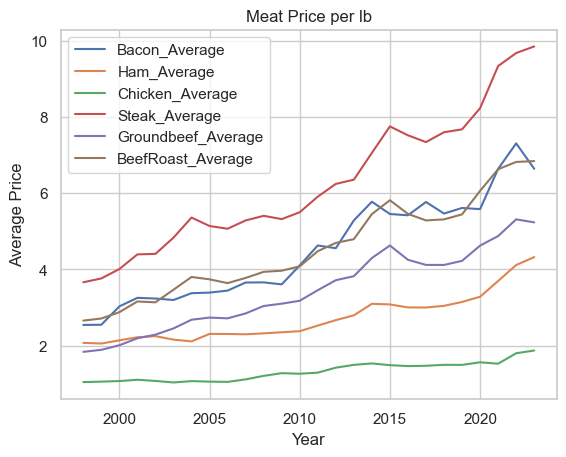

In [54]:
meat = meat.dropna()
# Plotting the data
meat.plot(x = 'Year', y = ['Bacon_Average', 'Ham_Average', 'Chicken_Average', 'Steak_Average', 'Groundbeef_Average', 'BeefRoast_Average'])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Meat Price per lb')

# Adding a legend
plt.legend()

# Displaying the graph
plt.show()

In [55]:
import pandas as pd
IR  =  pd.read_excel("./Downloads/us_inflation_rate_bls.xlsx")
# Prepare the Data
IR  =  IR.set_index("Year")
IR  =  IR.iloc[:, :-1]  # Exclude the "Avg" column

# Generate range of years
start_year  =  IR.index.min()
end_year  =  IR.index.max()
years  =  pd.date_range(start = f"{start_year}-01-01", end = f"{end_year}-12-31", freq = "Y")


# Calculate Average Inflation Rate per year
IR["AvgInflation"]  =  IR.mean(axis = 1)
IR

Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  AvgInflation
Year                                                                          
1990  5.2  5.3  5.2  4.7  4.4  4.7  4.8  5.6  6.2  6.3  6.3  6.1      5.400000
1991  5.7  5.3  4.9  4.9  5.0  4.7  4.4  3.8  3.4  2.9  3.0  3.1      4.258333
1992  2.6  2.8  3.2  3.2  3.0  3.1  3.2  3.1  3.0  3.2  3.0  2.9      3.025000
1993  3.3  3.2  3.1  3.2  3.2  3.0  2.8  2.8  2.7  2.8  2.7  2.7      2.958333
1994  2.5  2.5  2.5  2.4  2.3  2.5  2.8  2.9  3.0  2.6  2.7  2.7      2.616667
1995  2.8  2.9  2.9  3.1  3.2  3.0  2.8  2.6  2.5  2.8  2.6  2.5      2.808333
1996  2.7  2.7  2.8  2.9  2.9  2.8  3.0  2.9  3.0  3.0  3.3  3.3      2.941667
1997  3.0  3.0  2.8  2.5  2.2  2.3  2.2  2.2  2.2  2.1  1.8  1.7      2.333333
1998  1.6  1.4  1.4  1.4  1.7  1.7  1.7  1.6  1.5  1.5  1.5  1.6      1.550000
1999  1.7  1.6  1.7  2.3  2.1  2.0  2.1  2.3  2.6  2.6  2.6  2.7      2.191667
2000  2.7  3.2  3.8  3.1  3.2  3.7  3.7  3.4  3.5  3.4  3.4  3.4      3.375000
2001  3.7  3.5  2.9  3.3  3.6  3.2  2.7  2.7  2.6  2.1  1.9  1.6      2.816667
2002  1.1  1.1  1.5  1.6  1.2  1.1  1.5  1.8  1.5  2.0  2.2  2.4      1.583333
2003  2.6  3.0  3.0  2.2  2.1  2.1  2.1  2.2  2.3  2.0  1.8  1.9      2.275000
2004  1.9  1.7  1.7  2.3  3.1  3.3  3.0  2.7  2.5  3.2  3.5  3.3      2.683333
2005  3.0  3.0  3.1  3.5  2.8  2.5  3.2  3.6  4.7  4.3  3.5  3.4      3.383333
2006  4.0  3.6  3.4  3.5  4.2  4.3  4.1  3.8  2.1  1.3  2.0  2.5      3.233333
2007  2.1  2.4  2.8  2.6  2.7  2.7  2.4  2.0  2.8  3.5  4.3  4.1      2.866667
2008  4.3  4.0  4.0  3.9  4.2  5.0  5.6  5.4  4.9  3.7  1.1  0.1      3.850000
2009  0.0  0.2 -0.4 -0.7 -1.3 -1.4 -2.1 -1.5 -1.3 -0.2  1.8  2.7     -0.350000
2010  2.6  2.1  2.3  2.2  2.0  1.1  1.2  1.1  1.1  1.2  1.1  1.5      1.625000
2011  1.6  2.1  2.7  3.2  3.6  3.6  3.6  3.8  3.9  3.5  3.4  3.0      3.166667
2012  2.9  2.9  2.7  2.3  1.7  1.7  1.4  1.7  2.0  2.2  1.8  1.7      2.083333
2013  1.6  2.0  1.5  1.1  1.4  1.8  2.0  1.5  1.2  1.0  1.2  1.5      1.483333
2014  1.6  1.1  1.5  2.0  2.1  2.1  2.0  1.7  1.7  1.7  1.3  0.8      1.633333
2015 -0.1  0.0 -0.1 -0.2  0.0  0.1  0.2  0.2  0.0  0.2  0.5  0.7      0.125000
2016  1.4  1.0  0.9  1.1  1.0  1.0  0.8  1.1  1.5  1.6  1.7  2.1      1.266667
2017  2.5  2.7  2.4  2.2  1.9  1.6  1.7  1.9  2.2  2.0  2.2  2.1      2.116667
2018  2.1  2.2  2.4  2.5  2.8  2.9  2.9  2.7  2.3  2.5  2.2  1.9      2.450000
2019  1.6  1.5  1.9  2.0  1.8  1.6  1.8  1.7  1.7  1.8  2.1  2.3      1.816667
2020  2.5  2.3  1.5  0.3  0.1  0.6  1.0  1.3  1.4  1.2  1.2  1.4      1.233333
2021  1.4  1.7  2.6  4.2  5.0  5.4  5.4  5.3  5.4  6.2  6.8  7.0      4.700000
2022  7.5  7.9  8.5  8.3  8.6  9.1  8.5  8.3  8.2  7.7  7.1  6.5      8.016667
2023  6.4  6.0  5.0  4.9  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      5.575000

In [56]:
IR_avg  =  pd.DataFrame({"Year": years, "AvgInflation": IR["AvgInflation"]})

# Reset the index of the DataFrame
IR_avg  =  IR_avg.reset_index(drop = True)
#clean
IR_avg["Year"]  =  IR_avg["Year"].astype(str).str[:4].astype(int)
IR_avg

Year  AvgInflation
0   1990      5.400000
1   1991      4.258333
2   1992      3.025000
3   1993      2.958333
4   1994      2.616667
5   1995      2.808333
6   1996      2.941667
7   1997      2.333333
8   1998      1.550000
9   1999      2.191667
10  2000      3.375000
11  2001      2.816667
12  2002      1.583333
13  2003      2.275000
14  2004      2.683333
15  2005      3.383333
16  2006      3.233333
17  2007      2.866667
18  2008      3.850000
19  2009     -0.350000
20  2010      1.625000
21  2011      3.166667
22  2012      2.083333
23  2013      1.483333
24  2014      1.633333
25  2015      0.125000
26  2016      1.266667
27  2017      2.116667
28  2018      2.450000
29  2019      1.816667
30  2020      1.233333
31  2021      4.700000
32  2022      8.016667
33  2023      5.575000

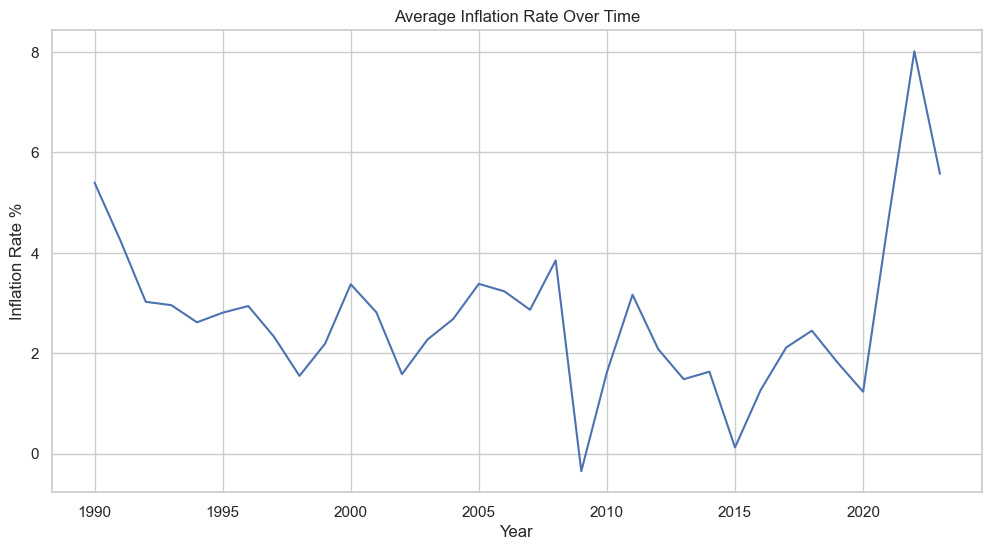

In [57]:
mlp.figure(figsize = (12, 6))
mlp.plot(IR.index, IR["AvgInflation"])
mlp.xlabel("Year")
mlp.ylabel("Inflation Rate %")
mlp.title("Average Inflation Rate Over Time")
mlp.grid(True)
mlp.show()

In [58]:
df8  =  pd.read_excel("./Downloads/CPI_AVG_PRICE_GAS_AL TYPES.xlsx")
df8
#CPI Average Price Data, U.S. city average

CPI Average Price Data, U.S. city average (AP)   
0                             Original Data Value  \
1                                             NaN   
2                                      Series Id:   
3                                   Series Title:   
4                                           Area:   
5                                           Item:   
6                                          Years:   
7                                             NaN   
8                                            Year   
9                                            1990   
10                                           1991   
11                                           1992   
12                                           1993   
13                                           1994   
14                                           1995   
15                                           1996   
16                                           1997   
17                                           1998   
18                                           1999   
19                                           2000   
20                                           2001   
21                                           2002   
22                                           2003   
23                                           2004   
24                                           2005   
25                                           2006   
26                                           2007   
27                                           2008   
28                                           2009   
29                                           2010   
30                                           2011   
31                                           2012   
32                                           2013   
33                                           2014   
34                                           2015   
35                                           2016   
36                                           2017   
37                                           2018   
38                                           2019   
39                                           2020   
40                                           2021   
41                                           2022   
42                                           2023   

                                           Unnamed: 1 Unnamed: 2 Unnamed: 3   
0                                                 NaN        NaN        NaN  \
1                                                 NaN        NaN        NaN   
2                                        APU00007471A        NaN        NaN   
3   Gasoline, all types, per gallon/3.785 liters i...        NaN        NaN   
4                                   U.S. city average        NaN        NaN   
5        Gasoline, all types, per gallon/3.785 liters        NaN        NaN   
6                                        1990 to 2023        NaN        NaN   
7                                                 NaN        NaN        NaN   
8                                                 Jan        Feb        Mar   
9                                                1.09      1.086      1.076   
10                                              1.304      1.198      1.138   
11                                              1.135      1.117      1.122   
12                                              1.182      1.172      1.163   
13                                              1.109      1.114      1.109   
14                                               1.19      1.181      1.173   
15                                              1.186      1.181      1.219   
16                                              1.318      1.312      1.293   
17                                              1.186      1.137      1.097   
18                                              1.031      1.014      1.048   
19                                              1.356      1.422      1.594   
20         

In [59]:
# CLean 
# Drop the first 8 rows
df8  =  df8.iloc[8:]

# Set the 10th row as the header
new_header  =  df8.iloc[0]
df8  =  df8[1:]
df8.columns  =  new_header

# Reset the index
df8  =  df8.reset_index(drop = True)

# Remove the number 9 from column headers
df8  =  df8.rename(columns = lambda x: str(x).replace("9", ""))
df8

8   Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep   
0   1990   1.09  1.086  1.076  1.096  1.114   1.14  1.139  1.246  1.347  \
1   1991  1.304  1.198  1.138  1.159  1.209  1.214  1.185  1.196  1.199   
2   1992  1.135  1.117  1.122  1.143  1.197  1.239  1.237  1.221  1.222   
3   1993  1.182  1.172  1.163  1.175  1.193  1.194  1.174  1.163  1.151   
4   1994  1.109  1.114  1.109  1.128  1.143  1.169  1.199  1.243  1.237   
5   1995   1.19  1.181  1.173  1.197  1.256  1.281  1.252  1.222  1.206   
6   1996  1.186  1.181  1.219  1.305  1.378  1.354  1.328  1.298  1.293   
7   1997  1.318  1.312  1.293  1.288  1.284  1.286  1.263   1.31  1.334   
8   1998  1.186  1.137  1.097  1.106  1.146  1.148  1.134  1.108  1.091   
9   1999  1.031  1.014  1.048  1.232  1.233  1.204  1.244  1.309  1.334   
10  2000  1.356  1.422  1.594  1.561  1.552  1.666  1.642  1.559  1.635   
11  2001  1.525  1.538  1.503  1.617  1.812  1.731  1.565  1.509  1.609   
12  2002  1.209   1.21  1.324  1.493  1.508  1.489  1.496  1.508  1.507   
13  2003  1.557  1.686  1.791  1.704  1.587  1.558  1.567  1.671  1.771   
14  2004  1.635  1.715  1.809  1.875   2.05  2.083  1.982  1.941  1.934   
15  2005  1.866   1.96  2.107  2.325  2.257  2.218  2.357  2.548  2.969   
16  2006  2.359  2.354  2.444  2.801  2.993  2.963  3.046  3.033  2.637   
17  2007  2.321  2.333  2.639  2.909  3.176    3.1  3.013  2.833  2.839   
18  2008  3.096  3.083  3.307  3.491  3.813  4.115  4.142  3.838  3.749   
19  2009  1.838  1.979      2  2.107  2.314  2.681  2.594  2.677  2.626   
20  2010  2.779  2.709  2.829  2.906  2.915  2.783  2.783  2.795  2.754   
21  2011  3.139  3.215  3.594  3.863  3.982  3.753  3.703   3.68  3.664   
22  2012  3.447  3.622  3.918  3.976  3.839  3.602  3.502  3.759  3.908   
23  2013  3.407  3.748  3.792  3.647  3.682  3.693  3.687  3.658  3.616   
24  2014  3.378  3.422   3.59  3.717  3.745   3.75   3.69   3.54  3.463   
25  2015   2.17  2.308  2.544  2.545  2.832  2.889  2.893  2.745  2.463   
26  2016  2.034  1.833  2.021  2.196  2.324  2.422  2.287  2.218  2.269   
27  2017  2.409   2.36  2.386  2.479  2.448    2.4  2.344  2.436  2.688   
28  2018  2.596  2.632  2.631  2.795  2.963   2.97   2.93  2.919   2.93   
29  2019  2.352  2.412   2.62  2.894  2.963  2.814  2.836  2.716  2.694   
30  2020  2.631   2.53  2.334  1.946  1.946  2.141  2.243  2.245   2.26   
31  2021  2.391  2.559  2.856  2.907  3.041  3.245  3.326  3.351  3.361   
32  2022    3.5  3.675  4.401  4.369  4.695  5.149  4.768  4.205   3.99   
33  2023  3.555  3.622   3.66  3.839    NaN    NaN    NaN    NaN    NaN   

8     Oct    Nov    Dec  
0   1.431  1.432   1.41  
1    1.18  1.193  1.182  
2   1.219  1.223  1.201  
3   1.193  1.178  1.136  
4   1.212  1.222  1.203  
5   1.185  1.161   1.16  
6   1.287  1.308  1.318  
7     1.3  1.271  1.236  
8   1.099  1.086  1.046  
9   1.329  1.319  1.353  
10  1.613  1.608  1.544  
11  1.442  1.324    1.2  
12  1.535  1.534  1.477  
13  1.646  1.578  1.538  
14  2.072  2.053  1.926  
15   2.83  2.387   2.23  
16  2.319  2.287   2.38  
17  2.843  3.118  3.069  
18  3.225  2.208  1.742  
19  2.613  2.709  2.671  
20  2.843  2.899  3.031  
21  3.521  3.475  3.329  
22  3.839  3.542  3.386  
23  3.434   3.31  3.333  
24  3.241  2.945  2.618  
25  2.357  2.249  2.125  
26  2.304  2.246  2.289  
27  2.545  2.608  2.521  
28  2.945  2.733  2.479  
29  2.741  2.687  2.652  
30  2.228  2.159  2.235  
31  3.477  3.576  3.505  
32   4.13  3.958  3.459  
33    NaN    NaN    NaN

In [60]:
# Set the 'Year' column as the index
df8.set_index('Year', inplace = True)

# Calculate the average value for each year
df8_avg  =  df8.mean(axis = 1).to_frame()

# Reset the index to make the year a column
df8_avg.reset_index(inplace = True)

# Rename the columns
df8_avg.columns  =  ['Year', 'All_Gas_Types_Average']

# Display the new DataFrame
print(df8_avg)

    Year All_Gas_Types_Average
0   1990               1.21725
1   1991              1.196417
2   1992              1.189667
3   1993              1.172833
4   1994                 1.174
5   1995              1.205333
6   1996              1.287917
7   1997               1.29125
8   1998              1.115333
9   1999              1.220833
10  2000              1.562667
11  2001               1.53125
12  2002              1.440833
13  2003              1.637833
14  2004              1.922917
15  2005              2.337833
16  2006              2.634667
17  2007              2.849417
18  2008              3.317417
19  2009               2.40075
20  2010                2.8355
21  2011                3.5765
22  2012                 3.695
23  2013              3.583917
24  2014              3.424917
25  2015                  2.51
26  2016              2.203583
27  2017              2.468667
28  2018              2.793583
29  2019              2.698417
30  2020                2.2415
31  2021

In [61]:
df9  =  pd.read_excel("./Downloads/CPI_AVG_PRICE_ELECTRIC.xlsx")
df9
#CPI Average Price Data, U.S. city average

CPI Average Price Data, U.S. city average (AP)   
0                             Original Data Value  \
1                                             NaN   
2                                      Series Id:   
3                                   Series Title:   
4                                           Area:   
5                                           Item:   
6                                          Years:   
7                                             NaN   
8                                            Year   
9                                            1990   
10                                           1991   
11                                           1992   
12                                           1993   
13                                           1994   
14                                           1995   
15                                           1996   
16                                           1997   
17                                           1998   
18                                           1999   
19                                           2000   
20                                           2001   
21                                           2002   
22                                           2003   
23                                           2004   
24                                           2005   
25                                           2006   
26                                           2007   
27                                           2008   
28                                           2009   
29                                           2010   
30                                           2011   
31                                           2012   
32                                           2013   
33                                           2014   
34                                           2015   
35                                           2016   
36                                           2017   
37                                           2018   
38                                           2019   
39                                           2020   
40                                           2021   
41                                           2022   
42                                           2023   

                                           Unnamed: 1 Unnamed: 2 Unnamed: 3   
0                                                 NaN        NaN        NaN  \
1                                                 NaN        NaN        NaN   
2                                        APU000072610        NaN        NaN   
3   Electricity per KWH in U.S. city average, aver...        NaN        NaN   
4                                   U.S. city average        NaN        NaN   
5                                 Electricity per KWH        NaN        NaN   
6                                        1990 to 2023        NaN        NaN   
7                                                 NaN        NaN        NaN   
8                                                 Jan        Feb        Mar   
9                                               0.081      0.081      0.081   
10                                              0.084      0.084      0.085   
11                                              0.085      0.084      0.086   
12                                              0.089      0.087      0.088   
13                                               0.09       0.09      0.089   
14                                              0.091      0.091      0.091   
15                                              0.091      0.091      0.092   
16                                              0.092      0.092      0.093   
17                                              0.086      0.085      0.085   
18                                              0.084      0.084      0.084   
19                                              0.084      0.085      0.085   
20         

In [62]:
# CLean 
# Drop the first 8 rows
df9  =  df9.iloc[8:]

# Set the 10th row as the header
new_header  =  df9.iloc[0]
df9  =  df9[1:]
df9.columns  =  new_header

# Reset the index
df9  =  df9.reset_index(drop = True)

# Remove the number 9 from column headers
df9  =  df9.rename(columns = lambda x: str(x).replace("9", ""))
df9

8   Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep   
0   1990  0.081  0.081  0.081  0.082  0.082  0.088  0.087  0.087  0.088  \
1   1991  0.084  0.084  0.085  0.084  0.085   0.09  0.091   0.09  0.091   
2   1992  0.085  0.084  0.086  0.086  0.087  0.092  0.092  0.091  0.092   
3   1993  0.089  0.087  0.088  0.088   0.09  0.094  0.095  0.097  0.097   
4   1994   0.09   0.09  0.089  0.088   0.09  0.095  0.095  0.096  0.096   
5   1995  0.091  0.091  0.091   0.09  0.092  0.098  0.098  0.098  0.097   
6   1996  0.091  0.091  0.092  0.092  0.092  0.096  0.099  0.099  0.099   
7   1997  0.092  0.092  0.093  0.092  0.093  0.099  0.099  0.098  0.099   
8   1998  0.086  0.085  0.085  0.085  0.086  0.091  0.091   0.09  0.089   
9   1999  0.084  0.084  0.084  0.084  0.085  0.089   0.09  0.089   0.09   
10  2000  0.084  0.085  0.085  0.085  0.085   0.09  0.091  0.091  0.091   
11  2001  0.088  0.088  0.089  0.089   0.09  0.097  0.099  0.098  0.097   
12  2002  0.089  0.089  0.089  0.088  0.089  0.095  0.095  0.095  0.095   
13  2003  0.089  0.089  0.089  0.091  0.092  0.097  0.098  0.098  0.098   
14  2004  0.091  0.091  0.091  0.091  0.093  0.099  0.099    0.1  0.099   
15  2005  0.094  0.094  0.094  0.095  0.097  0.104  0.105  0.105  0.106   
16  2006  0.108  0.108  0.109  0.109   0.11  0.118  0.118  0.118  0.118   
17  2007  0.113  0.113  0.113  0.113  0.115  0.122  0.122  0.121  0.121   
18  2008  0.116  0.116  0.116  0.118   0.12  0.128  0.131  0.132   0.13   
19  2009  0.126  0.126  0.126  0.125  0.126  0.132  0.131   0.13   0.13   
20  2010  0.124  0.123  0.125  0.126  0.127  0.132  0.133  0.133  0.132   
21  2011  0.125  0.125  0.127  0.127  0.129  0.134  0.135  0.135  0.135   
22  2012  0.128  0.128  0.127  0.127  0.129  0.135  0.133  0.133  0.133   
23  2013  0.129  0.129  0.128  0.128  0.131  0.137  0.137  0.137  0.137   
24  2014  0.134  0.134  0.135  0.131  0.136  0.143  0.143  0.143  0.141   
25  2015  0.138  0.138  0.136  0.137  0.137  0.143  0.142  0.142  0.141   
26  2016  0.134  0.134  0.134  0.134  0.133  0.138  0.139  0.139  0.139   
27  2017  0.134  0.135  0.134  0.135  0.137  0.142  0.143  0.142  0.142   
28  2018  0.135  0.135  0.135  0.134  0.136  0.139  0.139  0.139  0.138   
29  2019  0.135  0.136  0.135  0.135  0.136  0.139   0.14  0.139  0.139   
30  2020  0.134  0.134  0.134  0.133  0.134  0.137  0.137  0.137  0.137   
31  2021  0.136  0.137  0.138  0.139   0.14  0.142  0.143  0.144  0.144   
32  2022  0.147  0.148   0.15  0.151  0.154   0.16  0.164  0.167  0.167   
33  2023  0.168  0.168  0.166  0.165    NaN    NaN    NaN    NaN    NaN   

8     Oct    Nov    Dec  
0   0.083  0.082  0.082  
1   0.087  0.084  0.085  
2   0.088  0.086  0.088  
3   0.093  0.091   0.09  
4   0.093  0.091  0.091  
5   0.094  0.092  0.091  
6   0.095  0.092  0.092  
7   0.093  0.092   0.09  
8   0.086  0.084  0.084  
9   0.087  0.085  0.085  
10  0.088  0.086  0.086  
11  0.093   0.09   0.09  
12  0.091  0.089  0.089  
13  0.093   0.09   0.09  
14  0.094  0.092  0.092  
15  0.102  0.102  0.102  
16  0.112   0.11   0.11  
17  0.117  0.115  0.115  
18  0.126  0.123  0.124  
19  0.126  0.124  0.124  
20  0.127  0.125  0.125  
21   0.13  0.128  0.127  
22  0.128  0.127  0.127  
23  0.132   0.13  0.131  
24  0.136  0.134  0.135  
25  0.136  0.134  0.133  
26  0.134  0.131  0.133  
27  0.137  0.136  0.136  
28  0.136  0.134  0.135  
29  0.136  0.133  0.133  
30  0.135  0.136  0.136  
31  0.142  0.142  0.142  
32  0.166  0.163  0.165  
33    NaN    NaN    NaN

In [63]:
# Set the 'Year' column as the index
df9.set_index('Year', inplace = True)

# Calculate the average value for each year
df9_avg  =  df9.mean(axis = 1).to_frame()

# Reset the index to make the year a column
df9_avg.reset_index(inplace = True)

# Rename the columns
df9_avg.columns  =  ['Year', 'Electric_Average']

# Display the new DataFrame
print(df9_avg)

    Year Electric_Average
0   1990         0.083667
1   1991         0.086667
2   1992         0.088083
3   1993         0.091583
4   1994            0.092
5   1995         0.093583
6   1996         0.094167
7   1997         0.094333
8   1998         0.086833
9   1999         0.086333
10  2000          0.08725
11  2001         0.092333
12  2002         0.091083
13  2003         0.092833
14  2004         0.094333
15  2005              0.1
16  2006         0.112333
17  2007         0.116667
18  2008         0.123333
19  2009         0.127167
20  2010         0.127667
21  2011          0.12975
22  2012         0.129583
23  2013         0.132167
24  2014         0.137083
25  2015         0.138083
26  2016         0.135167
27  2017          0.13775
28  2018          0.13625
29  2019         0.136333
30  2020         0.135333
31  2021          0.14075
32  2022           0.1585
33  2023          0.16675


In [64]:
df10  =  pd.read_excel("./Downloads/CPI_AVG_PRICE_FUEL_OIL.xlsx")
df10
#CPI Average Price Data, U.S. city average

CPI Average Price Data, U.S. city average (AP)   
0                             Original Data Value  \
1                                             NaN   
2                                      Series Id:   
3                                   Series Title:   
4                                           Area:   
5                                           Item:   
6                                          Years:   
7                                             NaN   
8                                            Year   
9                                            1990   
10                                           1991   
11                                           1992   
12                                           1993   
13                                           1994   
14                                           1995   
15                                           1996   
16                                           1997   
17                                           1998   
18                                           1999   
19                                           2000   
20                                           2001   
21                                           2002   
22                                           2003   
23                                           2004   
24                                           2005   
25                                           2006   
26                                           2007   
27                                           2008   
28                                           2009   
29                                           2010   
30                                           2011   
31                                           2012   
32                                           2013   
33                                           2014   
34                                           2015   
35                                           2016   
36                                           2017   
37                                           2018   
38                                           2019   
39                                           2020   
40                                           2021   
41                                           2022   
42                                           2023   

                                           Unnamed: 1 Unnamed: 2 Unnamed: 3   
0                                                 NaN        NaN        NaN  \
1                                                 NaN        NaN        NaN   
2                                        APU000072511        NaN        NaN   
3   Fuel oil #2 per gallon (3.785 liters) in U.S. ...        NaN        NaN   
4                                   U.S. city average        NaN        NaN   
5               Fuel oil #2 per gallon (3.785 liters)        NaN        NaN   
6                                        1990 to 2023        NaN        NaN   
7                                                 NaN        NaN        NaN   
8                                                 Jan        Feb        Mar   
9                                               1.259      1.023      0.987   
10                                              1.235       1.17      1.086   
11                                              0.985      0.975      0.961   
12                                              0.969      0.973      0.977   
13                                              0.919      0.978      0.966   
14                                              0.913      0.915      0.906   
15                                              1.007      1.001       1.02   
16                                              1.136      1.127      1.079   
17                                              0.966      0.948      0.933   
18                                              0.834      0.828      0.828   
19                                              1.189      1.614      1.359   
20         

In [65]:
# CLean 
# Drop the first 8 rows
df10  =  df10.iloc[8:]

# Set the 10th row as the header
new_header  =  df10.iloc[0]
df10  =  df10[1:]
df10.columns  =  new_header

# Reset the index
df10  =  df10.reset_index(drop = True)

# Remove the number 9 from column headers
df10  =  df10.rename(columns = lambda x: str(x).replace("9", ""))
df10

8   Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep   
0   1990  1.259  1.023  0.987  0.968  0.952  0.909   0.88  0.998  1.165  \
1   1991  1.235   1.17  1.086  1.016  0.968  0.945  0.926  0.927  0.942   
2   1992  0.985  0.975  0.961  0.951  0.952  0.954  0.947  0.943  0.945   
3   1993  0.969  0.973  0.977  0.977  0.963   0.95  0.937  0.906  0.907   
4   1994  0.919  0.978  0.966  0.935  0.919  0.906  0.898  0.894  0.894   
5   1995  0.913  0.915  0.906    0.9  0.901  0.895  0.885  0.879   0.87   
6   1996  1.007  1.001   1.02  1.065  1.038  0.969  0.935  0.934   0.98   
7   1997  1.136  1.127  1.079  1.046  1.031  1.001  0.957  0.945  0.945   
8   1998  0.966  0.948  0.933  0.915  0.903  0.874  0.853  0.838  0.827   
9   1999  0.834  0.828  0.828  0.853  0.852  0.845  0.857  0.877  0.939   
10  2000  1.189  1.614  1.359  1.286  1.263  1.249   1.25  1.246  1.407   
11  2001  1.509  1.463  1.394  1.367  1.343  1.322  1.257  1.238  1.285   
12  2002  1.123  1.112  1.119  1.158  1.163  1.136  1.127  1.135  1.174   
13  2003  1.396  1.641  1.766  1.491  1.372  1.305  1.279  1.283  1.284   
14  2004  1.508  1.558  1.541  1.519  1.533  1.537  1.536  1.607  1.671   
15  2005  1.859  1.962  2.078   2.12  2.036  2.059  2.173  2.276  2.593   
16  2006  2.418  2.423  2.429  2.526  2.572  2.566  2.597  2.649  2.531   
17  2007  2.368  2.425  2.505  2.555  2.567  2.561  2.621  2.634  2.706   
18  2008  3.337  3.338  3.699  3.875  4.185  4.589  4.649  4.217  3.952   
19  2009  2.509  2.451  2.319  2.354  2.344  2.449  2.452  2.559  2.553   
20  2010  2.967   2.89  2.908  2.981  2.913  2.828    2.8  2.814   2.83   
21  2011  3.415  3.607  3.827  3.975  3.914  3.824  3.689  3.671  3.654   
22  2012  3.697  3.804  3.909  3.858  3.749  3.513  3.492   3.66  3.817   
23  2013  3.841  3.965  3.879  3.701  3.599  3.569  3.604  3.651  3.694   
24  2014  3.904  4.072  3.952   3.83  3.815  3.779  3.753  3.705  3.642   
25  2015  2.811  2.864  3.019  2.755  2.788  2.743  2.651  2.437  2.376   
26  2016   1.97  1.923  1.947  1.989  2.097  2.155   2.13  2.073  2.122   
27  2017  2.482  2.474  2.449  2.438  2.378  2.284  2.215  2.292  2.481   
28  2018  2.902  2.856  2.827  2.875  3.132  3.132   3.22  3.229  3.279   
29  2019  2.934   3.03   3.05  3.103   3.03  2.946  2.932   2.87  2.894   
30  2020  3.052  2.812  2.405  2.044  1.905  2.057  2.134  2.161  2.123   
31  2021  2.549   2.79  2.873  2.785  2.825  2.952   2.98  2.932  2.999   
32  2022  3.776  4.058  4.928  5.143  5.973  5.863  5.256  4.953  4.815   
33  2023  4.313  3.988  3.866  3.709    NaN    NaN    NaN    NaN    NaN   

8     Oct    Nov    Dec  
0    1.33  1.305  1.273  
1   0.966   1.02  1.017  
2   0.969  0.978  0.971  
3   0.924  0.927  0.914  
4    0.89  0.894    0.9  
5   0.873  0.879  0.905  
6   1.063  1.097  1.121  
7   0.956   0.97  0.979  
8   0.834  0.841  0.827  
9   0.976  1.018  1.088  
10  1.453  1.477  1.528  
11  1.227  1.193  1.117  
12  1.203  1.221  1.267  
13  1.297  1.331   1.36  
14  1.882  1.958  1.895  
15  2.626  2.458  2.407  
16  2.396  2.375   2.46  
17  2.808  3.169  3.247  
18  3.544  3.003  2.637  
19  2.603   2.79  2.788  
20  2.936  3.044  3.193  
21  3.642  3.682  3.646  
22  3.847  3.847  3.844  
23  3.684  3.683  3.772  
24  3.515  3.384  3.138  
25   2.35  2.302  2.114  
26  2.288  2.256  2.394  
27   2.52  2.633  2.703  
28  3.381  3.286  2.951  
29  3.008  2.984  3.035  
30  2.139  2.208  2.419  
31  3.422  3.512  3.443  
32  5.786   5.24  4.344  
33    NaN    NaN    NaN

In [66]:
# Set the 'Year' column as the index
df10.set_index('Year', inplace = True)

# Calculate the average value for each year
df10_avg  =  df10.mean(axis = 1).to_frame()

# Reset the index to make the year a column
df10_avg.reset_index(inplace = True)

# Rename the columns
df10_avg.columns  =  ['Year', 'Oil_Average_Price']

# Display the new DataFrame
print(df10_avg)

    Year Oil_Average_Price
0   1990          1.087417
1   1991          1.018167
2   1992          0.960917
3   1993          0.943667
4   1994          0.916083
5   1995          0.893417
6   1996          1.019167
7   1997          1.014333
8   1998          0.879917
9   1999          0.899583
10  2000          1.360083
11  2001          1.309583
12  2002            1.1615
13  2003          1.400417
14  2004          1.645417
15  2005          2.220583
16  2006          2.495167
17  2007            2.6805
18  2008          3.752083
19  2009           2.51425
20  2010          2.925333
21  2011          3.712167
22  2012          3.753083
23  2013          3.720167
24  2014          3.707417
25  2015          2.600833
26  2016             2.112
27  2017           2.44575
28  2018          3.089167
29  2019          2.984667
30  2020           2.28825
31  2021          3.005167
32  2022           5.01125
33  2023             3.969


In [67]:
import pandas as pd

# Perform left join on column 'Year'
df_merged  =  df8_avg.merge(df10_avg, on = 'Year', how = 'left')
df_merged  =  df_merged.merge(df9_avg, on = 'Year', how = 'left')
df_merged

Year All_Gas_Types_Average Oil_Average_Price Electric_Average
0   1990               1.21725          1.087417         0.083667
1   1991              1.196417          1.018167         0.086667
2   1992              1.189667          0.960917         0.088083
3   1993              1.172833          0.943667         0.091583
4   1994                 1.174          0.916083            0.092
5   1995              1.205333          0.893417         0.093583
6   1996              1.287917          1.019167         0.094167
7   1997               1.29125          1.014333         0.094333
8   1998              1.115333          0.879917         0.086833
9   1999              1.220833          0.899583         0.086333
10  2000              1.562667          1.360083          0.08725
11  2001               1.53125          1.309583         0.092333
12  2002              1.440833            1.1615         0.091083
13  2003              1.637833          1.400417         0.092833
14  2004              1.922917          1.645417         0.094333
15  2005              2.337833          2.220583              0.1
16  2006              2.634667          2.495167         0.112333
17  2007              2.849417            2.6805         0.116667
18  2008              3.317417          3.752083         0.123333
19  2009               2.40075           2.51425         0.127167
20  2010                2.8355          2.925333         0.127667
21  2011                3.5765          3.712167          0.12975
22  2012                 3.695          3.753083         0.129583
23  2013              3.583917          3.720167         0.132167
24  2014              3.424917          3.707417         0.137083
25  2015                  2.51          2.600833         0.138083
26  2016              2.203583             2.112         0.135167
27  2017              2.468667           2.44575          0.13775
28  2018              2.793583          3.089167          0.13625
29  2019              2.698417          2.984667         0.136333
30  2020                2.2415           2.28825         0.135333
31  2021              3.132917          3.005167          0.14075
32  2022              4.191583           5.01125           0.1585
33  2023                 3.669             3.969          0.16675

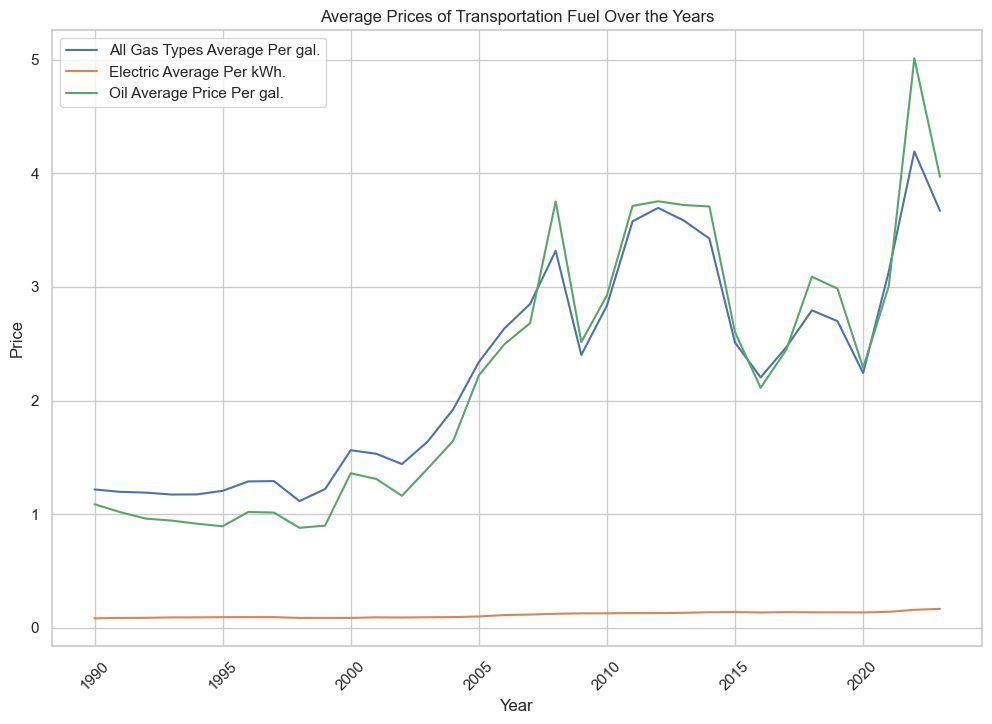

In [68]:
# Set the 'Year' column as the index
df_merged.set_index('Year', inplace = True)

# Plot the data
plt.figure(figsize = (12, 8))
plt.plot(df_merged.index, df_merged['All_Gas_Types_Average'], label = 'All Gas Types Average Per gal.')
plt.plot(df_merged.index, df_merged['Electric_Average'], label = 'Electric Average Per kWh.')
plt.plot(df_merged.index, df_merged['Oil_Average_Price'], label = 'Oil Average Price Per gal.')

# Customize the plot
plt.title('Average Prices of Transportation Fuel Over the Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation = 45)

# Show the plot
plt.show()

In [69]:
df22  =  pd.read_excel("./Downloads/US CPI for All Urban Consumer Food.xlsx")
df22
#CPI Average Price Data, U.S. city average

CPI for All Urban Consumers (CPI-U)   
0                  Original Data Value  \
1                                  NaN   
2                           Series Id:   
3              Not Seasonally Adjusted   
4                        Series Title:   
5                                Area:   
6                                Item:   
7                         Base Period:   
8                               Years:   
9                                  NaN   
10                                Year   
11                                1992   
12                                1993   
13                                1994   
14                                1995   
15                                1996   
16                                1997   
17                                1998   
18                                1999   
19                                2000   
20                                2001   
21                                2002   
22                                2003   
23                                2004   
24                                2005   
25                                2006   
26                                2007   
27                                2008   
28                                2009   
29                                2010   
30                                2011   
31                                2012   
32                                2013   
33                                2014   
34                                2015   
35                                2016   
36                                2017   
37                                2018   
38                                2019   
39                                2020   
40                                2021   
41                                2022   
42                                2023   

                                           Unnamed: 1 Unnamed: 2 Unnamed: 3   
0                                                 NaN        NaN        NaN  \
1                                                 NaN        NaN        NaN   
2                                        CUUR0000SAF1        NaN        NaN   
3                                                 NaN        NaN        NaN   
4   Food in U.S. city average, all urban consumers...        NaN        NaN   
5                                   U.S. city average        NaN        NaN   
6                                                Food        NaN        NaN   
7                                         1982-84=100        NaN        NaN   
8                                        1992 to 2023        NaN        NaN   
9                                                 NaN        NaN        NaN   
10                                                Jan        Feb        Mar   
11                                              137.2      137.5      138.1   
12                                              139.8      139.9      140.1   
13                                              143.7      142.9      143.2   
14                                              147.5      147.4      147.4   
15                                                151      150.8      151.6   
16                                              156.5      156.5      156.6   
17                                              159.9      159.4      159.7   
18                                              163.6      163.3      163.3   
19                                              166.1      166.3      166.5   
20                                              170.9      171.3      171.7   
21                                              175.8      175.9      176.1   
22                                              177.5      178.3      178.6   
23                                              183.8      184.1      184.4   
24                                              189.1      188.8      189.1   
25                                              194.1        194        194   
26                   

In [70]:
# CLean 
# Drop the first 8 rows
df22  =  df22.iloc[10:]

# Set the 10th row as the header
new_header  =  df22.iloc[0]
df22  =  df22[1:]
df22.columns  =  new_header
# Reset the index
df22  =  df22.reset_index(drop = True)
df22 = df22.drop('Annual' , axis = 1)   
df22 = df22.drop('HALF1' , axis = 1) 
df22 = df22.drop('HALF2' , axis = 1) 
df22

10  Year      Jan      Feb      Mar      Apr      May      Jun      Jul   
0   1992    137.2    137.5    138.1    138.1    137.4    137.4    137.2  \
1   1993    139.8    139.9    140.1    140.6    141.1    140.4    140.3   
2   1994    143.7    142.9    143.2    143.4    143.5    143.5    144.2   
3   1995    147.5    147.4    147.4    148.4    148.3    147.9    148.1   
4   1996      151    150.8    151.6    152.3      152    152.6    153.2   
5   1997    156.5    156.5    156.6    156.6    156.6    156.6      157   
6   1998    159.9    159.4    159.7    159.8    160.3    160.1    160.5   
7   1999    163.6    163.3    163.3    163.4    163.7    163.6    163.8   
8   2000    166.1    166.3    166.5    166.6    167.3    167.3    168.1   
9   2001    170.9    171.3    171.7    171.9    172.5      173    173.5   
10  2002    175.8    175.9    176.1    176.2    175.8    175.8      176   
11  2003    177.5    178.3    178.6    178.4    178.8    179.6    179.7   
12  2004    183.8    184.1    184.4    184.5    186.1    186.3    186.8   
13  2005    189.1    188.8    189.1    190.2    190.6    190.4    190.8   
14  2006    194.1      194      194    193.7    194.2    194.5      195   
15  2007  198.812      200  200.403   200.82  201.791  202.441  203.121   
16  2008  208.618  209.166  209.385  211.102  212.054  213.243  215.299   
17  2009  219.675  219.205    218.6  218.162  217.826   217.74  217.257   
18  2010  218.874  218.778  219.032  219.218  219.374  219.218  219.121   
19  2011  222.912  223.799   225.35   226.15  226.976   227.36  228.316   
20  2012  232.666  232.486  232.792  233.234  233.339  233.563   233.63   
21  2013  236.341  236.301  236.332  236.841  236.526  236.792  237.001   
22  2014  238.872  239.608  240.398  241.337  242.344  242.326  243.034   
23  2015  246.538   246.68  246.045  246.121  246.187   246.68  247.003   
24  2016  248.631    248.8  247.978  248.413   247.86  247.482  247.554   
25  2017  248.242  248.791  249.165  249.739  250.016  249.653  250.214   
26  2018  252.361  252.266   252.37  253.209  253.098  253.231  253.746   
27  2019  256.417  257.222  257.724  257.708   258.11  258.064  258.274   
28  2020  261.057  261.876  262.708  266.757  268.439   269.77  268.863   
29  2021  270.938  271.363  271.812   273.09  274.212  276.206  278.127   
30  2022  289.772  292.794  295.728  298.711  302.038  305.041  308.532   
31  2023  319.136  320.569  320.863  321.566      NaN      NaN      NaN   

10      Aug      Sep      Oct      Nov      Dec  
0       138    138.5    138.3    138.3    138.7  
1     140.8    141.1    141.6    141.9    142.7  
2     144.8      145      145    145.3    146.8  
3     148.4    148.9    149.4    149.4    149.9  
4     153.7    154.6    155.4    155.9    156.3  
5     157.6    157.9    158.2    158.5    158.7  
6       161    161.1      162    162.1    162.3  
7     164.2    164.6    165.1    165.2    165.4  
8     168.7    168.9    169.1    168.9      170  
9     173.9    174.1    174.9    174.6    174.7  
10      176    176.4    176.5    176.8    177.3  
11    180.4    180.7    181.7    182.4    183.6  
12    186.8    186.7    187.9    188.2    188.5  
13    190.9    191.4    192.1    192.4    192.9  
14    195.5    196.2    197.1    196.8      197  
15  203.885  204.941  205.796  206.277  206.704  
16  216.422  217.696  218.738  218.749  218.805  
17   217.35  217.218  217.526  217.265  217.637  
18  219.491  220.216  220.616  220.617  220.946  
19  229.554  230.573  231.017   230.79  231.301  
20  234.156  234.298  234.878  234.896   235.39  
21  237.406  237.522  237.871  237.641  237.869  
22  243.811   244.63  245.166  245.192  245.976  
23  247.671  248.632  249.052  248.306  247.903  
24  247.719  247.917  248.073  247.435  247.313  
25  250.493  250.993  251.364  250.871  251.238  
26  254.077  254.393  254.358  254.379   255.21  
27   258.41  258.943  259.632  259.467  259.823  
28  269.079  269.163  269.828  269.069  270.023  
29  279.135  281.506  28

In [71]:
# Find the index of the baseline year (1990)
baseline_year  =  1992
baseline_index  =  df22[df22['Year']  ==  baseline_year].index[0]

# Calculate the percentage change for each year using the baseline year
df22i  =  df22.copy()
columns  =  df22i.columns[1:]  # Exclude the 'Year' column
for column in columns:
    df22i[column]  =  ((df22i[column] - df22i.loc[baseline_index, column]) / df22i.loc[baseline_index, column]) * 100

# Display the new DataFrame
df22i


10  Year         Jan         Feb         Mar         Apr         May   
0   1992         0.0         0.0         0.0         0.0         0.0  \
1   1993    1.895044    1.745455    1.448226    1.810282    2.692868   
2   1994    4.737609    3.927273    3.692976    3.837799    4.439592   
3   1995    7.507289         7.2    6.734251    7.458364    7.933042   
4   1996   10.058309    9.672727    9.775525   10.282404    10.62591   
5   1997   14.067055   13.818182    13.39609    13.39609   13.973799   
6   1998    16.54519   15.927273    15.64084   15.713251   16.666667   
7   1999   19.241983   18.763636   18.247647   18.320058   19.141194   
8   2000    21.06414   20.945455   20.564808   20.637219   21.761281   
9   2001   24.562682   24.581818   24.330196   24.475018   25.545852   
10  2002   28.134111   27.927273   27.516293   27.588704   27.947598   
11  2003   29.373178   29.672727   29.326575   29.181752   30.131004   
12  2004   33.965015   33.890909    33.52643   33.598841   35.443959   
13  2005   37.827988   37.309091   36.929761   37.726285   38.719068   
14  2006   41.472303   41.090909   40.477915   40.260681   41.339156   
15  2007   44.906706   45.454545    45.11441   45.416365   46.863901   
16  2008   52.053936   52.120727   51.618392   52.861694   54.333333   
17  2009   60.112974   59.421818   58.291093   57.973932   58.534207   
18  2010   59.529155   59.111273    58.60391   58.738595   59.660844   
19  2011   62.472303   62.762909   63.178856   63.758146   65.193595   
20  2012   69.581633   69.080727   68.567705   68.887762     69.8246   
21  2013   72.260204   71.855273   71.131064   71.499638   72.144105   
22  2014   74.104956   74.260364   74.075308    74.75525   76.378457   
23  2015    79.69242   79.403636   78.164374   78.219406     79.1754   
24  2016    81.21793   80.945455   79.564084   79.879073   80.393013   
25  2017   80.934402   80.938909   80.423606   80.839247   81.962154   
26  2018   83.936589   83.466182   82.744388   83.351919    84.20524   
27  2019   86.892857   87.070545   86.621289   86.609703   87.852984   
28  2020   90.274781   90.455273   90.230268   93.162201   95.370451   
29  2021   97.476676   97.354909   96.822592   97.748009   99.572052   
30  2022  111.204082  112.941091  114.140478  116.300507  119.823872   
31  2023  132.606414  133.141091  132.341057  132.850109         NaN   

10         Jun         Jul         Aug         Sep         Oct         Nov   
0          0.0         0.0         0.0         0.0         0.0         0.0  \
1     2.183406    2.259475    2.028986    1.877256    2.386117    2.603037   
2     4.439592    5.102041    4.927536    4.693141    4.844541    5.061461   
3     7.641921    7.944606    7.536232    7.509025     8.02603     8.02603   
4    11.062591   11.661808   11.376812   11.624549   12.364425   12.725958   
5    13.973799   14.431487   14.202899    14.00722   14.389009   14.605929   
6    16.521106   16.982507   16.666667    16.31769   17.136659   17.208966   
7    19.068413   19.387755   18.985507   18.844765   19.378163    19.45047   
8    21.761281   22.521866   22.246377   21.949458   22.270427   22.125813   
9    25.909753   26.457726   26.014493   25.703971   26.464208   26.247289   
10   27.947598   28.279883   27.536232   27.364621   27.621114   27.838033   
11   30.713246   30.976676   30.724638   30.469314   31.381056   31.887202   
12    35.58952   36.151603   35.362319   34.801444   35.864064   36.080983   
13   38.573508   39.067055   38.333333   38.194946    38.90094    39.11786   
14   41.557496    42.12828   41.666667    41.66065   42.516269   42.299349   
15   47.336972   48.047376   47.742754   47.971841   48.804049   49.151844   
16    55.19869   56.923469   56.827536   57.181227   58.161967    58.16992   
17   58.471616   58.350583        57.5   56.836101   57.285611   57.096891   
18   59.547307   59.709184   59.051449   59.000722   59.519884   59.520607   
19   65.473071   66.411079   66.343478     66.4787   67.040492 

In [72]:
# Set the 'Year' column as the index
df22i.set_index('Year', inplace = True)

# Calculate the average value for each year
df22_avg  =  df22i.mean(axis = 1).to_frame()

# Reset the index to make the year a column
df22_avg.reset_index(inplace = True)

# Rename the columns
df22_avg.columns  =  ['Year', 'US_CPI_Food']

# Display the new DataFrame
print(df22_avg)

    Year US_CPI_Food
0   1992         0.0
1   1993    2.151173
2   1994    4.628625
3   1995    7.632648
4   1996   11.160023
5   1997   14.056764
6   1998   16.528496
7   1999   19.006648
8   2000   21.701235
9   2001   25.520692
10  2002   27.794276
11  2003    30.51745
12  2004   35.014993
13  2005   38.314748
14  2006   41.541903
15  2007    47.15336
16  2008   55.267087
17  2009   58.065572
18  2010   59.274225
19  2011   65.229375
20  2012   69.537494
21  2013   71.901999
22  2014   76.023832
23  2015   79.297167
24  2016    79.80426
25  2017   81.349476
26  2018   83.882934
27  2019   87.333281
28  2020   93.788503
29  2021  101.422944
30  2022  121.456959
31  2023  132.734668


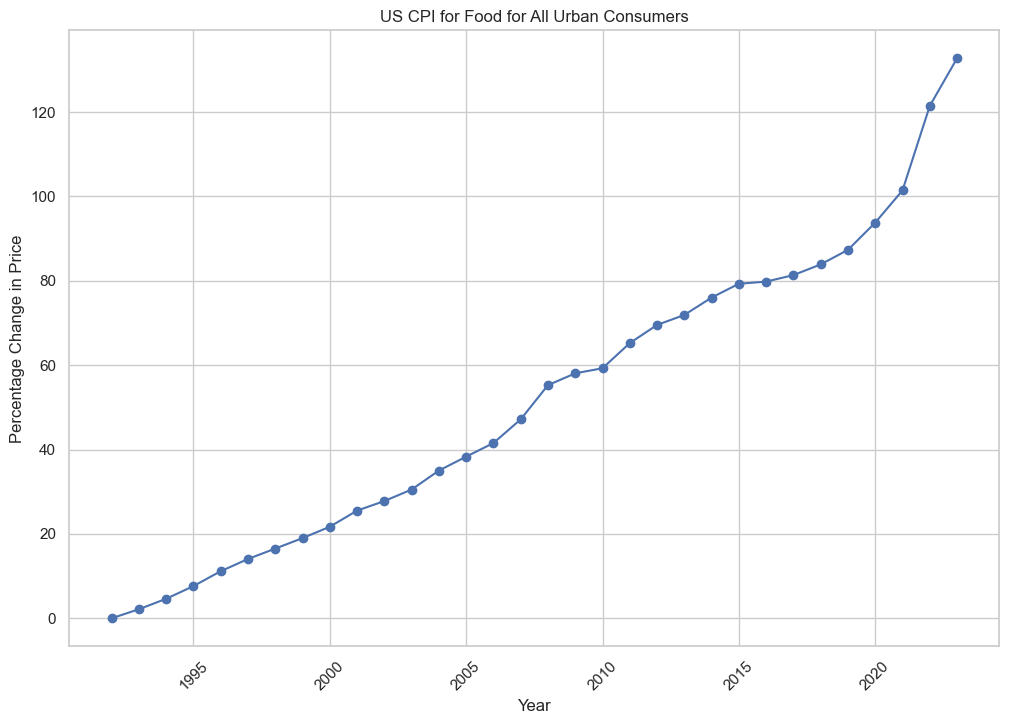

In [73]:
# Plot the average values
plt.figure(figsize = (12, 8))
plt.plot(df22_avg['Year'], df22_avg['US_CPI_Food'], marker = 'o')
plt.title('US CPI for Food for All Urban Consumers')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Price')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

In [74]:
# Find the index of the baseline year (1990)
baseline_year  =  2003
baseline_index  =  df22[df22['Year']  ==  baseline_year].index[0]

# Calculate the percentage change for each year using the baseline year
df22i20  =  df22.copy()
columns  =  df22i20.columns[1:]  # Exclude the 'Year' column
for column in columns:
    df22i20[column]  =  ((df22i20[column] - df22i20.loc[baseline_index, column]) / df22i20.loc[baseline_index, column]) * 100

# Display the new DataFrame
df22i20

10  Year        Jan        Feb        Mar        Apr        May        Jun   
0   1992 -22.704225 -22.882782 -22.676372 -22.589686 -23.154362 -23.496659  \
1   1993 -21.239437 -21.536736 -21.556551 -21.188341 -21.085011 -21.826281   
2   1994 -19.042254 -19.854178 -19.820829 -19.618834 -19.742729 -20.100223   
3   1995 -16.901408 -17.330342 -17.469205 -16.816143 -17.058166 -17.650334   
4   1996 -14.929577 -15.423444 -15.117581 -14.630045 -14.988814 -15.033408   
5   1997 -11.830986 -12.226584 -12.318029 -12.219731 -12.416107 -12.806236   
6   1998  -9.915493 -10.600112 -10.582307 -10.426009 -10.346756 -10.857461   
7   1999  -7.830986  -8.412787  -8.566629  -8.408072   -8.44519  -8.908686   
8   2000  -6.422535   -6.73023  -6.774916   -6.61435  -6.431767  -6.848552   
9   2001   -3.71831  -3.925967  -3.863382  -3.643498   -3.52349  -3.674833   
10  2002  -0.957746  -1.346046  -1.399776  -1.233184  -1.677852  -2.115813   
11  2003        0.0        0.0        0.0        0.0        0.0        0.0   
12  2004   3.549296   3.252944    3.24748   3.419283   4.082774   3.730512   
13  2005   6.535211   5.888951   5.879059    6.61435   6.599553   6.013363   
14  2006   9.352113   8.805384    8.62262   8.576233   8.612975   8.296214   
15  2007  12.006761  12.170499  12.207727  12.567265  12.858501  12.717706   
16  2008  17.531268  17.311273  17.236842  18.330717  18.598434  18.732183   
17  2009  23.760563  22.941671  22.396417  22.288117  21.826622   21.23608   
18  2010  23.309296  22.702187  22.638298  22.880045  22.692394   22.05902   
19  2011  25.584225  25.518228  26.175812  26.765695  26.944072  26.592428   
20  2012  31.079437  30.390353  30.342665  30.736547  30.502796  30.046214   
21  2013  33.149859  32.530006  32.324748  32.758408  32.285235  31.844098   
22  2014  34.575775  34.384745  34.601344  35.278587   35.53915   34.92539   
23  2015  38.894648  38.351094  37.763158  37.960202  37.688479  37.349666   
24  2016  40.073803  39.540101  38.845465  39.244955  38.624161  37.796214   
25  2017  39.854648  39.535053  39.510078  39.988229  39.829978  39.005011   
26  2018  42.175211  41.484016  41.304591  41.933296  41.553691  40.997216   
27  2019  44.460282  44.263601  44.302352  44.455157  44.356823  43.688196   
28  2020  47.074366  46.873808  47.092945  49.527466  50.133669  50.206013   
29  2021  52.641127  52.194616   52.19037  53.077354  53.362416  53.789532   
30  2022  63.251831  64.214246  65.581187  67.438901  68.925056  69.844655   
31  2023   79.79493  79.791924  79.654535      80.25        NaN        NaN   

10        Jul        Aug        Sep        Oct        Nov        Dec  
0  -23.650529 -23.503326 -23.353625 -23.885526 -24.177632 -24.455338  
1  -21.925431  -21.95122 -21.914776 -22.069345 -22.203947 -22.276688  
2  -19.755147 -19.733925 -19.756502 -20.198129 -20.339912 -20.043573  
3  -17.584864 -17.738359 -17.598229 -17.776555 -18.092105  -18.35512  
4    -14.7468 -14.800443  -14.44383 -14.474408 -14.528509 -14.869281  
5  -12.632165 -12.638581 -12.617598 -12.933407  -13.10307 -13.562092  
6  -10.684474  -10.75388 -10.846707 -10.842047 -11.129386 -11.601307  
7    -8.84808  -8.980044  -8.909795  -9.135938  -9.429825  -9.912854  
8   -6.455203  -6.485588   -6.53016  -6.934507  -7.401316  -7.407407  
9   -3.450195  -3.603104  -3.652463  -3.742433  -4.276316  -4.847495  
10  -2.058987  -2.439024  -2.379635   -2.86186  -3.070175  -3.431373  
11        0.0        0.0        0.0        0.0        0.0        0.0  
12   3.951029   3.547672   3.320421   3.412218   3.179825   2.668845  
13   6.176962   5.820399   5.921417    5.72372   5.482456   5.065359  
14    8.51419   8.370288   8.577753   8.475509   7.894737   7.298475  
15  13.033389  13.018293  13.415053   13.26142  13.090461  12.583878  
16  19.810239  19.967849  20.473713   20.38415   19.92818  19.174837  
17  20.899833  20.482262  20.209186  19.717116  19.114583  18.538671  
18  21.937117  21.669069   21.86829  21.417722  20.952303  20.340959  
19  2

In [75]:
# Set the 'Year' column as the index
df22i20.set_index('Year', inplace = True)

# Calculate the average value for each year
df22_avg20  =  df22i20.mean(axis = 1).to_frame()

# Reset the index to make the year a column
df22_avg20.reset_index(inplace = True)

# Rename the columns
df22_avg20.columns  =  ['Year', 'US CPI Food1']

# Display the new DataFrame
print(df22_avg20)

    Year US CPI Food1
0   1992   -23.377505
1   1993   -21.731147
2   1994   -19.833853
3   1995   -17.530903
4   1996   -14.832178
5   1997   -12.608716
6   1998   -10.715495
7   1999    -8.815741
8   2000    -6.753044
9   2001     -3.82679
10  2002    -2.080956
11  2003          0.0
12  2004     3.446858
13  2005     5.976733
14  2006     8.449708
15  2007    12.744246
16  2008     18.95664
17  2009    21.117593
18  2010    22.038892
19  2011    26.594508
20  2012    29.902031
21  2013    31.715226
22  2014    34.867241
23  2015    37.380644
24  2016    37.773754
25  2017     38.95303
26  2018     40.89413
27  2019     43.53768
28  2020    48.477312
29  2021    54.315654
30  2022    69.653822
31  2023    79.872847


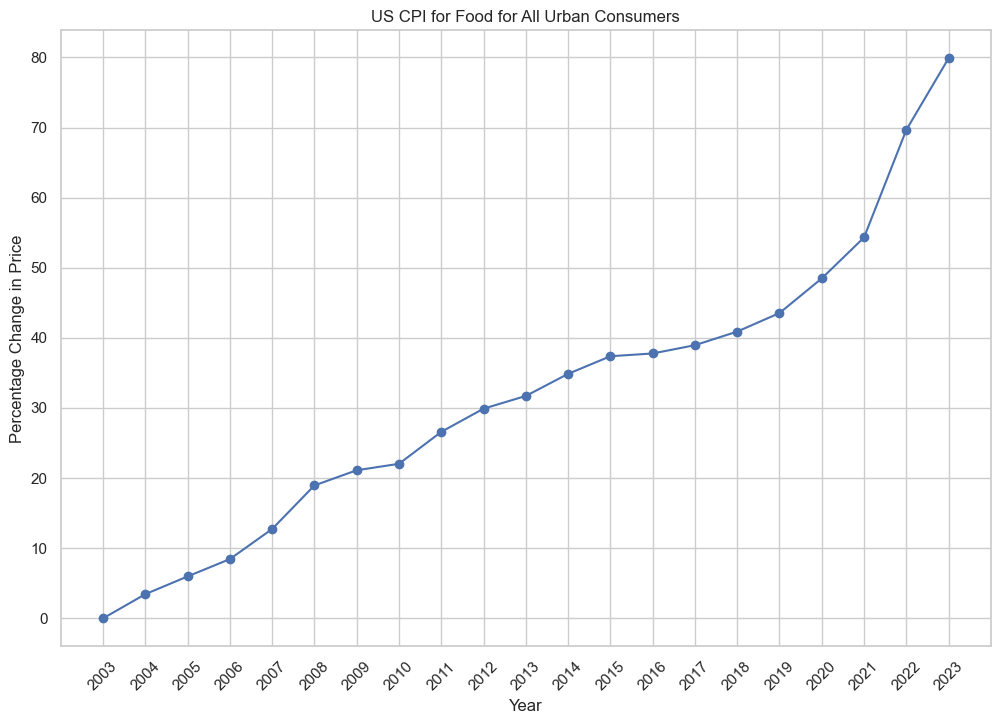

In [76]:
df22_avg20 = df22_avg20.iloc[11:]
df22_avg20
# Plot the average values
plt.figure(figsize = (12, 8))
plt.plot(df22_avg20['Year'], df22_avg20['US CPI Food1'], marker = 'o')
plt.title('US CPI for Food for All Urban Consumers')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Price')
plt.xticks(df22_avg20['Year'], rotation = 45)  # Set x-ticks to the years in the 'Year' column
plt.grid(True)
plt.show()


In [77]:
ur5  =  pd.read_excel("./Downloads/BLS_CPI_NY Unemployment Rate.xlsx")
ur5.head(10)

Local Area Unemployment Statistics   
0                Original Data Value  \
1                                NaN   
2                         Series Id:   
3            Not Seasonally Adjusted   
4                              Area:   
5                         Area Type:   
6             State/Region/Division:   
7                             Years:   
8                                NaN   
9                               Year   

                                          Unnamed: 1   
0                                                NaN  \
1                                                NaN   
2  LAUST360000000000003,LAUST360000000000004,LAUS...   
3                                                NaN   
4                                           New York   
5                                          Statewide   
6                                           New York   
7                                       1990 to 2023   
8                                                NaN   
9                                             Period   

                             Unnamed: 2                      Unnamed: 3   
0                                   NaN                             NaN  \
1                                   NaN                             NaN   
2                                   NaN                             NaN   
3                                   NaN                             NaN   
4                                   NaN                             NaN   
5                                   NaN                             NaN   
6                                   NaN                             NaN   
7                                   NaN                             NaN   
8                                   NaN                             NaN   
9  civilian noninstitutional population  labor force participation rate   

                    Unnamed: 4   Unnamed: 5  Unnamed: 6    Unnamed: 7   
0                          NaN          NaN         NaN           NaN  \
1                          NaN          NaN         NaN           NaN   
2                          NaN          NaN         NaN           NaN   
3                          NaN          NaN         NaN           NaN   
4                          NaN          NaN         NaN           NaN   
5                          NaN          NaN         NaN           NaN   
6                          NaN          NaN         NaN           NaN   
7                          NaN          NaN         NaN           NaN   
8                          NaN          NaN         NaN           NaN   
9  employment-population ratio  labor force  employment  unemployment   

          Unnamed: 8  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
5                NaN  
6                NaN  
7                NaN  
8                NaN  
9  unemployment rate

In [78]:
# CLean 
# Drop the first 9 rows
ur5  =  ur5.iloc[9:]

# Set the 10th row as the header
new_header  =  ur5.iloc[0]
ur5  =  ur5[1:]
ur5.columns  =  new_header

# Reset the index
ur5  =  ur5.reset_index(drop = True)
# Rename the "Period" column to "Month"
ur5  =  ur5.rename(columns = {"Period": "Month"})

# Remove the number 9 from column headers
ur5  =  ur5.rename(columns = lambda x: str(x).replace("9", ""))

<Figure size 1600x1000 with 0 Axes>

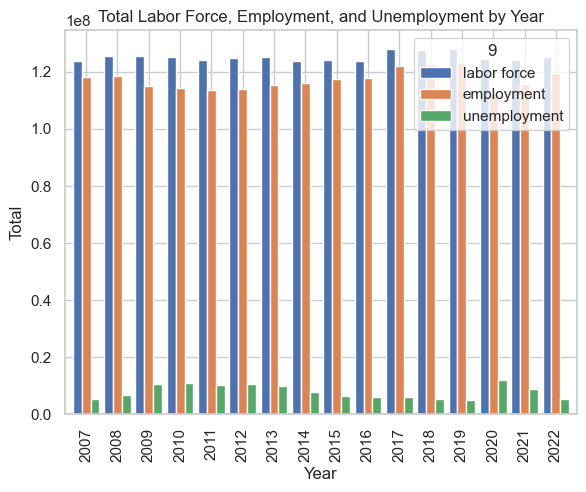

In [85]:
# Filter the DataFrame for the desired years
ur_filtered  =  ur5[(ur5['Year'] >=  2007) & (ur5['Year'] <=  2022)]

# Calculate the total values for each year
totals  =  ur_filtered.groupby('Year')[['labor force', 'employment', 'unemployment']].sum()

# Plot the histogram
plt.figure(figsize = (16, 10))
totals.plot(kind = 'bar', stacked = False,width = .85)
plt.title('Total Labor Force, Employment, and Unemployment by Year')
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend()
plt.show()


In [86]:
# Group the data by year and calculate the mean unemployment rate
average_unemployment_df  =  ur5.groupby('Year')['unemployment rate'].mean().reset_index()

# Display the new DataFrame
print(average_unemployment_df)

    Year unemployment rate
0   1990          5.315385
1   1991               7.3
2   1992          8.692308
3   1993          7.923077
4   1994          6.930769
5   1995          6.353846
6   1996          6.238462
7   1997          6.407692
8   1998          5.607692
9   1999          5.176923
10  2000          4.523077
11  2001          4.892308
12  2002               6.2
13  2003               6.4
14  2004          5.815385
15  2005          4.976923
16  2006               4.5
17  2007          4.438462
18  2008          5.384615
19  2009          8.376923
20  2010          8.715385
21  2011          8.353846
22  2012          8.638462
23  2013          7.807692
24  2014          6.276923
25  2015          5.253846
26  2016          4.876923
27  2017          4.607692
28  2018          4.092308
29  2019          3.846154
30  2020          9.838462
31  2021          7.023077
32  2022          4.276923
33  2023               4.2


In [87]:
average_unemployment_df  =  average_unemployment_df.rename(columns = {"unemployment rate": "unemployment_rate"})

In [88]:
df_merged

All_Gas_Types_Average Oil_Average_Price Electric_Average
Year                                                         
1990               1.21725          1.087417         0.083667
1991              1.196417          1.018167         0.086667
1992              1.189667          0.960917         0.088083
1993              1.172833          0.943667         0.091583
1994                 1.174          0.916083            0.092
1995              1.205333          0.893417         0.093583
1996              1.287917          1.019167         0.094167
1997               1.29125          1.014333         0.094333
1998              1.115333          0.879917         0.086833
1999              1.220833          0.899583         0.086333
2000              1.562667          1.360083          0.08725
2001               1.53125          1.309583         0.092333
2002              1.440833            1.1615         0.091083
2003              1.637833          1.400417         0.092833
2004              1.922917          1.645417         0.094333
2005              2.337833          2.220583              0.1
2006              2.634667          2.495167         0.112333
2007              2.849417            2.6805         0.116667
2008              3.317417          3.752083         0.123333
2009               2.40075           2.51425         0.127167
2010                2.8355          2.925333         0.127667
2011                3.5765          3.712167          0.12975
2012                 3.695          3.753083         0.129583
2013              3.583917          3.720167         0.132167
2014              3.424917          3.707417         0.137083
2015                  2.51          2.600833         0.138083
2016              2.203583             2.112         0.135167
2017              2.468667           2.44575          0.13775
2018              2.793583          3.089167          0.13625
2019              2.698417          2.984667         0.136333
2020                2.2415           2.28825         0.135333
2021              3.132917          3.005167          0.14075
2022              4.191583           5.01125           0.1585
2023                 3.669             3.969          0.16675

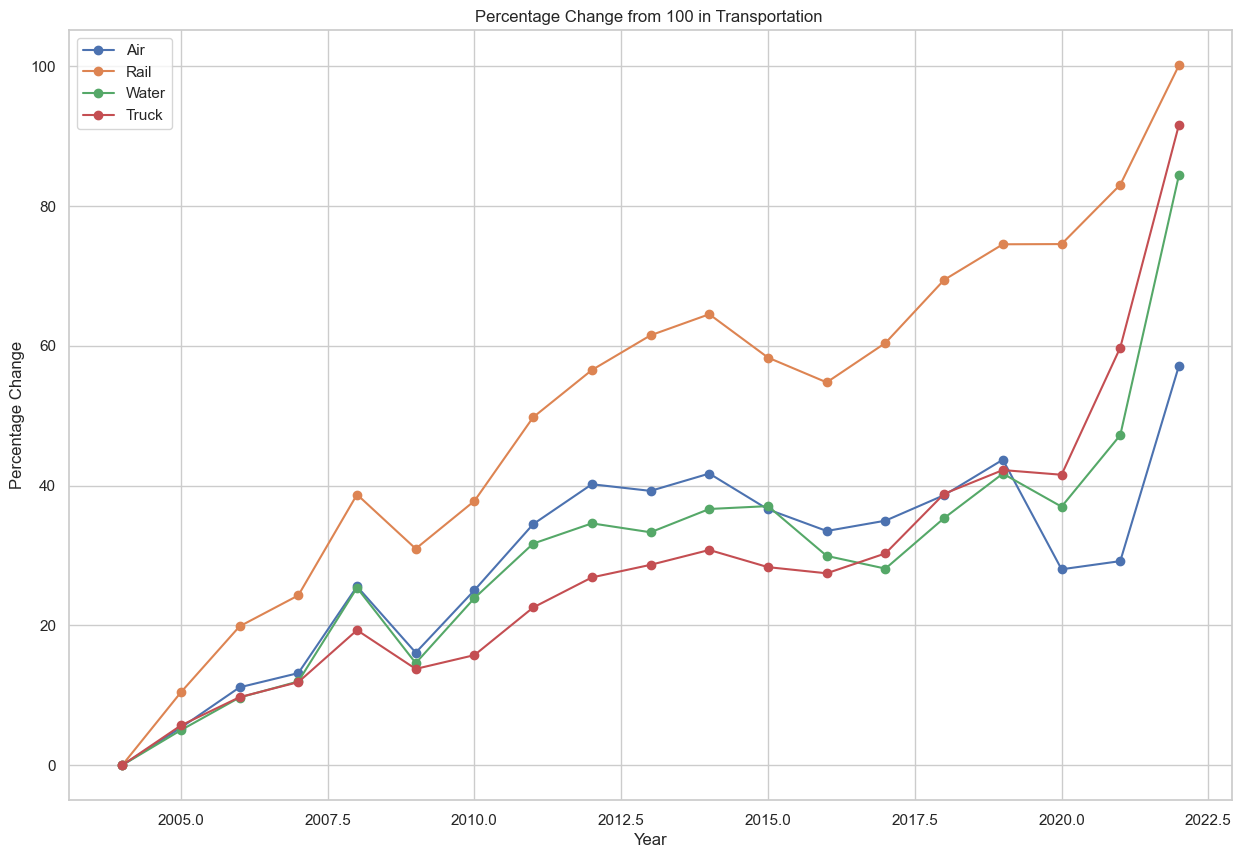

In [89]:
df24  =  pd.read_excel("./Downloads/producer-price-indexes-f.xlsx")
df24
#CPI Average Price Data, U.S. city average
# CLean 
df24.columns  =  ['Year', 'Air', 'Rail', 'Water', 'Truck']
df24
#Clean
df24_sub  =  df24.copy()  

# Subtract 100 from each column except for the 'Year' column
df24_sub[df24_sub.columns[1:]]  =  df24_sub[df24_sub.columns[1:]] - 100

# Plot the data
plt.figure(figsize = (15, 10))
for column in df24_sub.columns[1:]:
    plt.plot(df24_sub['Year'], df24_sub[column], marker = 'o', label = column)
plt.title('Percentage Change from 100 in Transportation ')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
df_merged = df_merged.merge(df22_avg, on = 'Year',how = 'left')
df_merged = df_merged.merge(IR_avg, on = 'Year',how = 'left')
df_merged = df_merged.merge(average_unemployment_df, on = 'Year',how = 'left')
df_merged = df_merged.merge(df5_avg, on = 'Year',how = 'left')
df_merged = df_merged.merge(df6_avg, on = 'Year',how = 'left')
df_merged = df_merged.merge(df24_sub, on = 'Year',how = 'left')
df_merged.dropna()

Year All_Gas_Types_Average Oil_Average_Price Electric_Average US_CPI_Food   
14  2004              1.922917          1.645417         0.094333   35.014993  \
15  2005              2.337833          2.220583              0.1   38.314748   
16  2006              2.634667          2.495167         0.112333   41.541903   
17  2007              2.849417            2.6805         0.116667    47.15336   
18  2008              3.317417          3.752083         0.123333   55.267087   
19  2009               2.40075           2.51425         0.127167   58.065572   
20  2010                2.8355          2.925333         0.127667   59.274225   
21  2011                3.5765          3.712167          0.12975   65.229375   
22  2012                 3.695          3.753083         0.129583   69.537494   
23  2013              3.583917          3.720167         0.132167   71.901999   
24  2014              3.424917          3.707417         0.137083   76.023832   
25  2015                  2.51          2.600833         0.138083   79.297167   
26  2016              2.203583             2.112         0.135167    79.80426   
27  2017              2.468667           2.44575          0.13775   81.349476   
28  2018              2.793583          3.089167          0.13625   83.882934   
29  2019              2.698417          2.984667         0.136333   87.333281   
30  2020                2.2415           2.28825         0.135333   93.788503   
31  2021              3.132917          3.005167          0.14075  101.422944   
32  2022              4.191583           5.01125           0.1585  121.456959   

    AvgInflation unemployment_rate Percent_Change_Export   
14      2.683333          5.815385             21.796444  \
15      3.383333          4.976923             19.545877   
16      3.233333               4.5             24.730015   
17      2.866667          4.438462             49.458965   
18      3.850000          5.384615             82.183499   
19     -0.350000          8.376923             59.917911   
20      1.625000          8.715385             67.824611   
21      3.166667          8.353846            100.819878   
22      2.083333          8.638462            112.805591   
23      1.483333          7.807692            115.064976   
24      1.633333          6.276923            110.327698   
25      0.125000          5.253846             82.748565   
26      1.266667          4.876923             73.464162   
27      2.116667          4.607692             76.574257   
28      2.450000          4.092308             77.280013   
29      1.816667          3.846154             78.227672   
30      1.233333          9.838462             78.383245   
31      4.700000          7.023077            120.987992   
32      8.016667          4.276923            152.034014   

   Percent_Change_Import        Air        Rail      Water      Truck  
14             18.409543   0.000000    0.000000   0.000000   0.000000  
15             26.084499   5.375295   10.429989   5.017273   5.689349  
16             31.156653  11.145908   19.867696   9.689094   9.738161  
17             41.931177  13.178971   24.292540  11.983879  11.887829  
18             58.680373  25.572441   38.721058  25.382464  19.322774  
19              54.20367  16.105350   30.966556  14.607666  13.778891  
20             67.059988  25.033371   37.802279  23.910183  15.750768  
21             91.311264  34.479926   49.768467  31.699293  22.563439  
22             89.215106  40.188931   56.523337  34.594506  26.862777  
23             90.946495  39.239142   61.492098  33.319625  28.664943  
24              97.69193  41.718862   64.505696  36.650765  30.790367  
25             93.434883  36.595133   58.302095  37.062017  28.333603  
26             93.784537  33.504467   54.759280  29.939135  27.452723  
27             99.186445  34.977924   60.396913  28.121402  30.297398  
28             98.795208  38.628196   69.415656  35.351209  38.823339  
29             97.102614  43.7

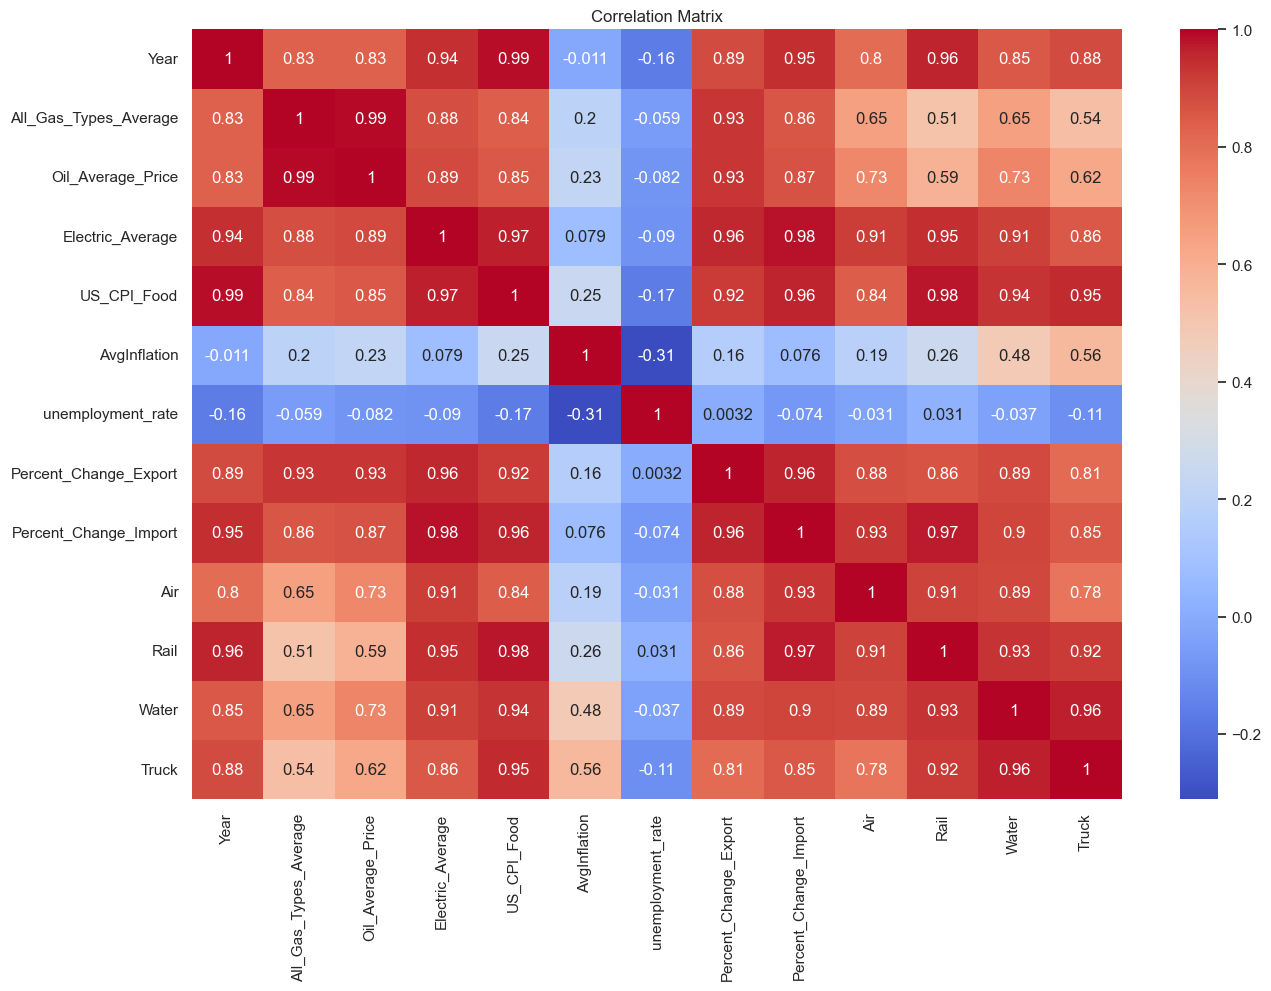

In [91]:
# Create a correlation matrix
correlation_matrix  =  df_merged.corr()
fig, ax  =  plt.subplots(figsize = (15, 10))
# Plot the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')

# Display the plot
plt.show()

In [92]:
df_merged1 = fruits.merge(grains, on = 'Year',how = 'left')
df_merged1 = df_merged1.merge(vegs, on = 'Year',how = 'left')
df_merged1 = df_merged1.merge(dairy, on = 'Year',how = 'left')
df_merged1 = df_merged1.merge(meat, on = 'Year',how = 'left')
df_merged1 = df_merged1.merge(df22_avg, on = 'Year',how = 'left')
df_merged1  =  df_merged1.set_index('Year')
df_merged1

Lemons_Average Oranges_Average Bananas_Average   
Year                                                  
1993        1.08375        0.549429         0.43875  \
1994       1.108833        0.545429        0.462167   
1995        1.13625        0.624571        0.489667   
1996       1.114417        0.617286        0.489583   
1997       1.252583        0.597714        0.486583   
1998       1.197917        0.564667        0.493917   
1999         1.3335        0.842833        0.490833   
2000       1.289417           0.628           0.501   
2001          1.265        0.721714        0.506667   
2002       1.390667        0.835875          0.5075   
2003       1.317417        0.838111        0.508667   
2004       1.234833        0.858556         0.49525   
2005       1.410833          0.9958        0.492167   
2006          1.529        1.087182        0.500333   
2007       1.856917        1.284455        0.510167   
2008       2.005583        1.116333        0.609333   
2009           1.52        1.050417        0.611167   
2010        1.63425         1.06175        0.579667   
2011       1.580667         1.09575        0.610167   
2012         1.5645        1.053167        0.602083   
2013        1.58175         1.15075        0.599583   
2014       1.967667        1.318917        0.598083   
2015       1.981417        1.304417         0.58275   
2016       2.037417        1.245917           0.573   
2017       2.006833         1.34075        0.562583   
2018          2.249        1.412833        0.573833   
2019       2.129333        1.366667        0.573583   
2020       1.934667           1.245        0.577917   
2021        1.98275        1.362111        0.600083   
2022       2.127636           1.572          0.6365   
2023         2.1912          1.5255         0.63675   

     Strawberry_Average_per_12oz Bread_Average_per_lb Flour_Average_per_lb   
Year                                                                         
1993                    1.118778             0.752083             0.234417  \
1994                    1.134222             0.760667             0.231083   
1995                    1.318333              0.79125             0.245417   
1996                      1.2938             0.875667             0.287667   
1997                    1.355111              0.87225             0.301917   
1998                      1.6426             0.860167             0.299833   
1999                      1.6945             0.887083             0.293917   
2000                      1.5326             0.930167              0.29025   
2001                    1.865727                  NaN                  NaN   
2002                       1.857             1.015583               0.3115   
2003                       1.929              1.00075             0.311667   
2004                     2.23275             0.969417             0.302583   
2005                       2.111             1.040333             0.323917   
2006                    2.041583               1.0805             0.328667   
2007                      2.2025             1.207333              0.36025   
2008                    2.287667             1.366417             0.506667   
2009                       2.098             1.387417             0.501083   
2010                      2.1855             1.373333             0.476917   
2011                    2.075333             1.444667             0.518083   
2012                      1.9925             1.417667             0.516917   
2013                    2.023636             1.406667             0.521583   
2014                     2.28875              1.40125             0.529833   
2015                    2.215727                1.441             0.516667   
2016                     2.43525              1.37125                0.525   
2017                     2.33925             1.332583              0.50725   
2018                     2.34375                1.286              0.46175   
2019 

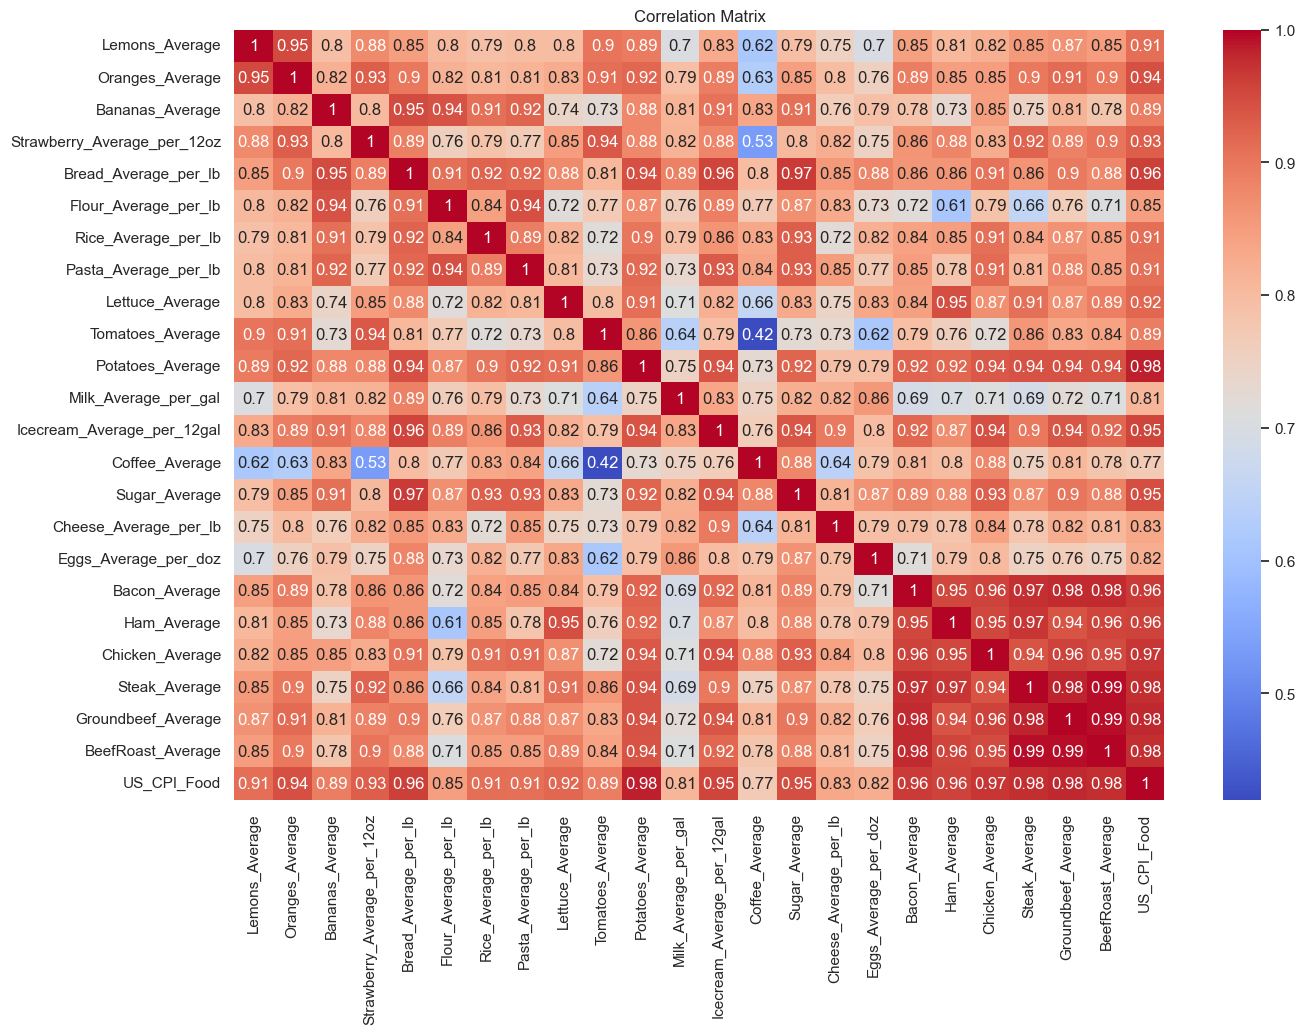

In [93]:
# Create a correlation matrix
correlation_matrix  =  df_merged1.corr()

# Plot the correlation matrix using seaborn
fig, ax  =  plt.subplots(figsize = (15, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')

# Display the plot
plt.show()

In [94]:
X  =  df_merged.drop(columns = ['US_CPI_Food'])
y  =  df_merged['US_CPI_Food']
X1  =  df_merged1.drop(columns = ['US_CPI_Food'])
y1  =  df_merged1['US_CPI_Food']

In [95]:
df_merged.dropna(inplace = True)
df_merged1.dropna(inplace = True)

In [96]:
# Convert columns in df_merged to int64
df_merged  =  df_merged.astype(int)

# Convert columns in df_merged1 to int64
df_merged1  =  df_merged1.astype(int)

In [97]:
#Multiple Regression
m1  =  'US_CPI_Food ~ ' + ' + '.join(X.columns)
m2  =  'US_CPI_Food ~ ' + ' + '.join(X1.columns)
m3  =  str('US_CPI_Food ~ Oil_Average_Price+Rail+AvgInflation+unemployment_rate+Percent_Change_Export+Percent_Change_Import')

#m4  =  str('TotalPay ~ State_ID + Capacity + Win_Percent + MOV+GSR+Buyout+BonusPaid ')

In [102]:
#https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit the linear regression model
model  =  smf.ols(m1, df_merged)
results  =  model.fit()

# Print the model summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            US_CPI_Food   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     393.9
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           1.11e-08
Time:                        19:03:30   Log-Likelihood:                -24.404
No. Observations:                  19   AIC:                             72.81
Df Residuals:                       7   BIC:                             84.14
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6148.27

In [107]:
X = df_merged.drop(columns=['US_CPI_Food'])
y = df_merged['US_CPI_Food']
#reduce noise
from sklearn.ensemble import RandomForestRegressor
rf_model  =  RandomForestRegressor()
rf_model.fit(X,y)
# Get feature importances
feature_importances  =  rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df  =  pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df  =  importance_df.sort_values(by = 'Importance', ascending = False)

# Print the sorted feature importances
print(importance_df)

                  Feature  Importance
11                  Truck    0.222859
0                    Year    0.188042
7   Percent_Change_Import    0.168312
9                    Rail    0.156679
10                  Water    0.085083
8                     Air    0.074109
6   Percent_Change_Export    0.033718
4            AvgInflation    0.032367
1   All_Gas_Types_Average    0.020722
5       unemployment_rate    0.013373
2       Oil_Average_Price    0.004735
3        Electric_Average    0.000000


In [108]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model  =  GradientBoostingRegressor()
gb_model.fit(X, y)
# Get feature importances
feature_importances  =  gb_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df  =  pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df  =  importance_df.sort_values(by = 'Importance', ascending = False)

# Print the sorted feature importances
print(importance_df)

                  Feature  Importance
0                    Year    0.444222
11                  Truck    0.236615
7   Percent_Change_Import    0.114389
9                    Rail    0.091264
10                  Water    0.043444
6   Percent_Change_Export    0.037856
8                     Air    0.014555
1   All_Gas_Types_Average    0.006148
5       unemployment_rate    0.005271
4            AvgInflation    0.003577
2       Oil_Average_Price    0.002658
3        Electric_Average    0.000000


In [109]:

# Fit the linear regression model
model  =  smf.ols(m2, data = df_merged1)
results  =  model.fit()

# Print the model summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            US_CPI_Food   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     37.79
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           0.000396
Time:                        19:12:04   Log-Likelihood:                -52.120
No. Observations:                  22   AIC:                             138.2
Df Residuals:                       5   BIC:                             156.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [112]:
X = df_merged1.drop(columns=['US_CPI_Food'])
y = df_merged1['US_CPI_Food']
#reduce noise
from sklearn.ensemble import RandomForestRegressor
rf_model  =  RandomForestRegressor()
rf_model.fit(X,y)
# Get feature importances
feature_importances  =  rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df  =  pd.DataFrame({'Feature': X1.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df  =  importance_df.sort_values(by = 'Importance', ascending = False)

# Print the sorted feature importances
print(importance_df)

                        Feature  Importance
7          Pasta_Average_per_lb    0.198101
12   Icecream_Average_per_12gal    0.180860
21           Groundbeef_Average    0.119272
17                Bacon_Average    0.106506
20                Steak_Average    0.081182
22            BeefRoast_Average    0.080877
13               Coffee_Average    0.057872
15        Cheese_Average_per_lb    0.046527
1               Oranges_Average    0.038284
18                  Ham_Average    0.023260
11         Milk_Average_per_gal    0.020230
16         Eggs_Average_per_doz    0.016547
8               Lettuce_Average    0.015183
3   Strawberry_Average_per_12oz    0.011093
4          Bread_Average_per_lb    0.003017
0                Lemons_Average    0.001188
10             Potatoes_Average    0.000000
9              Tomatoes_Average    0.000000
14                Sugar_Average    0.000000
6           Rice_Average_per_lb    0.000000
5          Flour_Average_per_lb    0.000000
19              Chicken_Average 

In [114]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model  =  GradientBoostingRegressor()
gb_model.fit(X, y)
# Get feature importances
feature_importances  =  gb_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df  =  pd.DataFrame({'Feature': X1.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df  =  importance_df.sort_values(by = 'Importance', ascending = False)

# Print the sorted feature importances
print(importance_df)

                        Feature  Importance
13               Coffee_Average    0.358363
7          Pasta_Average_per_lb    0.246910
20                Steak_Average    0.164894
21           Groundbeef_Average    0.051318
17                Bacon_Average    0.043298
22            BeefRoast_Average    0.035201
16         Eggs_Average_per_doz    0.035084
1               Oranges_Average    0.034149
11         Milk_Average_per_gal    0.013013
3   Strawberry_Average_per_12oz    0.006007
0                Lemons_Average    0.004100
18                  Ham_Average    0.003082
15        Cheese_Average_per_lb    0.002249
12   Icecream_Average_per_12gal    0.001818
4          Bread_Average_per_lb    0.000464
8               Lettuce_Average    0.000051
9              Tomatoes_Average    0.000000
10             Potatoes_Average    0.000000
6           Rice_Average_per_lb    0.000000
14                Sugar_Average    0.000000
5          Flour_Average_per_lb    0.000000
19              Chicken_Average 

In [115]:
# Build a Automation of ARIMA validation for the following models
def ARIMA_validation1(AR, I, MA, train, test):
    '''
    Expect: p(AR),d(I),q(MA), training_set, test_set
    Modifies: N/A
    Returns: 1. ACF plot            
             2. PACF plot
             3. RMSE
             4. Line plot for Actual vs. Predicted
             5. Model summary
             6. Line Plot of the Residual Errors
             7. Density Plot of the Residual Errors
             8. Residual Errors Statistics
    '''

   

    arima_order  =  (AR, I, MA)
    print('ARIMA{}\n'.format(arima_order))

    # ACF plot
    plot_acf(train);
    plt.title('ACF for General Price (MA)', size = 15)
    plt.show()

    # PACF plot
    plot_pacf(train, method = 'ols');
    plt.title('PACF for General Price (AR)', size = 15)
    plt.show()

    # ARIMA model
    model  =  sm.tsa.ARIMA(train, order = arima_order)
    model_fit  =  model.fit()
    predictions  =  model_fit.predict(start = start_date, end = end_date)

    # RMSE
    mse  =  mean_squared_error(test, predictions)
    rmse  =  sqrt(mse)
    print('{:5}: {}'.format('RMSE', round(rmse, 4)))

    # Plotting
    test.plot(figsize = (12, 5), label = 'Actual')
    predictions.plot(figsize = (12, 5), label = 'Predict', color = 'red', style = '--')
    plt.title('Actual vs. Predicted', size = 15)
    plt.legend()
    plt.show()

    # Summary
    print(model_fit.summary())

    # Residual
    model_fit.resid.plot(title = 'Line Plot of the Residual Errors')
    plt.show()
    model_fit.resid.plot(kind = 'kde', title = 'Density Plot of the Residual Errors')
    plt.show()
    print('Residual Errors Statistics:')
    print(model_fit.resid.describe())


In [116]:
ir1 = IR
uscpi = df22.copy()

In [117]:
#ir1
# Remove the "AvgInflation" column 
ir1  =  ir1.drop('AvgInflation', axis = 1)
ir2 = ir1.reset_index().copy()
ir2 = ir2.dropna()
print(ir2)

    Year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0   1990  5.2  5.3  5.2  4.7  4.4  4.7  4.8  5.6  6.2  6.3  6.3  6.1
1   1991  5.7  5.3  4.9  4.9  5.0  4.7  4.4  3.8  3.4  2.9  3.0  3.1
2   1992  2.6  2.8  3.2  3.2  3.0  3.1  3.2  3.1  3.0  3.2  3.0  2.9
3   1993  3.3  3.2  3.1  3.2  3.2  3.0  2.8  2.8  2.7  2.8  2.7  2.7
4   1994  2.5  2.5  2.5  2.4  2.3  2.5  2.8  2.9  3.0  2.6  2.7  2.7
5   1995  2.8  2.9  2.9  3.1  3.2  3.0  2.8  2.6  2.5  2.8  2.6  2.5
6   1996  2.7  2.7  2.8  2.9  2.9  2.8  3.0  2.9  3.0  3.0  3.3  3.3
7   1997  3.0  3.0  2.8  2.5  2.2  2.3  2.2  2.2  2.2  2.1  1.8  1.7
8   1998  1.6  1.4  1.4  1.4  1.7  1.7  1.7  1.6  1.5  1.5  1.5  1.6
9   1999  1.7  1.6  1.7  2.3  2.1  2.0  2.1  2.3  2.6  2.6  2.6  2.7
10  2000  2.7  3.2  3.8  3.1  3.2  3.7  3.7  3.4  3.5  3.4  3.4  3.4
11  2001  3.7  3.5  2.9  3.3  3.6  3.2  2.7  2.7  2.6  2.1  1.9  1.6
12  2002  1.1  1.1  1.5  1.6  1.2  1.1  1.5  1.8  1.5  2.0  2.2  2.4
13  2003  2.6  3.0  3.0  2.2  2.1 

In [118]:
new_ir  =  ir2.melt(id_vars = "Year", var_name = "Month", value_name = "Inflation_Rate")
new_ir['Date']  =  pd.to_datetime(new_ir['Year'].astype(str) + '-' + new_ir['Month'])
new_ir  =  new_ir[['Date', 'Inflation_Rate']]
new_ir  =  new_ir.sort_values(by = 'Date', ascending = True)

print(new_ir)


          Date  Inflation_Rate
0   1990-01-01             5.2
33  1990-02-01             5.3
66  1990-03-01             5.2
99  1990-04-01             4.7
132 1990-05-01             4.4
..         ...             ...
263 2022-08-01             8.3
296 2022-09-01             8.2
329 2022-10-01             7.7
362 2022-11-01             7.1
395 2022-12-01             6.5

[396 rows x 2 columns]


In [119]:
new_ir['Date'] = pd.to_datetime(new_ir['Date'])
new_ir.set_index('Date', inplace=True)
train = new_ir['1990':'2021']
print('Train shape: {}'.format(train.shape))
test = new_ir['2022':]
print('Train shape: {}'.format(test.shape))
start_date = '2022-01-01'
end_date = '2022-12-01'

Train shape: (384, 1)
Train shape: (12, 1)


In [120]:
# Build parameters for grid search
import itertools
p_values=range(0,10)
d_values=range(0,3)
q_values=range(0,6)
pdq=list(itertools.product(p_values,d_values,q_values))
len(pdq)

180

In [136]:
import warnings
warnings.filterwarnings('ignore')
best_score=None
for parameter in pdq:
    try:
        model_arima = sm.tsa.ARIMA(train, order=parameter)
        model_arima_fit=model_arima.fit()
        predictions = model_arima_fit.forecast(steps=len(test))[0]
        predictions = model_arima_fit.predict(start= start_date, end= end_date) # store only the predictions
        mse=mean_squared_error(test, predictions)
        from math import sqrt
        rmse = sqrt(mse)
        print('ARIMA{}, RMSE={}'.format(parameter,round(rmse,4)))
    except:
        continue

ARIMA(0, 0, 0), RMSE=103.3211
ARIMA(0, 0, 1), RMSE=100.918
ARIMA(0, 0, 2), RMSE=99.2944
ARIMA(0, 0, 3), RMSE=95.9475
ARIMA(0, 0, 4), RMSE=94.2097
ARIMA(0, 0, 5), RMSE=94.4564
ARIMA(0, 1, 0), RMSE=20.5417
ARIMA(0, 1, 1), RMSE=20.0728
ARIMA(0, 1, 2), RMSE=19.9203
ARIMA(0, 1, 3), RMSE=19.6453
ARIMA(0, 1, 4), RMSE=18.8191
ARIMA(0, 1, 5), RMSE=18.5793
ARIMA(0, 2, 0), RMSE=9.8655
ARIMA(0, 2, 1), RMSE=9.3524
ARIMA(0, 2, 2), RMSE=11.0194
ARIMA(0, 2, 3), RMSE=10.4179
ARIMA(0, 2, 4), RMSE=11.6181
ARIMA(0, 2, 5), RMSE=12.366
ARIMA(1, 0, 0), RMSE=20.569
ARIMA(1, 0, 1), RMSE=20.1149
ARIMA(1, 0, 2), RMSE=19.971
ARIMA(1, 0, 3), RMSE=19.7031
ARIMA(1, 0, 4), RMSE=18.8897
ARIMA(1, 0, 5), RMSE=18.6525
ARIMA(1, 1, 0), RMSE=19.0041
ARIMA(1, 1, 1), RMSE=10.6219
ARIMA(1, 1, 2), RMSE=11.4312
ARIMA(1, 1, 3), RMSE=10.792
ARIMA(1, 1, 4), RMSE=11.9387
ARIMA(1, 1, 5), RMSE=12.7295
ARIMA(1, 2, 0), RMSE=10.2035
ARIMA(1, 2, 1), RMSE=11.3046
ARIMA(1, 2, 2), RMSE=10.3864
ARIMA(1, 2, 3), RMSE=10.3781
ARIMA(1, 2, 4), RMS

ARIMA(8, 0, 5)



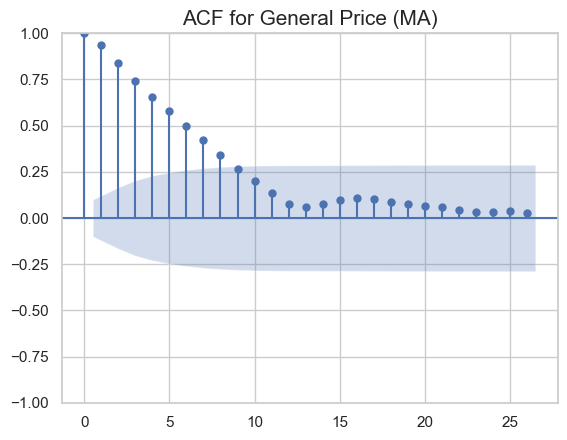

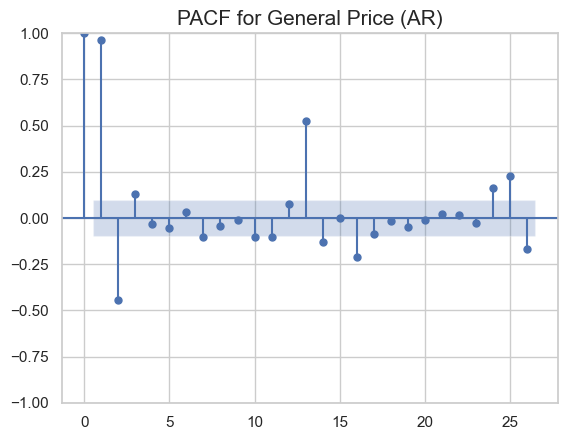

RMSE : 1.0629


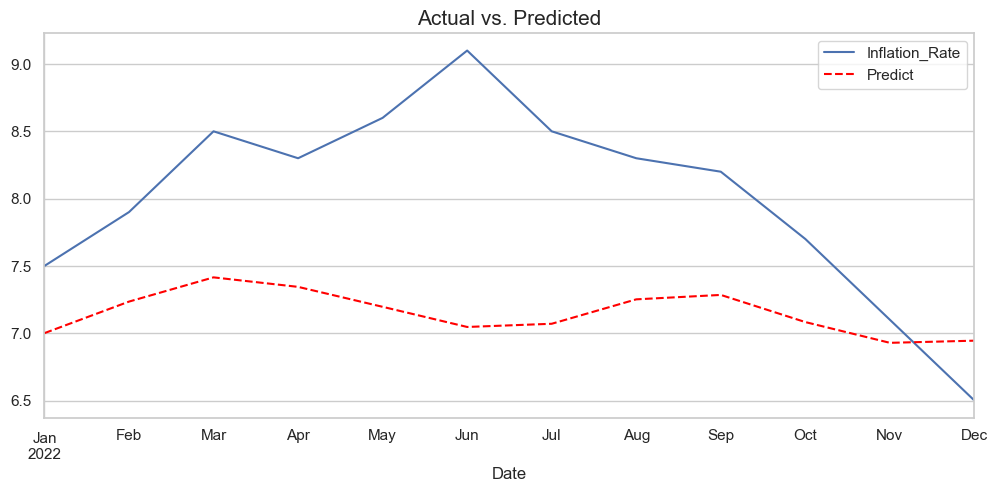

                               SARIMAX Results                                
Dep. Variable:         Inflation_Rate   No. Observations:                  384
Model:                 ARIMA(8, 0, 5)   Log Likelihood                -127.621
Date:                Mon, 19 Jun 2023   AIC                            285.241
Time:                        19:13:20   BIC                            344.501
Sample:                    01-01-1990   HQIC                           308.746
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7765      5.351      0.519      0.604      -7.711      13.264
ar.L1          0.3234      0.056      5.795      0.000       0.214       0.433
ar.L2         -0.2463      0.060     -4.139      0.0

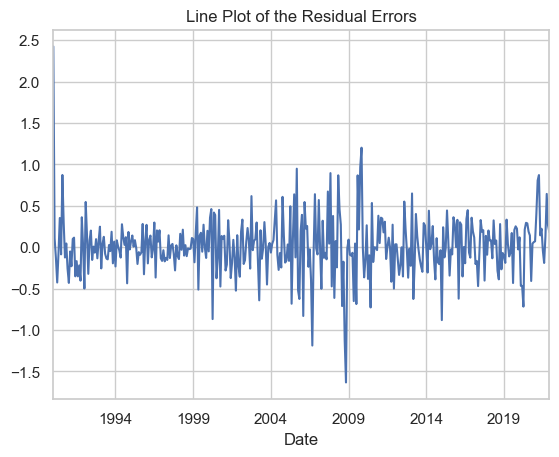

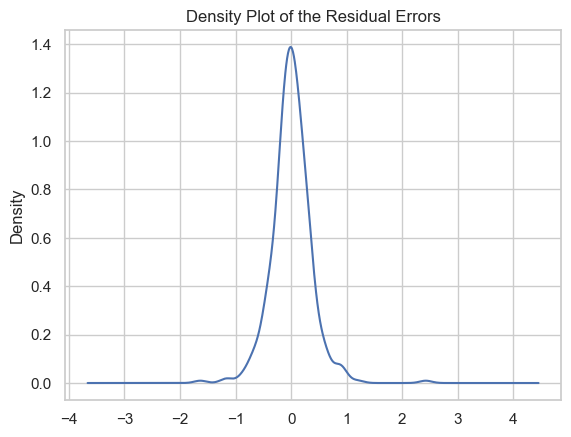

Residual Errors Statistics:
count    384.000000
mean       0.008360
std        0.356564
min       -1.633657
25%       -0.165762
50%       -0.000515
75%        0.197139
max        2.423531
dtype: float64


In [121]:
#ARIMA(8, 0, 5), RMSE=1.0629
# prediction
ARIMA_validation1(8,0,5, train, test)

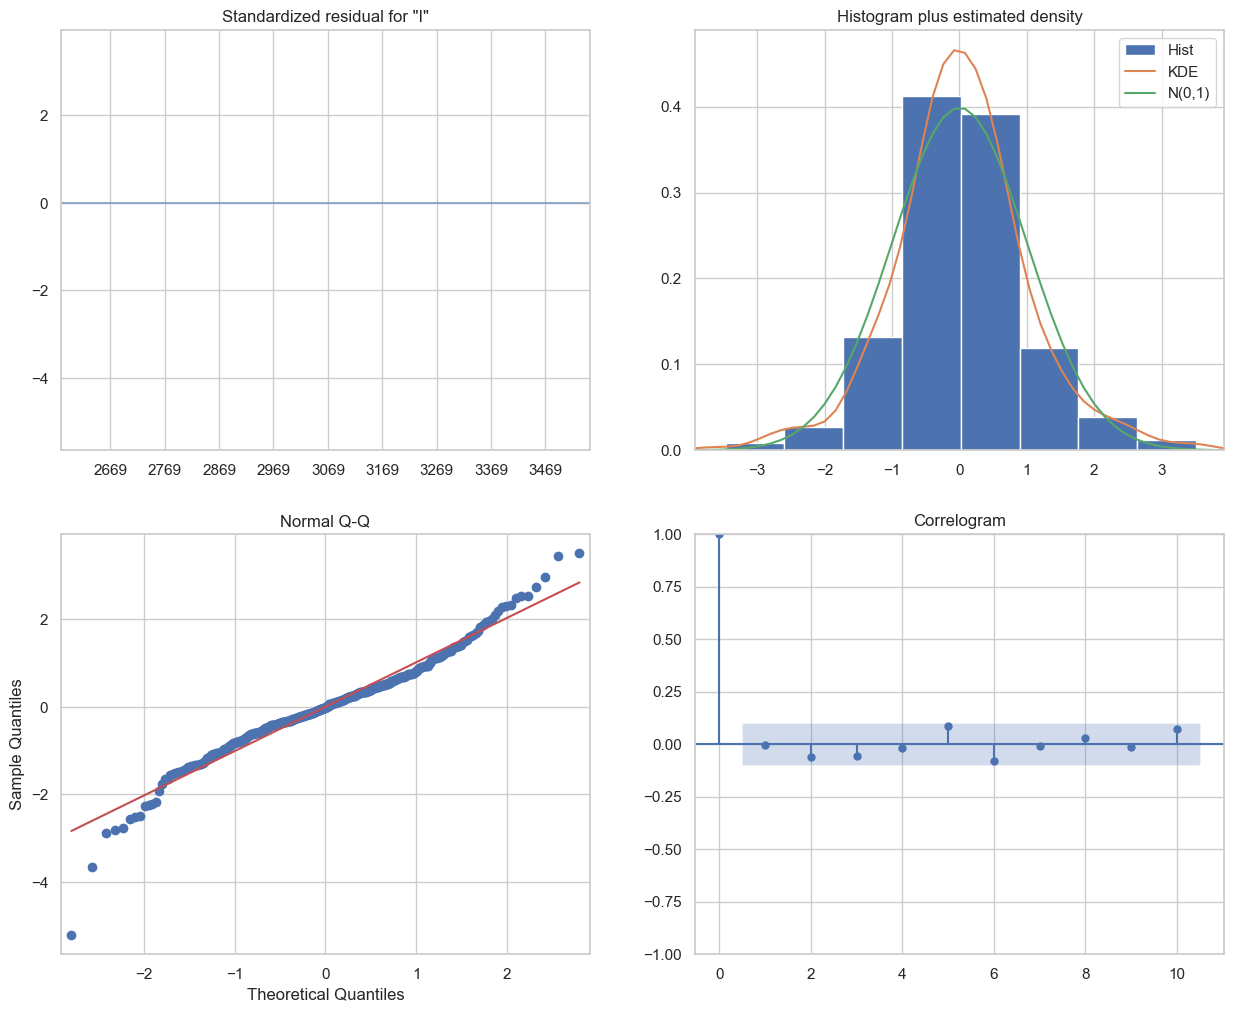

In [122]:
##### # Simple ARIMA model
model = sm.tsa.ARIMA(train, order=(5,0,5))
model_fit = model.fit()
predictions = model_fit.predict(start=start_date, end=end_date)

model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

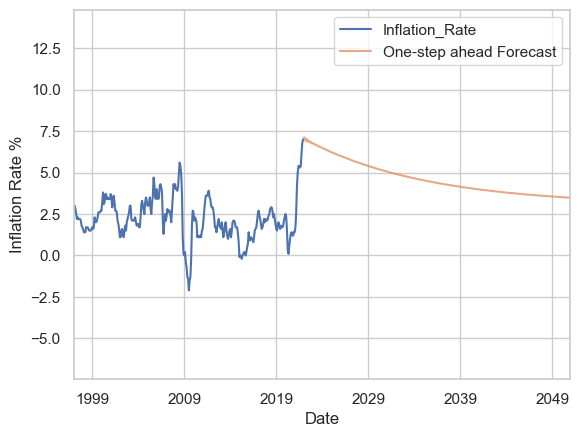

In [123]:
pred = model_fit.get_prediction(start=pd.to_datetime('2022-01'),end=pd.to_datetime('2050-12'), dynamic=False)
pred_ci = pred.conf_int()

pred_ci.iloc[:, 0]

# subset the data from 1990
ax = train['1997-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Inflation Rate %')
plt.legend()

plt.show()

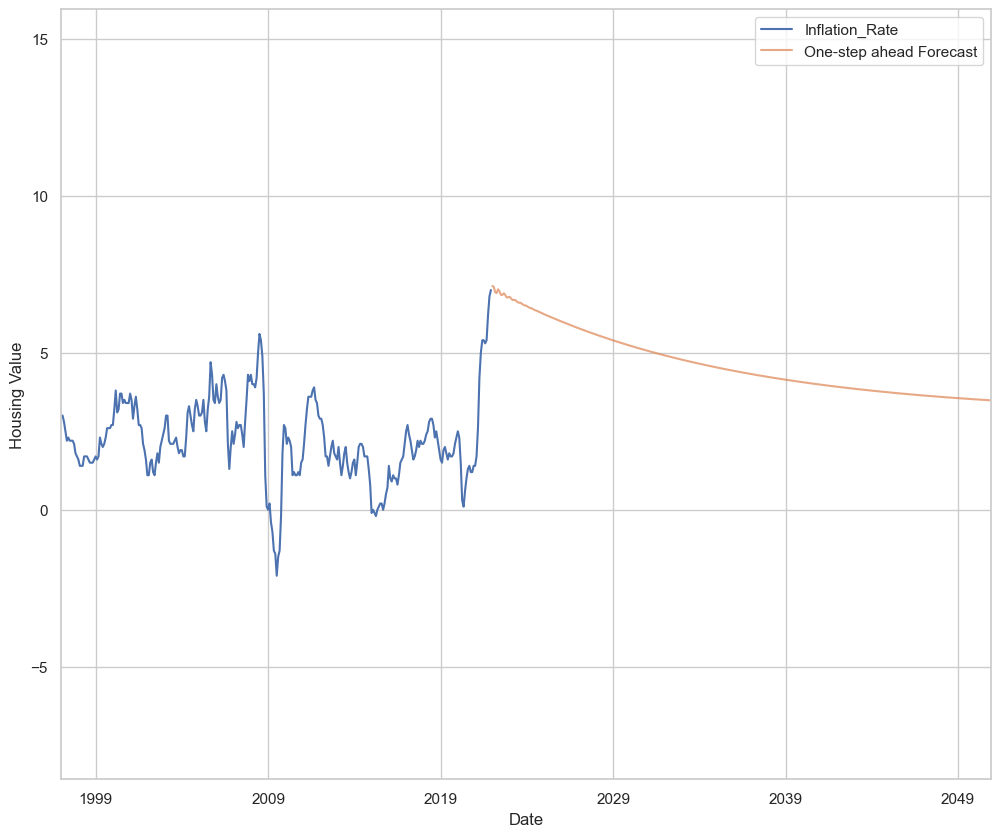

In [124]:
preddynamic = model_fit.get_prediction(start=pd.to_datetime('2022-01'),end=pd.to_datetime('2050-12'), dynamic=False,full_results=True)
preddynamic_ci = preddynamic.conf_int()

# subset the data from 1990
ax = train['1997-01':].plot(label='observed', figsize=(12, 10))
preddynamic.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(preddynamic_ci.index,
                preddynamic_ci.iloc[:, 0],
                preddynamic_ci.iloc[:, 1], color='k', alpha=.2)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-01-01'), train.index[-1],
                 alpha=.1, zorder=-1)
ax.set_xlabel('Date')
ax.set_ylabel('Housing Value')
plt.legend()

plt.show()

In [125]:
uscpi
uscpi = uscpi.reset_index().copy()
uscpi = uscpi.drop('index', axis = 1)
uscpi = uscpi.dropna()
print(uscpi)

10  Year      Jan      Feb      Mar      Apr      May      Jun      Jul   
0   1992    137.2    137.5    138.1    138.1    137.4    137.4    137.2  \
1   1993    139.8    139.9    140.1    140.6    141.1    140.4    140.3   
2   1994    143.7    142.9    143.2    143.4    143.5    143.5    144.2   
3   1995    147.5    147.4    147.4    148.4    148.3    147.9    148.1   
4   1996      151    150.8    151.6    152.3      152    152.6    153.2   
5   1997    156.5    156.5    156.6    156.6    156.6    156.6      157   
6   1998    159.9    159.4    159.7    159.8    160.3    160.1    160.5   
7   1999    163.6    163.3    163.3    163.4    163.7    163.6    163.8   
8   2000    166.1    166.3    166.5    166.6    167.3    167.3    168.1   
9   2001    170.9    171.3    171.7    171.9    172.5      173    173.5   
10  2002    175.8    175.9    176.1    176.2    175.8    175.8      176   
11  2003    177.5    178.3    178.6    178.4    178.8    179.6    179.7   
12  2004    183.8    184.

In [126]:
new_uscpi=uscpi.set_index('Year')
new_uscpi  =  uscpi.melt(id_vars = "Year", var_name = "Month", value_name = "US CPI")
new_uscpi['Date']  =  pd.to_datetime(new_uscpi['Year'].astype(str) + '-' + new_uscpi['Month'])
new_uscpi  =  new_uscpi[['Date', 'US CPI']]
new_uscpi  =  new_uscpi.sort_values(by = 'Date', ascending = True)

print(new_uscpi)


          Date   US CPI
0   1992-01-01    137.2
31  1992-02-01    137.5
62  1992-03-01    138.1
93  1992-04-01    138.1
124 1992-05-01    137.4
..         ...      ...
247 2022-08-01  310.875
278 2022-09-01  313.142
309 2022-10-01  315.323
340 2022-11-01  315.857
371 2022-12-01  316.839

[372 rows x 2 columns]


In [127]:
new_uscpi['Date'] = pd.to_datetime(new_uscpi['Date'])
new_uscpi.set_index('Date', inplace=True)
train = new_uscpi['1992':'2021']
train['US CPI'] = train['US CPI'].astype(float)
print('Train shape: {}'.format(train.shape))
test = new_uscpi['2022':]
print('Train shape: {}'.format(test.shape))
start_date = '2022-01-01'
end_date = '2022-12-01'

Train shape: (360, 1)
Train shape: (12, 1)


In [128]:
# Build parameters for grid search
import itertools
p_values=range(0,10)
d_values=range(0,3)
q_values=range(0,6)
pdq=list(itertools.product(p_values,d_values,q_values))
len(pdq)

180

In [131]:
import warnings
warnings.filterwarnings('ignore')
best_score=None
for parameter in pdq:
    try:
        model_arima = sm.tsa.ARIMA(train, order=parameter)
        model_arima_fit=model_arima.fit()
        predictions = model_arima_fit.forecast(steps=len(test))[0]
        predictions = model_arima_fit.predict(start= start_date, end= end_date) # store only the predictions
        mse=mean_squared_error(test, predictions)
        from math import sqrt
        rmse = sqrt(mse)
        print('ARIMA{}, RMSE={}'.format(parameter,round(rmse,4)))
    except:
        continue

ARIMA(0, 0, 0), RMSE=103.3211
ARIMA(0, 0, 1), RMSE=100.918
ARIMA(0, 0, 2), RMSE=99.2944
ARIMA(0, 0, 3), RMSE=95.9475
ARIMA(0, 0, 4), RMSE=94.2097
ARIMA(0, 0, 5), RMSE=94.4564
ARIMA(0, 1, 0), RMSE=20.5417
ARIMA(0, 1, 1), RMSE=20.0728
ARIMA(0, 1, 2), RMSE=19.9203
ARIMA(0, 1, 3), RMSE=19.6453
ARIMA(0, 1, 4), RMSE=18.8191
ARIMA(0, 1, 5), RMSE=18.5793
ARIMA(0, 2, 0), RMSE=9.8655
ARIMA(0, 2, 1), RMSE=9.3524
ARIMA(0, 2, 2), RMSE=11.0194
ARIMA(0, 2, 3), RMSE=10.4179
ARIMA(0, 2, 4), RMSE=11.6181
ARIMA(0, 2, 5), RMSE=12.366
ARIMA(1, 0, 0), RMSE=20.569
ARIMA(1, 0, 1), RMSE=20.1149
ARIMA(1, 0, 2), RMSE=19.971
ARIMA(1, 0, 3), RMSE=19.7031
ARIMA(1, 0, 4), RMSE=18.8897
ARIMA(1, 0, 5), RMSE=18.6525
ARIMA(1, 1, 0), RMSE=19.0041
ARIMA(1, 1, 1), RMSE=10.6219
ARIMA(1, 1, 2), RMSE=11.4312
ARIMA(1, 1, 3), RMSE=10.792
ARIMA(1, 1, 4), RMSE=11.9387
ARIMA(1, 1, 5), RMSE=12.7295
ARIMA(1, 2, 0), RMSE=10.2035
ARIMA(1, 2, 1), RMSE=11.3046
ARIMA(1, 2, 2), RMSE=10.3864
ARIMA(1, 2, 3), RMSE=10.3781
ARIMA(1, 2, 4), RMS

ARIMA(9, 2, 0)



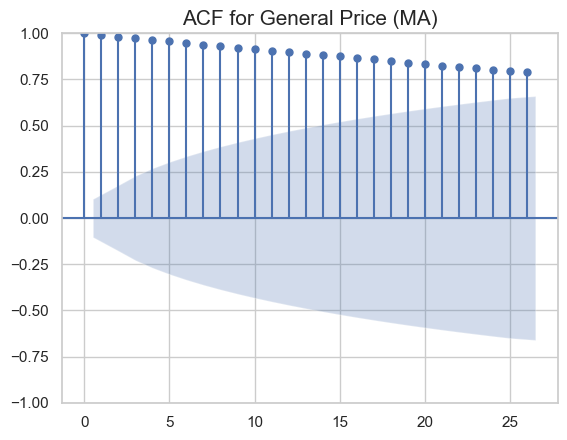

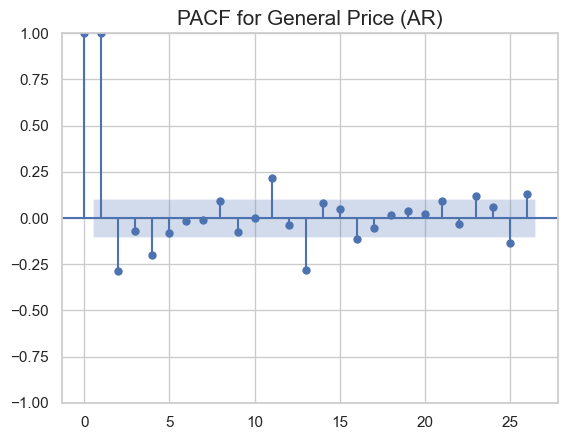

RMSE : 7.1871


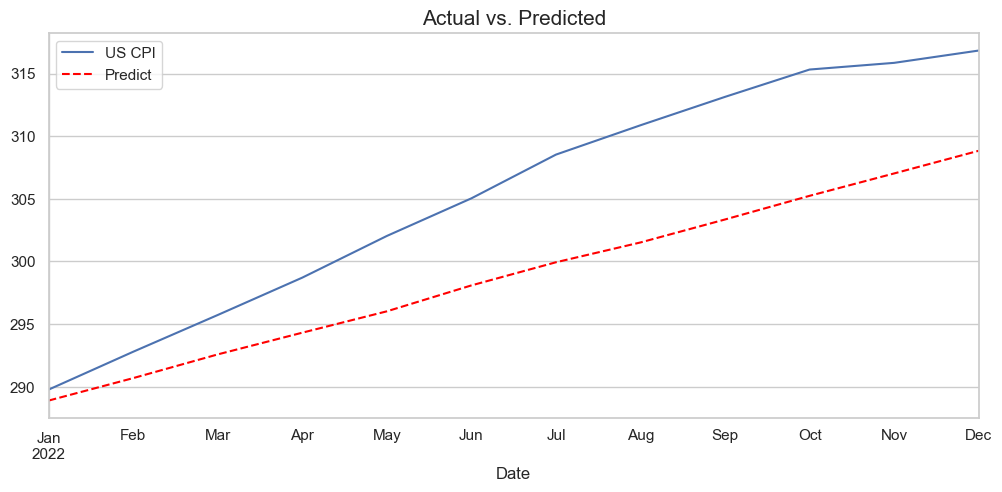

                               SARIMAX Results                                
Dep. Variable:                 US CPI   No. Observations:                  360
Model:                 ARIMA(9, 2, 0)   Log Likelihood                -281.337
Date:                Mon, 19 Jun 2023   AIC                            582.675
Time:                        19:19:38   BIC                            621.480
Sample:                    01-01-1992   HQIC                           598.108
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6836      0.064    -10.601      0.000      -0.810      -0.557
ar.L2         -0.6055      0.071     -8.581      0.000      -0.744      -0.467
ar.L3         -0.3780      0.068     -5.533      0.0

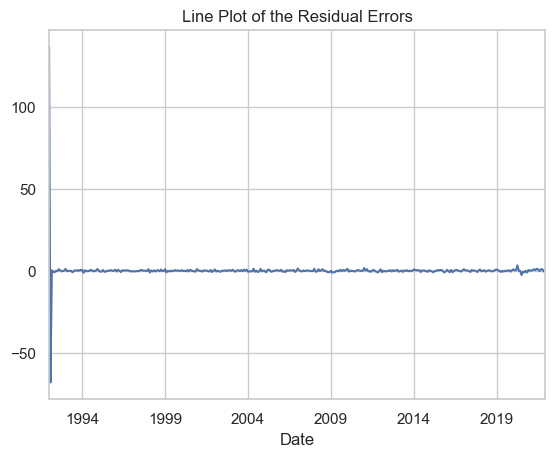

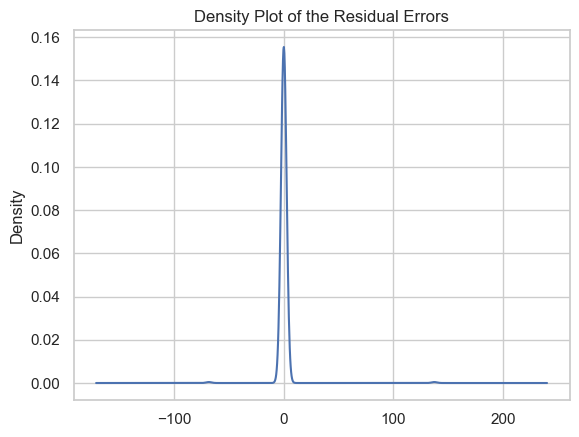

Residual Errors Statistics:
count    360.000000
mean       0.204919
std        8.103519
min      -68.300003
25%       -0.274869
50%       -0.002325
75%        0.313955
max      137.200000
dtype: float64


In [132]:
#ARIMA(9, 2, 0), RMSE=7.1871
# prediction
ARIMA_validation1(9,2,0, train, test)

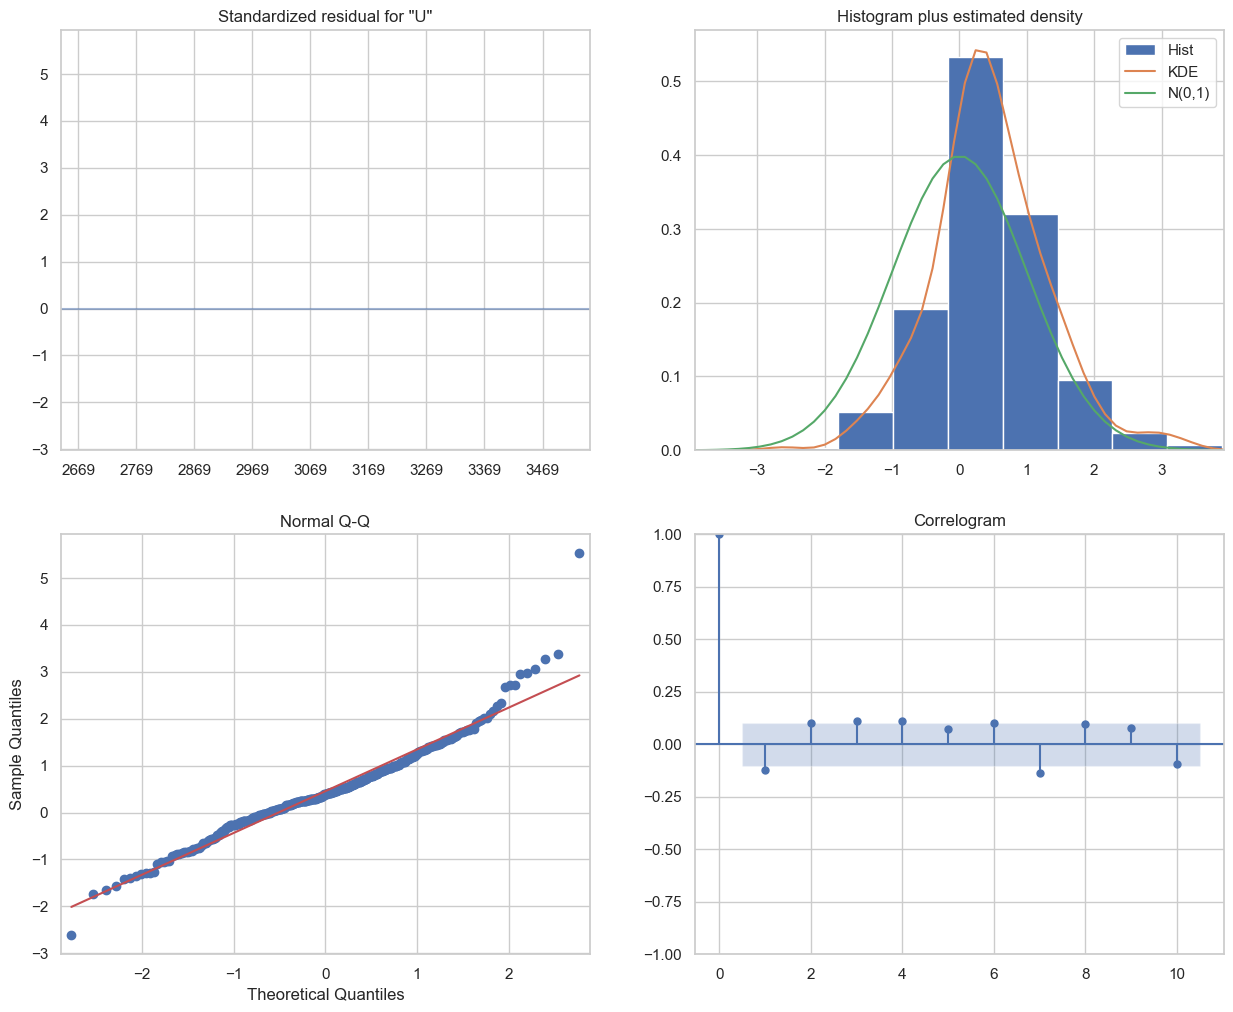

In [133]:
##### # Simple ARIMA model
model = sm.tsa.ARIMA(train, order=(5,0,5))
model_fit = model.fit()
predictions = model_fit.predict(start=start_date, end=end_date)

model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

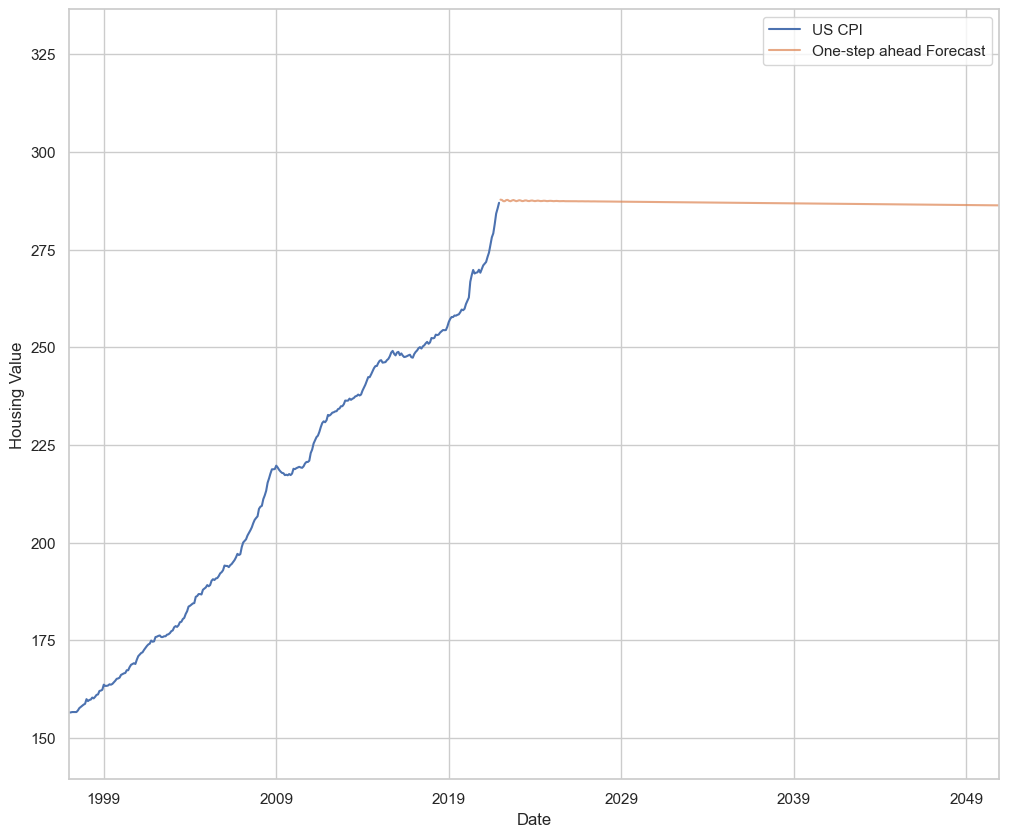

In [134]:
preddynamic = model_fit.get_prediction(start=pd.to_datetime('2022-01'),end=pd.to_datetime('2050-12'), dynamic=False,full_results=True)
preddynamic_ci = preddynamic.conf_int()

# subset the data from 1990
ax = train['1997-01':].plot(label='observed', figsize=(12, 10))
preddynamic.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(preddynamic_ci.index,
                preddynamic_ci.iloc[:, 0],
                preddynamic_ci.iloc[:, 1], color='k', alpha=.2)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-01-01'), train.index[-1],
                 alpha=.1, zorder=-1)
ax.set_xlabel('Date')
ax.set_ylabel('Housing Value')
plt.legend()

plt.show()

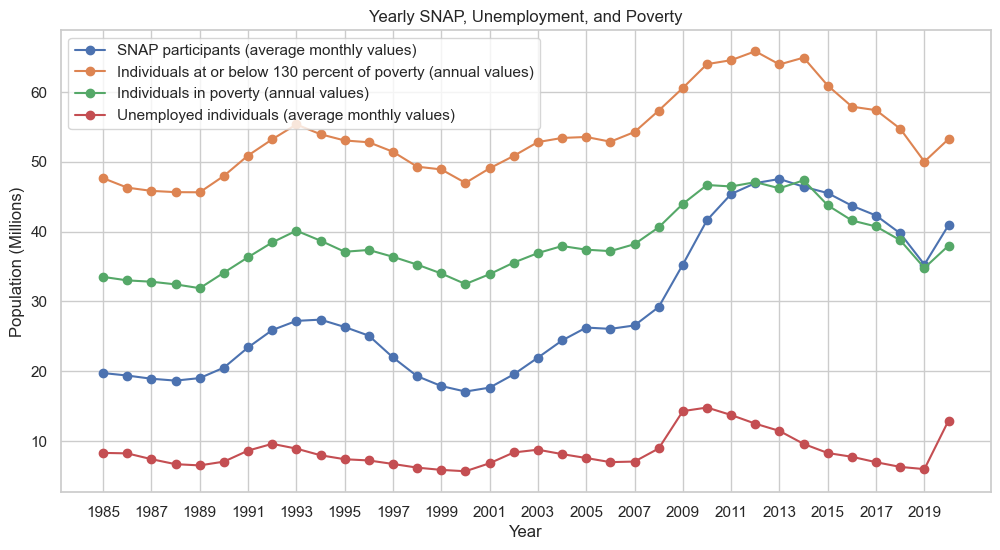

In [135]:
snaptime=pd.read_csv("./Downloads/yearly-snap-unemployed-poverty-individuals.csv")

x = snaptime['Year']
label_keys = snaptime.columns[1:]

plt.figure(figsize=(12, 6))  # Adjust the width and height as desired

for key in label_keys:
    y = snaptime[key]
    plt.plot(x, y, marker='o', label=key)

plt.xlabel('Year')
plt.ylabel('Population (Millions)')
plt.legend()

start_year = snaptime['Year'].min()
end_year = snaptime['Year'].max()
plt.xticks(range(start_year, end_year + 1, 2))  # Set x-axis ticks every 2 years
plt.title('Yearly SNAP, Unemployment, and Poverty')
plt.show()